In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [14]:
import matplotlib
print(matplotlib.matplotlib_fname())
plt.rcParams["font.family"] = "NanumGothic"

C:\Users\qkfkd\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [15]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

train_df.drop("id", axis = 1, inplace = True)
test_df.drop("id", axis = 1, inplace = True)

In [16]:
print(f'train의 구조 {train_df.shape}')
print(f'test의 구조 {test_df.shape}')
print(f'submission의 구조 {submission.shape}')

train의 구조 (1350, 14)
test의 구조 (1350, 13)
submission의 구조 (1350, 2)


In [17]:
# 전체 컬럼들 기준으로 중복값 제거
train_df = train_df.drop_duplicates()
print("제거 후 : ", train_df.shape)

제거 후 :  (1349, 14)


In [18]:
train_df.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1349 non-null   int64 
 1   Gr Liv Area     1349 non-null   int64 
 2   Exter Qual      1349 non-null   object
 3   Garage Cars     1349 non-null   int64 
 4   Garage Area     1349 non-null   int64 
 5   Kitchen Qual    1349 non-null   object
 6   Total Bsmt SF   1349 non-null   int64 
 7   1st Flr SF      1349 non-null   int64 
 8   Bsmt Qual       1349 non-null   object
 9   Full Bath       1349 non-null   int64 
 10  Year Built      1349 non-null   int64 
 11  Year Remod/Add  1349 non-null   int64 
 12  Garage Yr Blt   1349 non-null   int64 
 13  target          1349 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 158.1+ KB


In [20]:
numeric_features = train_df.columns[(train_df.dtypes == "float64") | (train_df.dtypes == "int64")]

categorical_features = train_df.columns[(train_df.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
범주형 데이터는 다음과 같습니다. 
  ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


In [21]:
cols1=['Year Built', 'Year Remod/Add', 'Garage Yr Blt',  'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath', 'Garage Cars', 'target']
train_df = train_df[cols1]

cols2=['Year Built', 'Year Remod/Add', 'Garage Yr Blt',  'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath', 'Garage Cars']
test_df=test_df[cols2]
train_df.head(3)

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,2003,2003,2003,10,Ex,Ex,Ex,2392,2392,2392,968,2,3,386250
1,2006,2007,2006,7,Gd,Ex,Gd,1352,1352,1352,466,2,2,194000
2,1967,1967,1967,5,TA,TA,TA,900,864,900,288,1,1,123000


# train.csv : 학습 데이터
- id : 데이터 고유 id (drop)
- OverallQual : 전반적 재료와 마감 품질
- KitchenQual : 부억 품질 
- ExterQual : 외관 재료 품질

- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 

- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 
- target : 집값(달러 단위)

## 수치형 데이터는 다음과 같음
- 이상치 나타나는 feature : 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Garage Yr Blt', 'target'

In [22]:
numeric_features

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt', 'target'],
      dtype='object')

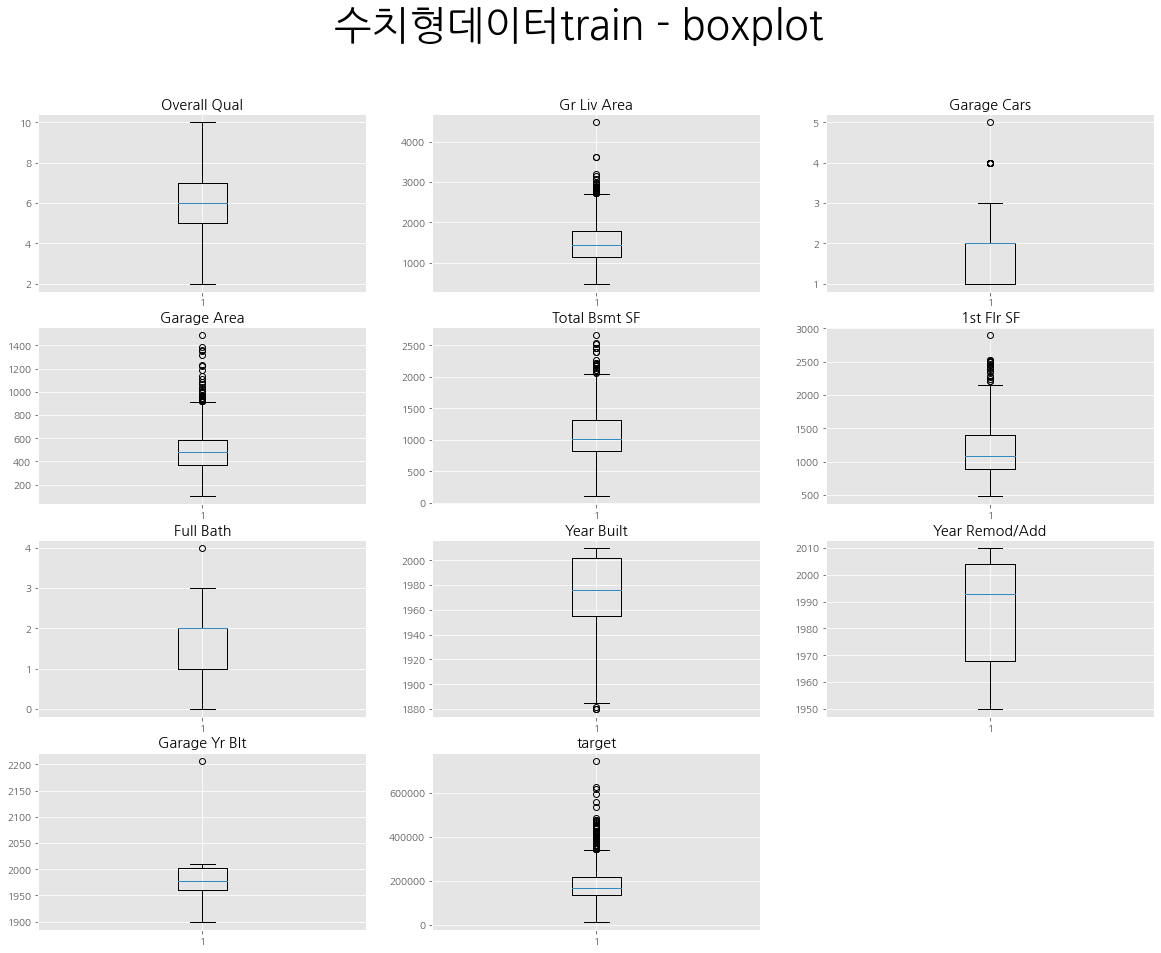

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_features

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(train_df[feature[i]])
plt.show()

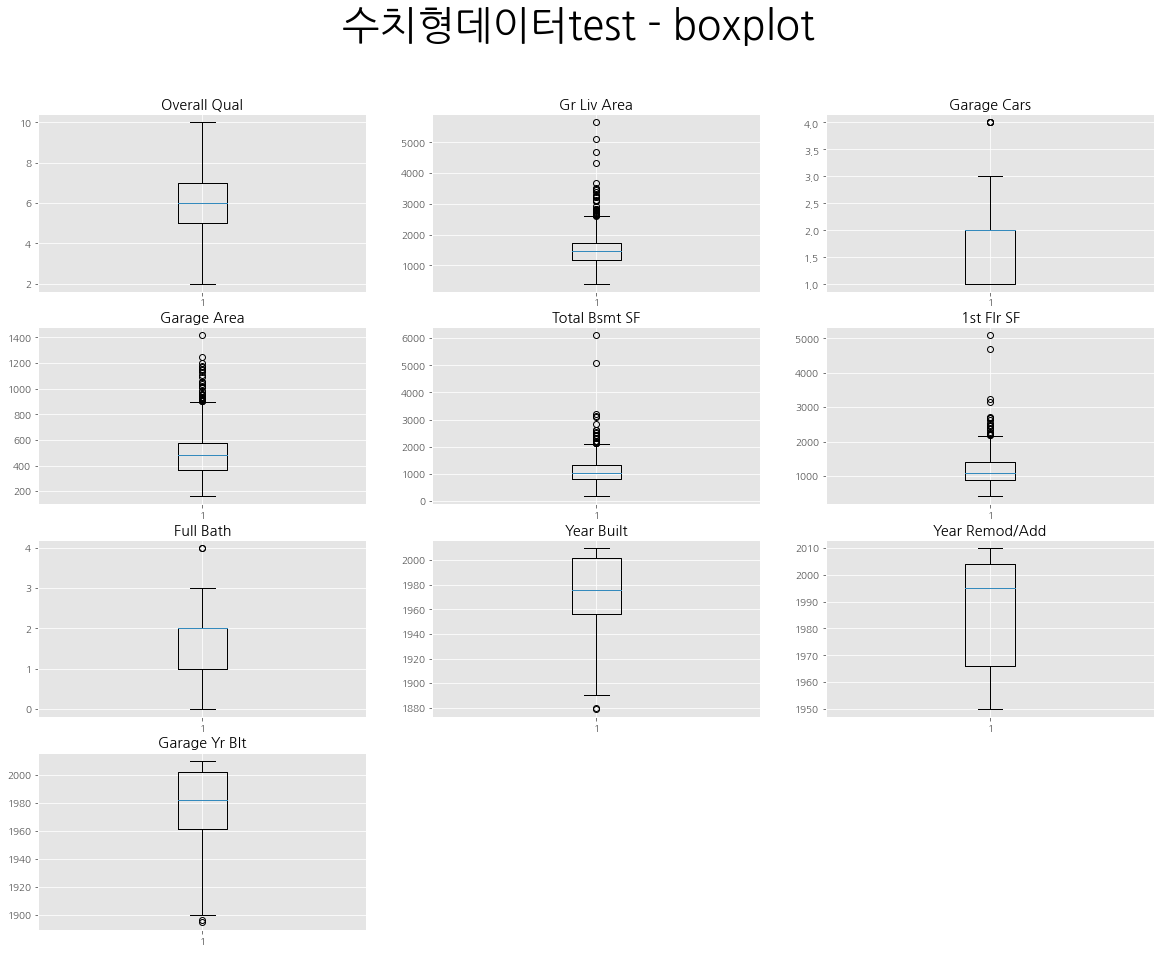

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

numeric_features_del_target = list(numeric_features)
numeric_features_del_target.remove('target')
feature = numeric_features_del_target

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터test - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(test_df[feature[i]])
plt.show()

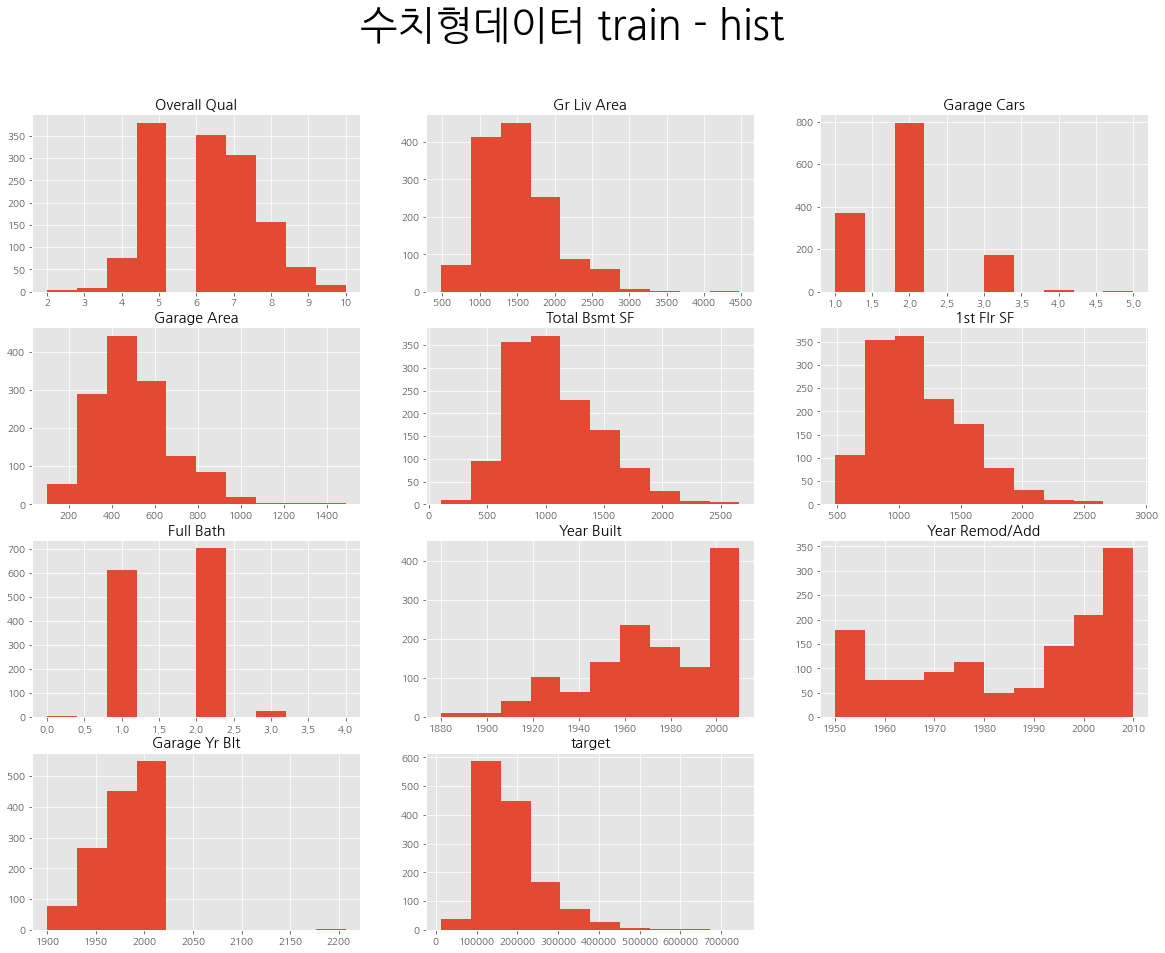

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_features

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터 train - hist", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.hist(train_df[feature[i]])
plt.show()

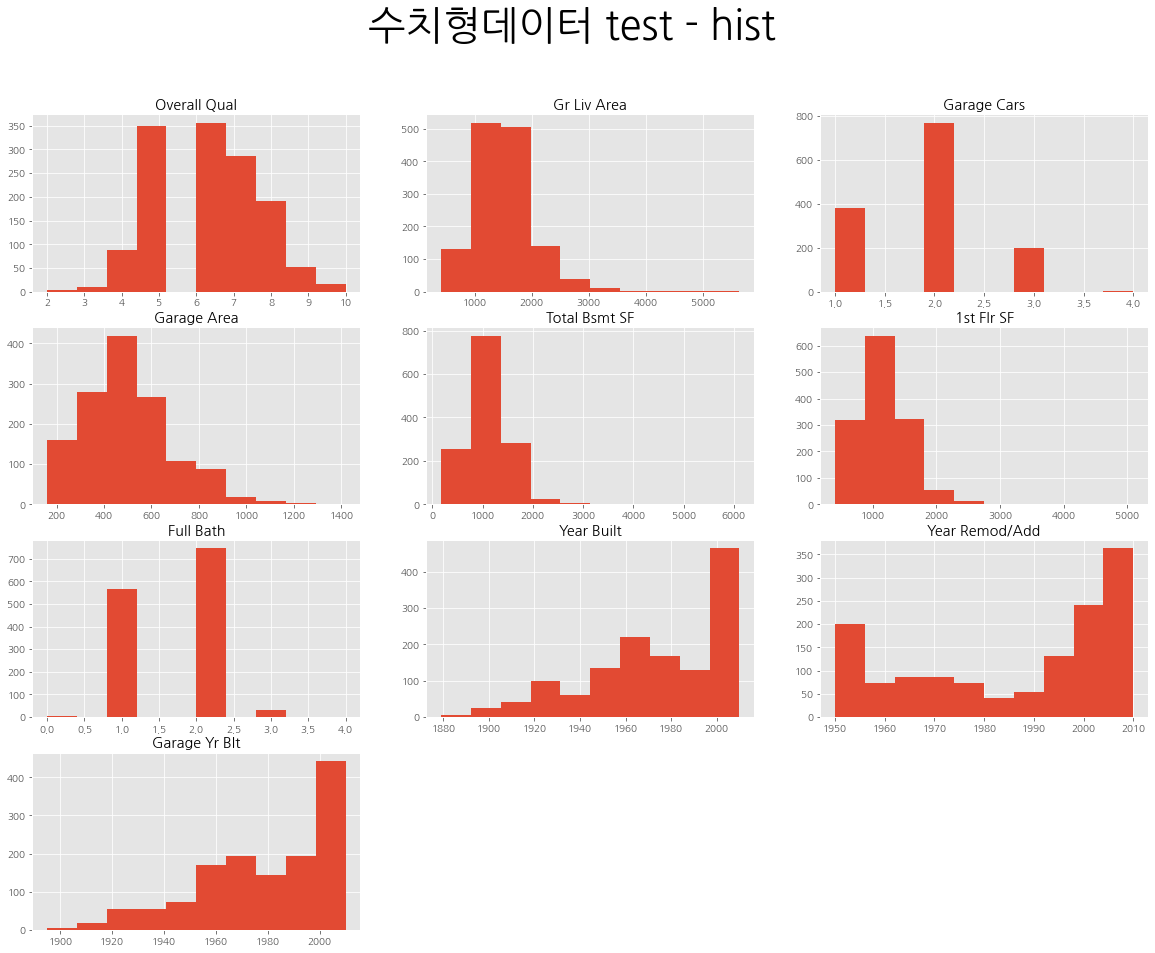

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_features_del_target

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터 test - hist", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.hist(test_df[feature[i]])
plt.show()

## 범주형 데이터는 다음과 같음
- Exter Qual, Kitchen Qual, Bsmt Qual은 범주형변수로, Po<Fa<TA<Gd<Ex인 것 같습니다. (poor -> Fair -> Typical/Average -> Good -> Excellent) 인코딩 시켜줄 필요가 있어보입니다!



In [27]:
categorical_features

Index(['Exter Qual', 'Kitchen Qual', 'Bsmt Qual'], dtype='object')

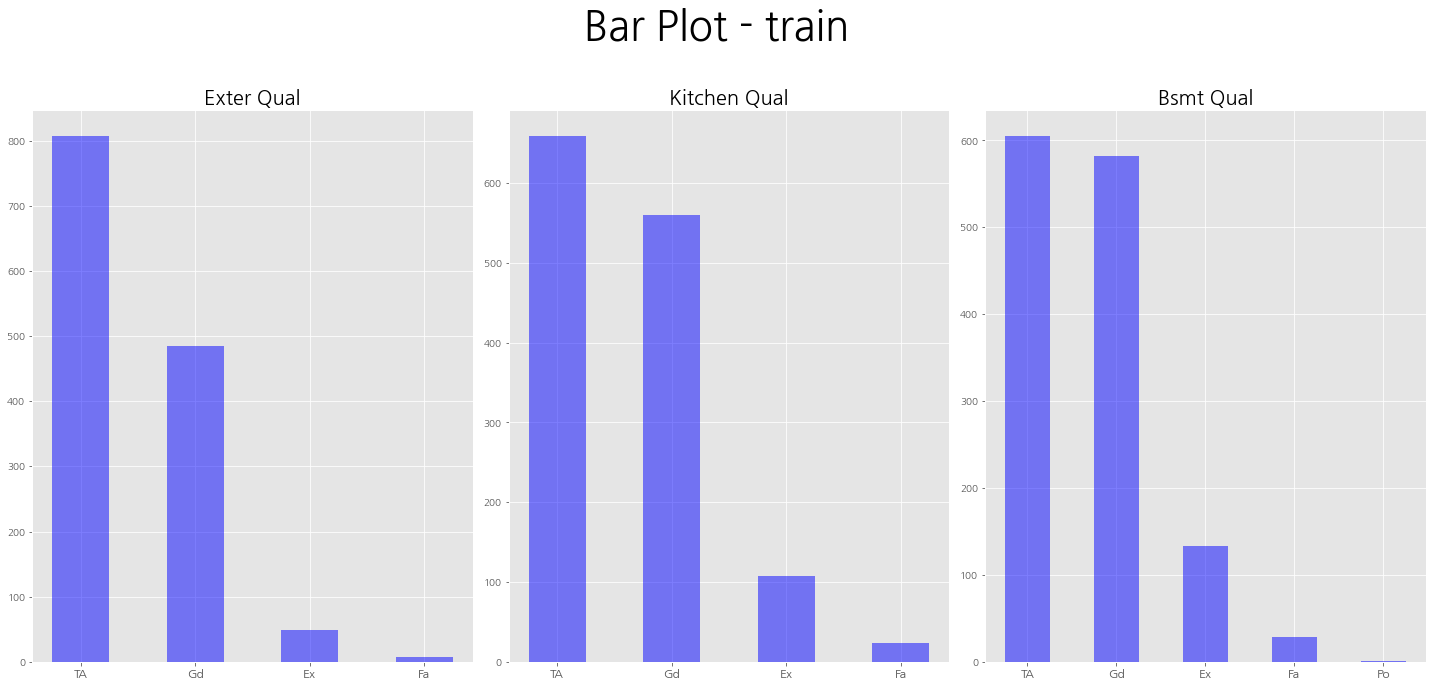

In [28]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - train", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = train_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

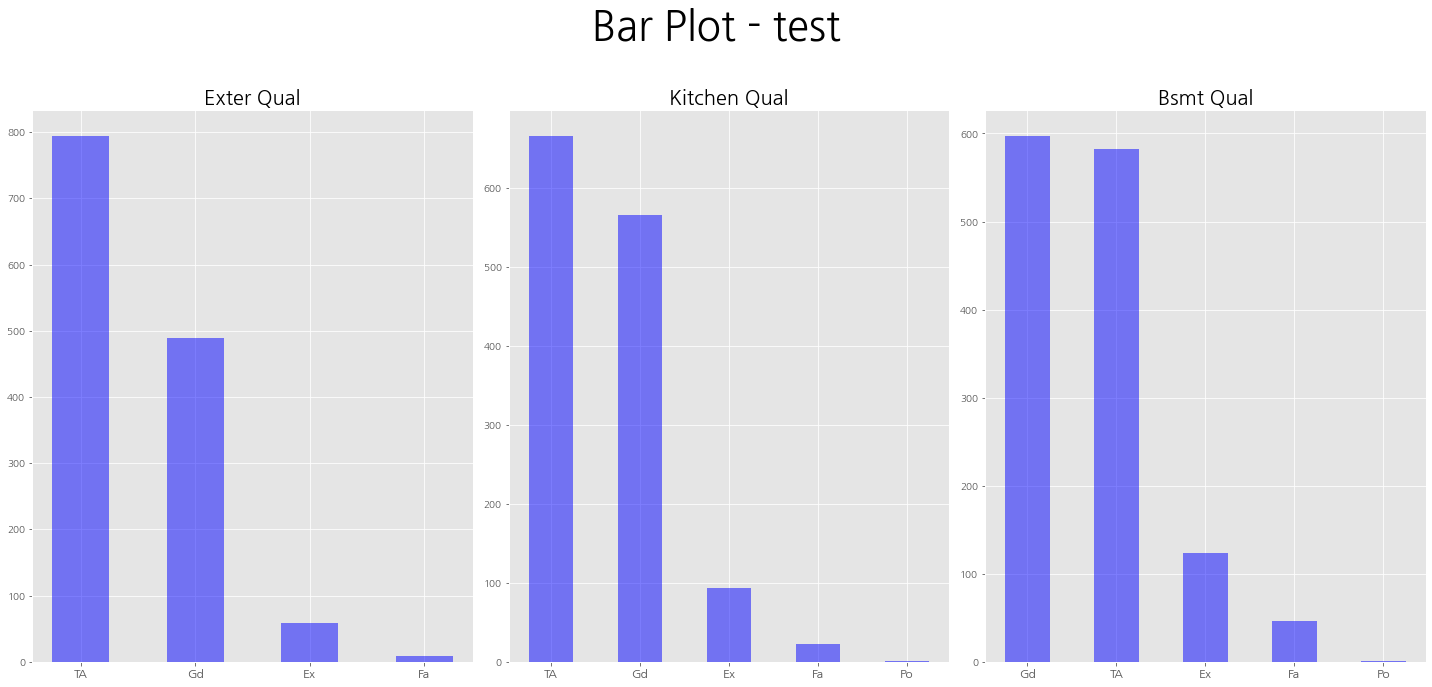

In [29]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - test", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = test_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 상관관계 시각화

In [30]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train_df.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

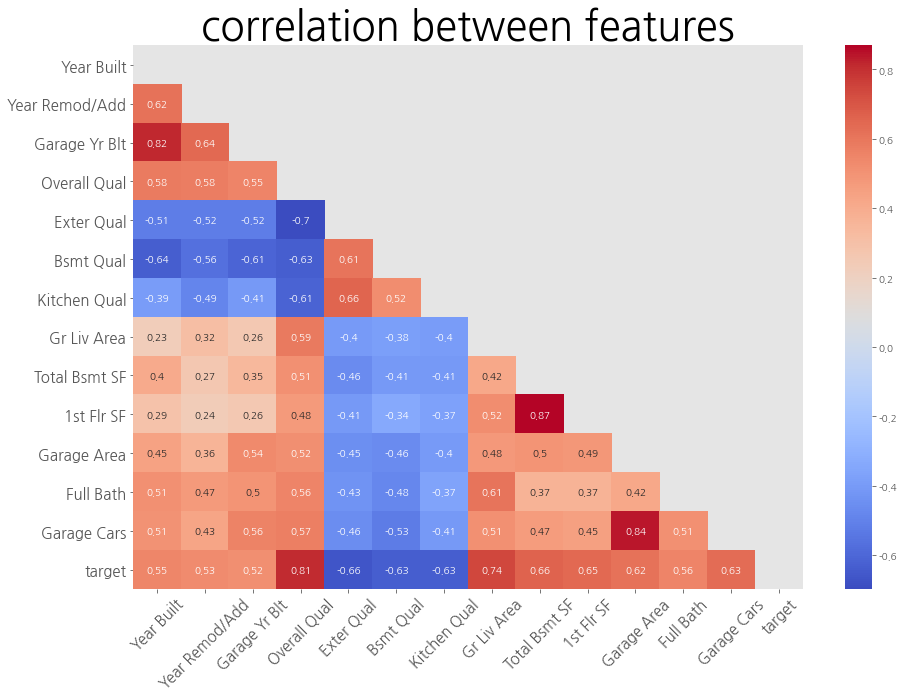

In [31]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

## Target과 다른 feature들과의 관계

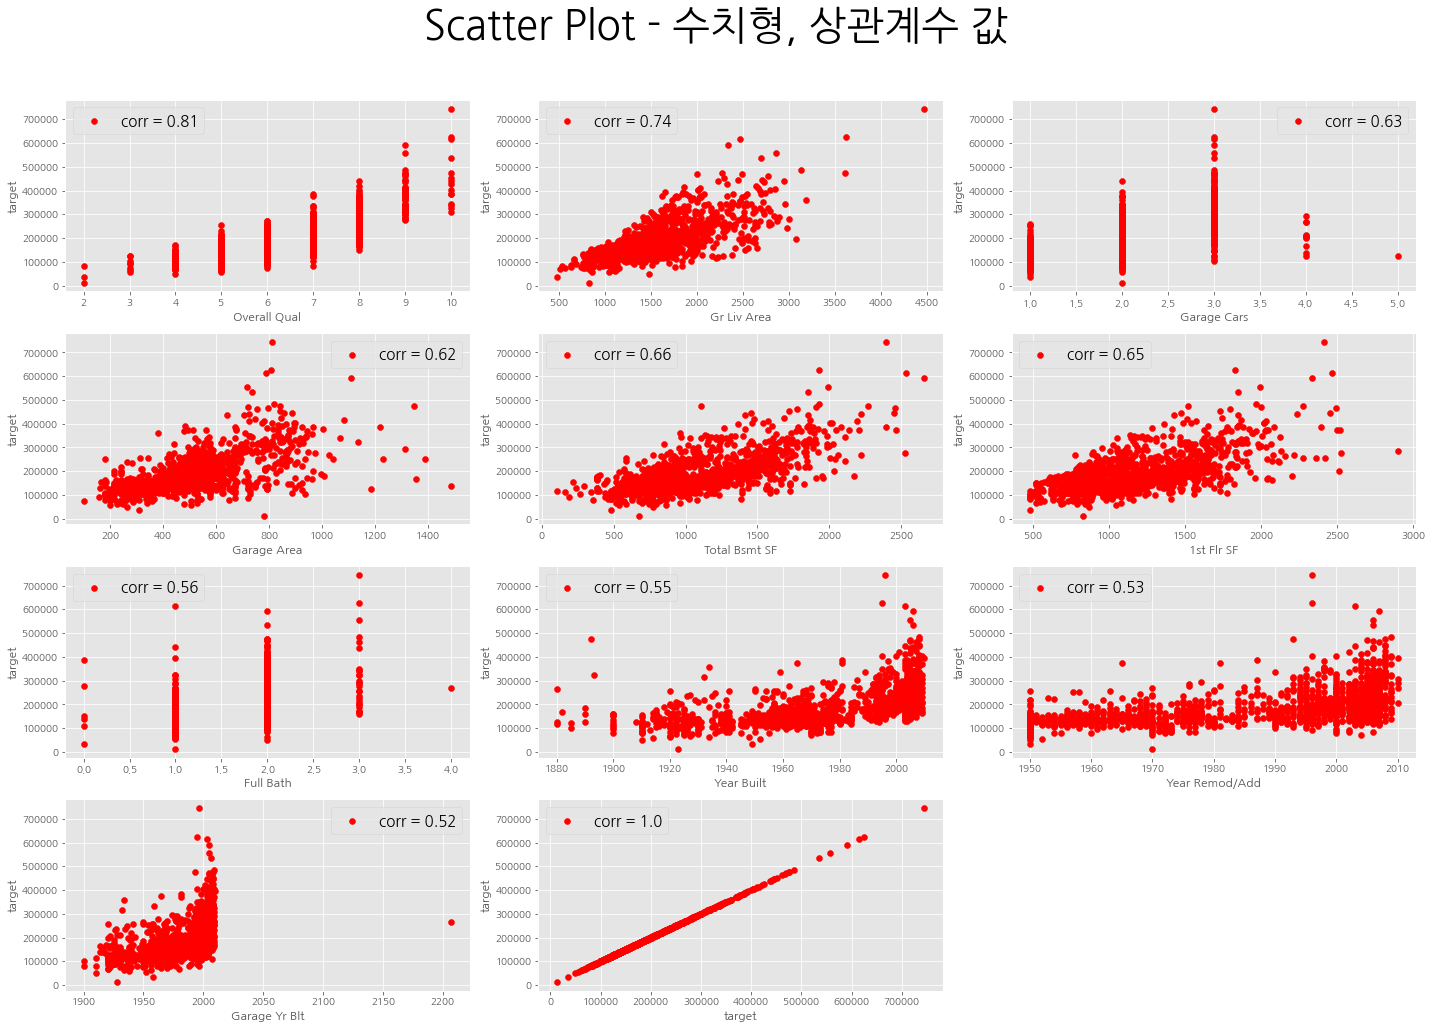

In [32]:
target = "target"

feature = numeric_features

plt.figure(figsize = (20,15))
plt.suptitle("Scatter Plot - 수치형, 상관계수 값",fontsize = 40)

for i in range(len(feature)):
    
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = train_df[[feature[i],target]].corr().iloc[0,1].round(2)
    
    c = "red" if corr_score > 0 else "blue"
    
    plt.scatter(train_df[feature[i]], train_df[target], color = c, label = f"corr = {corr_score}")
    plt.legend(fontsize = 15)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [36]:
# 이상치 개수 구하는 함수 정의

def check_outlier(df,columns):
    
    for column in columns :
        
        q1 = df[column].quantile(.25)
        q3 = df[column].quantile(.75)
        iqr = q3 - q1
        
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        
        outlier_count = len(df.loc[(df[column] < low) | (df[column] > high)])
        
        print(f"{column}의 이상치 개수는 {outlier_count} 개 입니다.")
        
        
    
    

In [37]:
# train 데이터 컬럼별 이상치 개수

check_outlier(train_df, numeric_features)

Overall Qual의 이상치 개수는 0 개 입니다.
Gr Liv Area의 이상치 개수는 28 개 입니다.
Garage Cars의 이상치 개수는 11 개 입니다.
Garage Area의 이상치 개수는 36 개 입니다.
Total Bsmt SF의 이상치 개수는 19 개 입니다.
1st Flr SF의 이상치 개수는 18 개 입니다.
Full Bath의 이상치 개수는 1 개 입니다.
Year Built의 이상치 개수는 4 개 입니다.
Year Remod/Add의 이상치 개수는 0 개 입니다.
Garage Yr Blt의 이상치 개수는 1 개 입니다.
target의 이상치 개수는 66 개 입니다.


In [38]:
# test 데이터 컬럼별 이상치 개수

check_outlier(test_df,numeric_features_del_target)

Overall Qual의 이상치 개수는 0 개 입니다.
Gr Liv Area의 이상치 개수는 43 개 입니다.
Garage Cars의 이상치 개수는 4 개 입니다.
Garage Area의 이상치 개수는 36 개 입니다.
Total Bsmt SF의 이상치 개수는 22 개 입니다.
1st Flr SF의 이상치 개수는 21 개 입니다.
Full Bath의 이상치 개수는 2 개 입니다.
Year Built의 이상치 개수는 2 개 입니다.
Year Remod/Add의 이상치 개수는 0 개 입니다.
Garage Yr Blt의 이상치 개수는 2 개 입니다.


# EDA 결과

- 결측치는 따로 없음
- 이상치 있는 컬럼들이 꽤 보임. 이들을 어떻게 처리하는지 중요할 듯
    - test에서는 이상치가 확 차이나진 않는 듯
- 수치형 컬럼들이 정규분포를 띄지 않음. 로그로 바꿔주든 표준화하든 해야 할 듯
- 범주형 컬럼들 수치로 어떻게 바구냐에 따라 결과 차이 날 듯

### 일단은 train에서 확 차이나는 이상치 하나 Garage Yr blt만 이상치 처리

In [39]:
train_df.loc[254,"Garage Yr Blt"] = 2007

In [40]:
# train 데이터 컬럼별 이상치 개수

check_outlier(train_df, numeric_features)

Overall Qual의 이상치 개수는 0 개 입니다.
Gr Liv Area의 이상치 개수는 28 개 입니다.
Garage Cars의 이상치 개수는 11 개 입니다.
Garage Area의 이상치 개수는 36 개 입니다.
Total Bsmt SF의 이상치 개수는 19 개 입니다.
1st Flr SF의 이상치 개수는 18 개 입니다.
Full Bath의 이상치 개수는 1 개 입니다.
Year Built의 이상치 개수는 4 개 입니다.
Year Remod/Add의 이상치 개수는 0 개 입니다.
Garage Yr Blt의 이상치 개수는 0 개 입니다.
target의 이상치 개수는 66 개 입니다.


### 범주형 컬럼들 수치로 바꿔주기1

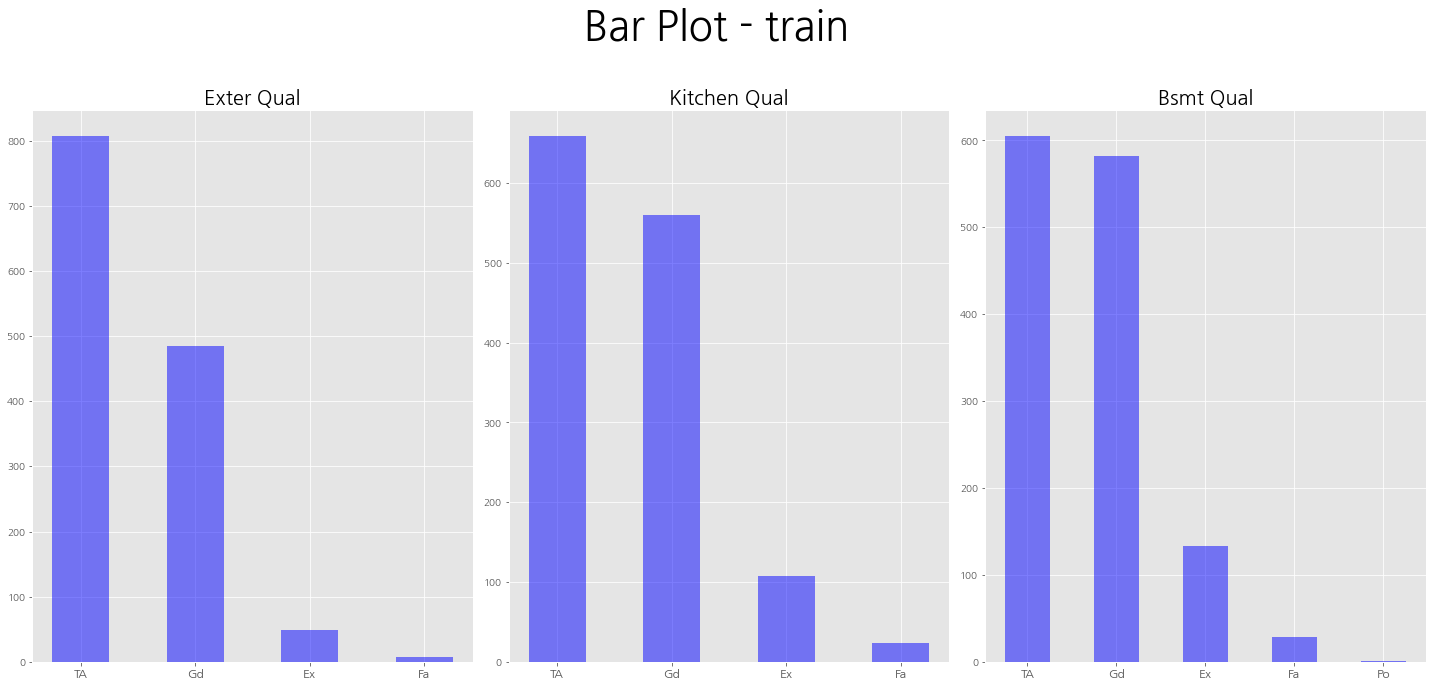

In [41]:
# 범주형 컬럼 'Exter Qual encoded' , 'Kitchen Qual encoded' , 'Bsmt Qual encoded'
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - train", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = train_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

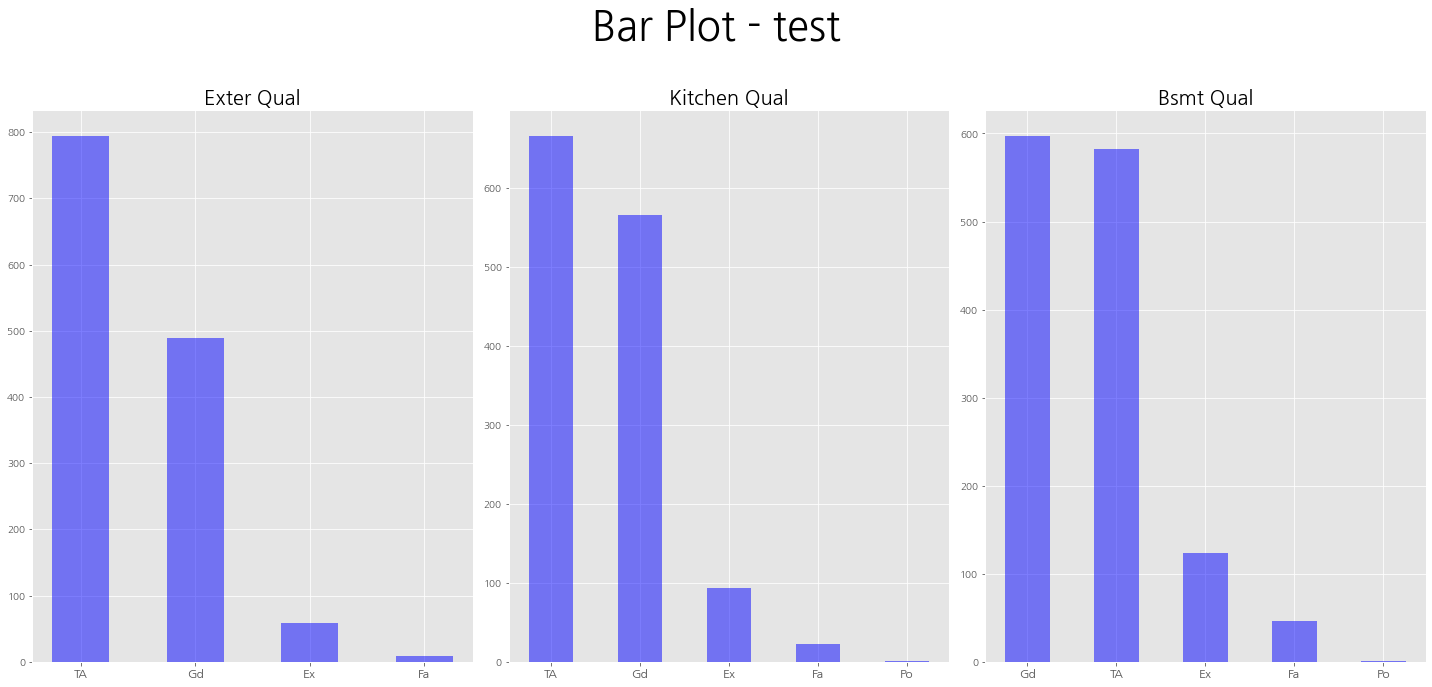

In [42]:
# 범주형 컬럼 'Exter Qual encoded' , 'Kitchen Qual encoded' , 'Bsmt Qual encoded'
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - test", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = test_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [159]:
# 범주형 컬럼 'Exter Qual encoded' , 'Kitchen Qual encoded' , 'Bsmt Qual encoded'
# Po<Fa<TA<Gd<Ex인 것 같습니다. (poor -> Fair -> Typical/Average -> Good -> Excellent) 인코딩 시켜줄 필요가 있어보입니다!

train_pre = train_df.copy()
test_pre = test_df.copy()

In [160]:
train_pre.head(2)

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,2003,2003,2003,10,Ex,Ex,Ex,2392,2392,2392,968,2,3,386250
1,2006,2007,2006,7,Gd,Ex,Gd,1352,1352,1352,466,2,2,194000


In [161]:
# 연도별 평균 target

Year_Built_dict = train_df.groupby(["Year Built"])["target"].mean().to_dict()
Year_RemodAdd_dict = train_df.groupby(["Year Remod/Add"])["target"].mean().to_dict()
Garage_Yr_Blt_dict = train_df.groupby(["Garage Yr Blt"])["target"].mean().to_dict()


# "TA","Gd","Ex","Fa","Po"

Exter_Qual_dict = train_df.groupby(["Exter Qual"])["target"].mean().to_dict()
Kitchen_Qual_dict = train_df.groupby(["Kitchen Qual"])["target"].mean().to_dict()
Bsmt_Qual_dict = train_df.groupby(["Bsmt Qual"])["target"].mean().to_dict()

In [162]:
train_pre["Year Built"] = train_pre["Year Built"].map(Year_Built_dict)
train_pre["Year Remod/Add"] = train_pre["Year Remod/Add"].map(Year_RemodAdd_dict)
train_pre["Garage Yr Blt"] = train_pre["Garage Yr Blt"].map(Garage_Yr_Blt_dict)

test_pre["Year Built"] = test_pre["Year Built"].map(Year_Built_dict)
test_pre["Year Remod/Add"] = test_pre["Year Remod/Add"].map(Year_RemodAdd_dict)
test_pre["Garage Yr Blt"] = test_pre["Garage Yr Blt"].map(Garage_Yr_Blt_dict)

train_pre["Exter Qual"] = train_pre["Exter Qual"].map(Exter_Qual_dict)
train_pre["Kitchen Qual"] = train_pre["Kitchen Qual"].map(Kitchen_Qual_dict)
train_pre["Bsmt Qual"] = train_pre["Bsmt Qual"].map(Bsmt_Qual_dict)


test_pre["Exter Qual"] = test_pre["Exter Qual"].map(Exter_Qual_dict)
test_pre["Kitchen Qual"] = test_pre["Kitchen Qual"].map(Kitchen_Qual_dict)
test_pre["Bsmt Qual"] = test_pre["Bsmt Qual"].map(Bsmt_Qual_dict)

In [163]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1349 non-null   float64
 1   Year Remod/Add  1349 non-null   float64
 2   Garage Yr Blt   1349 non-null   float64
 3   Overall Qual    1349 non-null   int64  
 4   Exter Qual      1349 non-null   float64
 5   Bsmt Qual       1349 non-null   float64
 6   Kitchen Qual    1349 non-null   float64
 7   Gr Liv Area     1349 non-null   int64  
 8   Total Bsmt SF   1349 non-null   int64  
 9   1st Flr SF      1349 non-null   int64  
 10  Garage Area     1349 non-null   int64  
 11  Full Bath       1349 non-null   int64  
 12  Garage Cars     1349 non-null   int64  
 13  target          1349 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 190.4 KB


In [164]:
test_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1340 non-null   float64
 1   Year Remod/Add  1350 non-null   float64
 2   Garage Yr Blt   1343 non-null   float64
 3   Overall Qual    1350 non-null   int64  
 4   Exter Qual      1350 non-null   float64
 5   Bsmt Qual       1350 non-null   float64
 6   Kitchen Qual    1349 non-null   float64
 7   Gr Liv Area     1350 non-null   int64  
 8   Total Bsmt SF   1350 non-null   int64  
 9   1st Flr SF      1350 non-null   int64  
 10  Garage Area     1350 non-null   int64  
 11  Full Bath       1350 non-null   int64  
 12  Garage Cars     1350 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 137.2 KB


In [165]:
# Kitchen Qual 값이 Poor인건 train set에 없어서 안채워짐. 따라서 Fa 값으로 채움

test_pre["Kitchen Qual"].fillna(Kitchen_Qual_dict["Fa"],inplace = True)

In [166]:
# Year Built와 Garage Yr Blt에 각각 10개, 7개의 결측치가 있음. 주변 연도값으로 채우자

test_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1340 non-null   float64
 1   Year Remod/Add  1350 non-null   float64
 2   Garage Yr Blt   1343 non-null   float64
 3   Overall Qual    1350 non-null   int64  
 4   Exter Qual      1350 non-null   float64
 5   Bsmt Qual       1350 non-null   float64
 6   Kitchen Qual    1350 non-null   float64
 7   Gr Liv Area     1350 non-null   int64  
 8   Total Bsmt SF   1350 non-null   int64  
 9   1st Flr SF      1350 non-null   int64  
 10  Garage Area     1350 non-null   int64  
 11  Full Bath       1350 non-null   int64  
 12  Garage Cars     1350 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 137.2 KB


In [167]:
# # train set 연도와 test set 연도의 차집합 구하기
# # (test - train)
# print("**** test set에만 있는 Year Built")
# print(set(test_df["Year Built"]) - set(train_df["Year Built"]))
# print('\n')
# print("**** test set에만 있는 Garage Yr Blt")
# print(set(test_df["Garage Yr Blt"]) - set(train_df["Garage Yr Blt"]))

In [168]:
# 결측값 평균으로 매꾸기

test_pre.fillna(test_pre.mean(),inplace = True)

In [169]:
test_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1350 non-null   float64
 1   Year Remod/Add  1350 non-null   float64
 2   Garage Yr Blt   1350 non-null   float64
 3   Overall Qual    1350 non-null   int64  
 4   Exter Qual      1350 non-null   float64
 5   Bsmt Qual       1350 non-null   float64
 6   Kitchen Qual    1350 non-null   float64
 7   Gr Liv Area     1350 non-null   int64  
 8   Total Bsmt SF   1350 non-null   int64  
 9   1st Flr SF      1350 non-null   int64  
 10  Garage Area     1350 non-null   int64  
 11  Full Bath       1350 non-null   int64  
 12  Garage Cars     1350 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 137.2 KB


In [170]:
display(train_pre.head(2))
display(test_pre.head(2))

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,236572.833333,212370.192308,236713.693878,10,369636.122449,330963.87218,330451.149533,2392,2392,2392,968,2,3,386250
1,260557.888889,240220.283582,263025.226415,7,234161.577320,330963.87218,211360.892857,1352,1352,1352,466,2,2,194000


,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars
0,258539.708333,240220.283582,240660.423077,9,234161.577320,330963.872180,330451.149533,1800,1800,1800,702,2,2
1,124350.000000,119680.582090,131275.000000,6,147382.582404,143175.100826,144056.610015,1082,1082,1082,240,1,1


In [171]:
Overall_Qual_list = train_df.groupby(["Overall Qual"])["target"].mean().to_dict()
Full_Bath_dict = train_df.groupby(["Full Bath"])["target"].mean().to_dict()
Garage_Cars_dict = train_df.groupby(["Garage Cars"])["target"].mean().to_dict()


In [172]:
train_pre["Full Bath"] = train_pre["Full Bath"].map(Full_Bath_dict)
train_pre["Garage Cars"] = train_pre["Garage Cars"].map(Garage_Cars_dict)
train_pre["Overall Qual"] = train_pre["Overall Qual"].map(Overall_Qual_list)

test_pre["Full Bath"] = test_pre["Full Bath"].map(Full_Bath_dict)
test_pre["Garage Cars"] = test_pre["Garage Cars"].map(Garage_Cars_dict)
test_pre["Overall Qual"] = test_pre["Overall Qual"].map(Overall_Qual_list)


In [173]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1349 non-null   float64
 1   Year Remod/Add  1349 non-null   float64
 2   Garage Yr Blt   1349 non-null   float64
 3   Overall Qual    1349 non-null   float64
 4   Exter Qual      1349 non-null   float64
 5   Bsmt Qual       1349 non-null   float64
 6   Kitchen Qual    1349 non-null   float64
 7   Gr Liv Area     1349 non-null   int64  
 8   Total Bsmt SF   1349 non-null   int64  
 9   1st Flr SF      1349 non-null   int64  
 10  Garage Area     1349 non-null   int64  
 11  Full Bath       1349 non-null   float64
 12  Garage Cars     1349 non-null   float64
 13  target          1349 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 190.4 KB


In [174]:
test_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1350 non-null   float64
 1   Year Remod/Add  1350 non-null   float64
 2   Garage Yr Blt   1350 non-null   float64
 3   Overall Qual    1350 non-null   float64
 4   Exter Qual      1350 non-null   float64
 5   Bsmt Qual       1350 non-null   float64
 6   Kitchen Qual    1350 non-null   float64
 7   Gr Liv Area     1350 non-null   int64  
 8   Total Bsmt SF   1350 non-null   int64  
 9   1st Flr SF      1350 non-null   int64  
 10  Garage Area     1350 non-null   int64  
 11  Full Bath       1350 non-null   float64
 12  Garage Cars     1350 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 137.2 KB


In [175]:
# train_pre = np.log1p(train_pre)
# test_pre = np.log1p(test_pre)


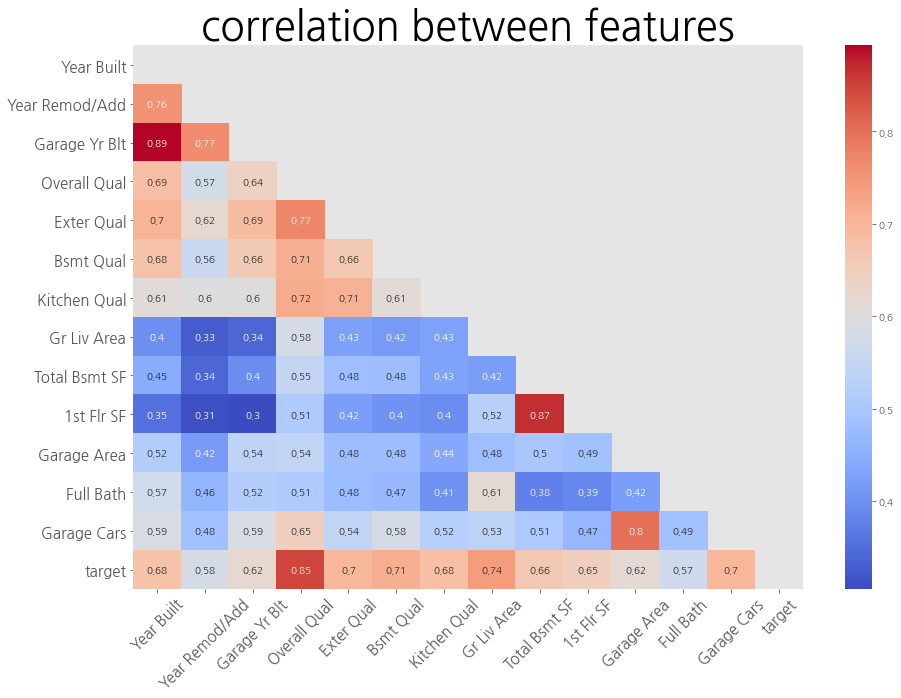

In [176]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train_pre.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

#상관관계 분석도 - 로그 변환 전
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [177]:
# #상관관계 분석도 - 로그 변환 후 
# plt.figure(figsize=(15,10))

# heat_table = corr_df.corr()
# mask = np.zeros_like(heat_table)
# mask[np.triu_indices_from(mask)] = True
# heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
# heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
# heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
# plt.title('correlation between features', fontsize=40)
# plt.show()

In [178]:
train_pre.head(2)

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,236572.833333,212370.192308,236713.693878,453556.066667,369636.122449,330963.87218,330451.149533,2392,2392,2392,968,221542.476529,314754.430233,386250
1,260557.888889,240220.283582,263025.226415,206188.267974,234161.577320,330963.87218,211360.892857,1352,1352,1352,466,221542.476529,185109.387909,194000


In [179]:
# 새로운 컬럼 추가해보기

train_pre_new = train_pre.copy()
train_pre_new['Year Gap Remod'] = abs(train_pre_new['Year Remod/Add'] - train_pre_new['Year Built'])
train_pre_new['Car Area'] = train_pre_new['Garage Area']/train_pre_new['Garage Cars']
train_pre_new['2nd flr SF'] = train_pre_new['Gr Liv Area'] - train_pre_new['1st Flr SF']
train_pre_new['2nd flr'] = train_pre_new['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)
train_pre_new['Total SF'] = train_pre_new[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)
train_pre_new['Sum Qual'] = train_pre_new[["Exter Qual", "Kitchen Qual", "Overall Qual"]].sum(axis=1)
train_pre_new['Garage InOut'] = train_pre_new.apply(lambda x : 1 if x['Gr Liv Area'] != x['1st Flr SF'] else 0, axis=1)

test_pre_new = test_pre.copy()
test_pre_new['Year Gap Remod'] = abs(test_pre_new['Year Remod/Add'] - test_pre_new['Year Built'])
test_pre_new['Car Area'] = test_pre_new['Garage Area']/test_pre_new['Garage Cars']
test_pre_new['2nd flr SF'] = test_pre_new['Gr Liv Area'] - test_pre_new['1st Flr SF']
test_pre_new['2nd flr'] = test_pre_new['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)
test_pre_new['Total SF'] = test_pre_new[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)
test_pre_new['Sum Qual'] = test_pre_new[["Exter Qual", "Kitchen Qual", "Overall Qual"]].sum(axis=1)
test_pre_new['Garage InOut'] = test_pre_new.apply(lambda x : 1 if x['Gr Liv Area'] != x['1st Flr SF'] else 0, axis=1)

In [180]:
train_pre_new = np.log1p(train_pre_new)
test_pre_new = np.log1p(test_pre_new)

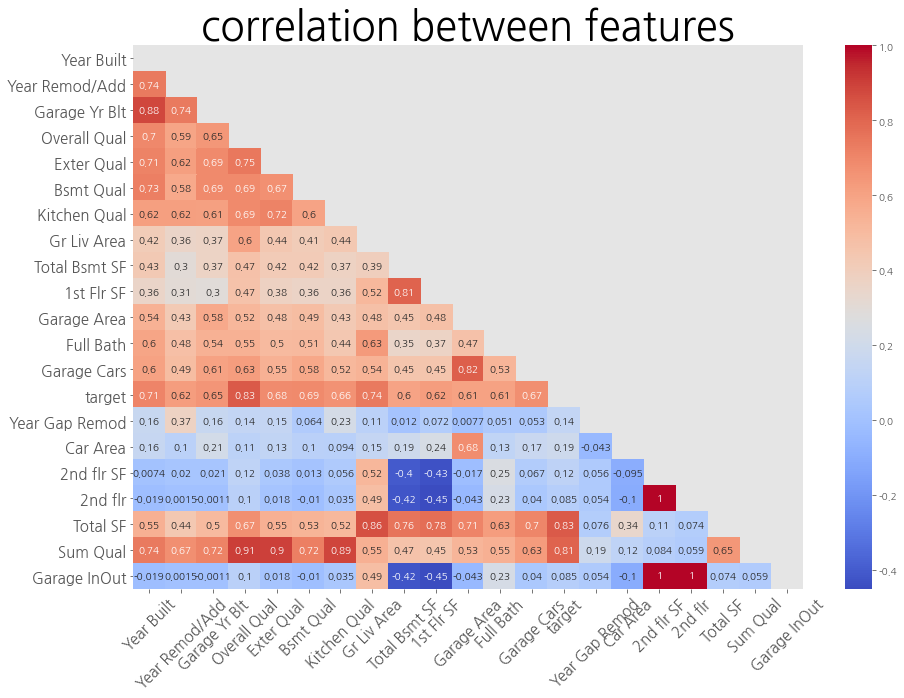

In [181]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train_pre_new.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

#상관관계 분석도 - 로그 변환 후
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [182]:
train_pre_new

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,...,Full Bath,Garage Cars,target,Year Gap Remod,Car Area,2nd flr SF,2nd flr,Total SF,Sum Qual,Garage InOut
0,12.374016,12.266091,12.374611,13.024876,12.820277,12.709768,12.708217,7.780303,7.780303,7.780303,...,12.308374,12.659551,12.864243,10.094258,0.003071,0.000000,0.000000,8.657477,13.958436,0.000000
1,12.470584,12.389316,12.480009,12.236550,12.363771,12.709768,12.261327,7.210080,7.210080,7.210080,...,12.308374,12.128708,12.175619,9.920276,0.002514,0.000000,0.000000,8.061802,13.387358,0.000000
2,12.012979,11.928287,11.992838,11.823646,11.900794,11.871831,11.877969,6.803505,6.762730,6.803505,...,11.849138,11.768855,11.719948,9.502270,0.002227,0.000000,0.000000,7.627057,12.966598,0.000000
3,11.757369,12.393740,12.337696,11.823646,11.900794,11.871831,12.261327,7.069023,6.523562,6.523562,...,11.849138,12.128708,11.813037,11.640408,0.003107,6.204558,0.693147,7.796058,13.112685,0.693147
4,12.415481,12.296767,12.417219,12.236550,12.363771,12.215668,12.261327,7.580189,6.934397,6.934397,...,12.308374,12.659551,12.429220,10.225711,0.002969,6.838405,0.693147,8.274102,13.387358,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,12.373018,12.240237,12.249022,12.004858,12.363771,12.709768,11.877969,7.471363,6.771936,6.790097,...,12.308374,12.128708,12.225880,10.288336,0.002277,6.767343,0.693147,8.023225,13.202589,0.693147
1346,12.470584,12.393740,12.480009,12.818977,12.363771,12.709768,12.708217,7.918992,7.523481,7.523481,...,12.308374,12.659551,12.873905,9.866481,0.002697,6.801283,0.693147,8.603187,13.746985,0.693147
1347,12.012979,11.928287,11.992838,11.823646,11.900794,11.871831,11.877969,7.102499,7.102499,7.102499,...,12.308374,11.768855,11.870607,9.502270,0.002459,0.000000,0.000000,7.918265,12.966598,0.000000
1348,12.097425,11.989787,11.966370,11.823646,11.900794,12.215668,11.877969,6.796824,6.762730,6.796824,...,11.849138,12.128708,11.782960,9.815166,0.002374,0.000000,0.000000,7.695758,12.966598,0.000000


In [183]:
train_pre_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1349 non-null   float64
 1   Year Remod/Add  1349 non-null   float64
 2   Garage Yr Blt   1349 non-null   float64
 3   Overall Qual    1349 non-null   float64
 4   Exter Qual      1349 non-null   float64
 5   Bsmt Qual       1349 non-null   float64
 6   Kitchen Qual    1349 non-null   float64
 7   Gr Liv Area     1349 non-null   float64
 8   Total Bsmt SF   1349 non-null   float64
 9   1st Flr SF      1349 non-null   float64
 10  Garage Area     1349 non-null   float64
 11  Full Bath       1349 non-null   float64
 12  Garage Cars     1349 non-null   float64
 13  target          1349 non-null   float64
 14  Year Gap Remod  1349 non-null   float64
 15  Car Area        1349 non-null   float64
 16  2nd flr SF      1349 non-null   float64
 17  2nd flr         1349 non-null   f

In [184]:
test_pre_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1350 non-null   float64
 1   Year Remod/Add  1350 non-null   float64
 2   Garage Yr Blt   1350 non-null   float64
 3   Overall Qual    1350 non-null   float64
 4   Exter Qual      1350 non-null   float64
 5   Bsmt Qual       1350 non-null   float64
 6   Kitchen Qual    1350 non-null   float64
 7   Gr Liv Area     1350 non-null   float64
 8   Total Bsmt SF   1350 non-null   float64
 9   1st Flr SF      1350 non-null   float64
 10  Garage Area     1350 non-null   float64
 11  Full Bath       1350 non-null   float64
 12  Garage Cars     1350 non-null   float64
 13  Year Gap Remod  1350 non-null   float64
 14  Car Area        1350 non-null   float64
 15  2nd flr SF      1350 non-null   float64
 16  2nd flr         1350 non-null   float64
 17  Total SF        1350 non-null   f

In [185]:
train_pre_new.shape

(1349, 21)

In [186]:
test_pre_new.shape

(1350, 20)

# 모델링

In [195]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression # 릿지, 라쏘, 선형회귀
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀
from ngboost import NGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [188]:
ridge = Ridge()
lasso = Lasso()
linear = LinearRegression()
cat_reg = CatBoostRegressor()
ngb_reg = NGBRegressor()
gb_reg = GradientBoostingRegressor()
rf_reg = RandomForestRegressor()
dt_reg = DecisionTreeRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

In [189]:
# X_data = train_pre.drop(columns=["target"], axis = 1)
# y_target = train_pre["target"]

In [190]:
X_data = train_pre_new.drop(columns=["target"], axis = 1)
y_target = train_pre_new["target"]

In [196]:
# 평가 기준 정의
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [197]:
nmae_score = make_scorer(NMAE, greater_is_better=False)
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [193]:
def get_avg_NAME_cv(models):
    
    for model in models:
        
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        mae_avg = np.mean(-cross_val_score(model, X_data, y_target, scoring = "neg_mean_absolute_error", cv = 5 ))
        NMAE_avg = mae_avg / np.mean(np.abs(y_target))
        
        print("\n{0} CV 평균 NMAE 값 : {1}".format(model.__class__.__name__, np.round(NMAE_avg,3)))
        
        #return NMAE_avg

In [194]:
models = [ridge, lasso, linear, cat_reg, ngb_reg, gb_reg, rf_reg, dt_reg, xgb_reg, lgbm_reg]

get_avg_NAME_cv(models)


Ridge CV 평균 NMAE 값 : 0.008

Lasso CV 평균 NMAE 값 : 0.025

LinearRegression CV 평균 NMAE 값 : 0.008
Learning rate set to 0.042217
0:	learn: 0.3714691	total: 1.91ms	remaining: 1.91s
1:	learn: 0.3612394	total: 3.65ms	remaining: 1.82s
2:	learn: 0.3509170	total: 5.28ms	remaining: 1.75s
3:	learn: 0.3415738	total: 6.91ms	remaining: 1.72s
4:	learn: 0.3322464	total: 8.59ms	remaining: 1.71s
5:	learn: 0.3231872	total: 10.4ms	remaining: 1.72s
6:	learn: 0.3145579	total: 12.2ms	remaining: 1.73s
7:	learn: 0.3069402	total: 14ms	remaining: 1.74s
8:	learn: 0.2990988	total: 15.7ms	remaining: 1.73s
9:	learn: 0.2922870	total: 17.4ms	remaining: 1.73s
10:	learn: 0.2853886	total: 19.1ms	remaining: 1.72s
11:	learn: 0.2783673	total: 20.7ms	remaining: 1.71s
12:	learn: 0.2721862	total: 22.4ms	remaining: 1.7s
13:	learn: 0.2661326	total: 24.1ms	remaining: 1.7s
14:	learn: 0.2606953	total: 25.7ms	remaining: 1.69s
15:	learn: 0.2548943	total: 27.6ms	remaining: 1.7s
16:	learn: 0.2489744	total: 29.2ms	remaining: 1.69s
17:	le

269:	learn: 0.1019273	total: 430ms	remaining: 1.16s
270:	learn: 0.1018618	total: 431ms	remaining: 1.16s
271:	learn: 0.1017765	total: 433ms	remaining: 1.16s
272:	learn: 0.1016536	total: 435ms	remaining: 1.16s
273:	learn: 0.1015092	total: 437ms	remaining: 1.16s
274:	learn: 0.1013587	total: 439ms	remaining: 1.16s
275:	learn: 0.1012754	total: 440ms	remaining: 1.15s
276:	learn: 0.1011352	total: 442ms	remaining: 1.15s
277:	learn: 0.1009952	total: 444ms	remaining: 1.15s
278:	learn: 0.1009429	total: 445ms	remaining: 1.15s
279:	learn: 0.1008920	total: 447ms	remaining: 1.15s
280:	learn: 0.1007763	total: 448ms	remaining: 1.15s
281:	learn: 0.1006289	total: 450ms	remaining: 1.15s
282:	learn: 0.1005433	total: 452ms	remaining: 1.14s
283:	learn: 0.1004207	total: 453ms	remaining: 1.14s
284:	learn: 0.1003284	total: 455ms	remaining: 1.14s
285:	learn: 0.1002560	total: 456ms	remaining: 1.14s
286:	learn: 0.1001273	total: 457ms	remaining: 1.14s
287:	learn: 0.1000861	total: 459ms	remaining: 1.13s
288:	learn: 

502:	learn: 0.0812331	total: 782ms	remaining: 773ms
503:	learn: 0.0811765	total: 784ms	remaining: 771ms
504:	learn: 0.0811241	total: 785ms	remaining: 770ms
505:	learn: 0.0810709	total: 787ms	remaining: 768ms
506:	learn: 0.0809822	total: 788ms	remaining: 766ms
507:	learn: 0.0809032	total: 790ms	remaining: 765ms
508:	learn: 0.0808275	total: 791ms	remaining: 763ms
509:	learn: 0.0807283	total: 793ms	remaining: 762ms
510:	learn: 0.0806770	total: 794ms	remaining: 760ms
511:	learn: 0.0805830	total: 796ms	remaining: 759ms
512:	learn: 0.0804489	total: 798ms	remaining: 757ms
513:	learn: 0.0803599	total: 800ms	remaining: 756ms
514:	learn: 0.0802533	total: 802ms	remaining: 755ms
515:	learn: 0.0802123	total: 803ms	remaining: 753ms
516:	learn: 0.0801451	total: 805ms	remaining: 752ms
517:	learn: 0.0801339	total: 806ms	remaining: 750ms
518:	learn: 0.0801071	total: 807ms	remaining: 748ms
519:	learn: 0.0800414	total: 809ms	remaining: 747ms
520:	learn: 0.0799288	total: 811ms	remaining: 745ms
521:	learn: 

713:	learn: 0.0683102	total: 1.13s	remaining: 453ms
714:	learn: 0.0682800	total: 1.13s	remaining: 452ms
715:	learn: 0.0682365	total: 1.14s	remaining: 450ms
716:	learn: 0.0681451	total: 1.14s	remaining: 449ms
717:	learn: 0.0680764	total: 1.14s	remaining: 447ms
718:	learn: 0.0680146	total: 1.14s	remaining: 446ms
719:	learn: 0.0679462	total: 1.14s	remaining: 444ms
720:	learn: 0.0679397	total: 1.14s	remaining: 443ms
721:	learn: 0.0678429	total: 1.15s	remaining: 441ms
722:	learn: 0.0677957	total: 1.15s	remaining: 440ms
723:	learn: 0.0677781	total: 1.15s	remaining: 438ms
724:	learn: 0.0677645	total: 1.15s	remaining: 437ms
725:	learn: 0.0677190	total: 1.15s	remaining: 435ms
726:	learn: 0.0676238	total: 1.15s	remaining: 433ms
727:	learn: 0.0675587	total: 1.16s	remaining: 432ms
728:	learn: 0.0674996	total: 1.16s	remaining: 430ms
729:	learn: 0.0674477	total: 1.16s	remaining: 428ms
730:	learn: 0.0673920	total: 1.16s	remaining: 427ms
731:	learn: 0.0673403	total: 1.16s	remaining: 425ms
732:	learn: 

923:	learn: 0.0587821	total: 1.48s	remaining: 122ms
924:	learn: 0.0587442	total: 1.48s	remaining: 120ms
925:	learn: 0.0587338	total: 1.48s	remaining: 118ms
926:	learn: 0.0586142	total: 1.48s	remaining: 117ms
927:	learn: 0.0585922	total: 1.49s	remaining: 115ms
928:	learn: 0.0585394	total: 1.49s	remaining: 114ms
929:	learn: 0.0584842	total: 1.49s	remaining: 112ms
930:	learn: 0.0584314	total: 1.49s	remaining: 110ms
931:	learn: 0.0583776	total: 1.49s	remaining: 109ms
932:	learn: 0.0583518	total: 1.49s	remaining: 107ms
933:	learn: 0.0583005	total: 1.5s	remaining: 106ms
934:	learn: 0.0582884	total: 1.5s	remaining: 104ms
935:	learn: 0.0582568	total: 1.5s	remaining: 102ms
936:	learn: 0.0582304	total: 1.5s	remaining: 101ms
937:	learn: 0.0581767	total: 1.5s	remaining: 99.3ms
938:	learn: 0.0581310	total: 1.5s	remaining: 97.7ms
939:	learn: 0.0580369	total: 1.5s	remaining: 96.1ms
940:	learn: 0.0579938	total: 1.51s	remaining: 94.5ms
941:	learn: 0.0579321	total: 1.51s	remaining: 92.9ms
942:	learn: 0.

109:	learn: 0.1240149	total: 188ms	remaining: 1.52s
110:	learn: 0.1237534	total: 189ms	remaining: 1.52s
111:	learn: 0.1235078	total: 191ms	remaining: 1.51s
112:	learn: 0.1232571	total: 193ms	remaining: 1.52s
113:	learn: 0.1230492	total: 195ms	remaining: 1.51s
114:	learn: 0.1228399	total: 197ms	remaining: 1.51s
115:	learn: 0.1226914	total: 199ms	remaining: 1.51s
116:	learn: 0.1224592	total: 200ms	remaining: 1.51s
117:	learn: 0.1222842	total: 203ms	remaining: 1.51s
118:	learn: 0.1221480	total: 205ms	remaining: 1.51s
119:	learn: 0.1220464	total: 207ms	remaining: 1.52s
120:	learn: 0.1218844	total: 209ms	remaining: 1.52s
121:	learn: 0.1217153	total: 211ms	remaining: 1.52s
122:	learn: 0.1215976	total: 213ms	remaining: 1.52s
123:	learn: 0.1214262	total: 214ms	remaining: 1.51s
124:	learn: 0.1212336	total: 216ms	remaining: 1.51s
125:	learn: 0.1209633	total: 217ms	remaining: 1.5s
126:	learn: 0.1207523	total: 218ms	remaining: 1.5s
127:	learn: 0.1206305	total: 220ms	remaining: 1.5s
128:	learn: 0.1

334:	learn: 0.0960752	total: 537ms	remaining: 1.07s
335:	learn: 0.0959390	total: 539ms	remaining: 1.06s
336:	learn: 0.0957468	total: 540ms	remaining: 1.06s
337:	learn: 0.0957069	total: 542ms	remaining: 1.06s
338:	learn: 0.0956362	total: 543ms	remaining: 1.06s
339:	learn: 0.0955329	total: 545ms	remaining: 1.06s
340:	learn: 0.0955177	total: 546ms	remaining: 1.05s
341:	learn: 0.0954561	total: 547ms	remaining: 1.05s
342:	learn: 0.0953561	total: 549ms	remaining: 1.05s
343:	learn: 0.0953430	total: 551ms	remaining: 1.05s
344:	learn: 0.0952498	total: 553ms	remaining: 1.05s
345:	learn: 0.0951211	total: 554ms	remaining: 1.05s
346:	learn: 0.0950889	total: 556ms	remaining: 1.05s
347:	learn: 0.0948824	total: 558ms	remaining: 1.04s
348:	learn: 0.0948369	total: 560ms	remaining: 1.04s
349:	learn: 0.0946645	total: 561ms	remaining: 1.04s
350:	learn: 0.0945817	total: 563ms	remaining: 1.04s
351:	learn: 0.0945345	total: 564ms	remaining: 1.04s
352:	learn: 0.0944334	total: 566ms	remaining: 1.04s
353:	learn: 

567:	learn: 0.0775665	total: 888ms	remaining: 676ms
568:	learn: 0.0775107	total: 890ms	remaining: 674ms
569:	learn: 0.0774671	total: 892ms	remaining: 673ms
570:	learn: 0.0774103	total: 894ms	remaining: 671ms
571:	learn: 0.0773711	total: 895ms	remaining: 670ms
572:	learn: 0.0773639	total: 897ms	remaining: 668ms
573:	learn: 0.0773444	total: 899ms	remaining: 667ms
574:	learn: 0.0773217	total: 900ms	remaining: 666ms
575:	learn: 0.0772453	total: 902ms	remaining: 664ms
576:	learn: 0.0771230	total: 904ms	remaining: 663ms
577:	learn: 0.0770977	total: 905ms	remaining: 661ms
578:	learn: 0.0769441	total: 907ms	remaining: 660ms
579:	learn: 0.0769028	total: 909ms	remaining: 658ms
580:	learn: 0.0767972	total: 910ms	remaining: 657ms
581:	learn: 0.0767395	total: 912ms	remaining: 655ms
582:	learn: 0.0766767	total: 913ms	remaining: 653ms
583:	learn: 0.0766351	total: 915ms	remaining: 652ms
584:	learn: 0.0765583	total: 916ms	remaining: 650ms
585:	learn: 0.0763906	total: 917ms	remaining: 648ms
586:	learn: 

765:	learn: 0.0663855	total: 1.24s	remaining: 379ms
766:	learn: 0.0663611	total: 1.24s	remaining: 377ms
767:	learn: 0.0663296	total: 1.24s	remaining: 375ms
768:	learn: 0.0663085	total: 1.24s	remaining: 374ms
769:	learn: 0.0662867	total: 1.25s	remaining: 372ms
770:	learn: 0.0661509	total: 1.25s	remaining: 370ms
771:	learn: 0.0660895	total: 1.25s	remaining: 369ms
772:	learn: 0.0660422	total: 1.25s	remaining: 367ms
773:	learn: 0.0660189	total: 1.25s	remaining: 366ms
774:	learn: 0.0659223	total: 1.25s	remaining: 364ms
775:	learn: 0.0659008	total: 1.25s	remaining: 363ms
776:	learn: 0.0658158	total: 1.26s	remaining: 361ms
777:	learn: 0.0657781	total: 1.26s	remaining: 360ms
778:	learn: 0.0657702	total: 1.26s	remaining: 358ms
779:	learn: 0.0656620	total: 1.26s	remaining: 356ms
780:	learn: 0.0656112	total: 1.26s	remaining: 355ms
781:	learn: 0.0655838	total: 1.27s	remaining: 353ms
782:	learn: 0.0655154	total: 1.27s	remaining: 352ms
783:	learn: 0.0654560	total: 1.27s	remaining: 350ms
784:	learn: 

984:	learn: 0.0562334	total: 1.59s	remaining: 24.2ms
985:	learn: 0.0562198	total: 1.59s	remaining: 22.6ms
986:	learn: 0.0561828	total: 1.59s	remaining: 21ms
987:	learn: 0.0561580	total: 1.59s	remaining: 19.4ms
988:	learn: 0.0560677	total: 1.6s	remaining: 17.8ms
989:	learn: 0.0560434	total: 1.6s	remaining: 16.1ms
990:	learn: 0.0560205	total: 1.6s	remaining: 14.5ms
991:	learn: 0.0559965	total: 1.6s	remaining: 12.9ms
992:	learn: 0.0559516	total: 1.6s	remaining: 11.3ms
993:	learn: 0.0559259	total: 1.6s	remaining: 9.69ms
994:	learn: 0.0558933	total: 1.61s	remaining: 8.07ms
995:	learn: 0.0558773	total: 1.61s	remaining: 6.46ms
996:	learn: 0.0558356	total: 1.61s	remaining: 4.84ms
997:	learn: 0.0557993	total: 1.61s	remaining: 3.23ms
998:	learn: 0.0557904	total: 1.61s	remaining: 1.61ms
999:	learn: 0.0557670	total: 1.61s	remaining: 0us
Learning rate set to 0.042217
0:	learn: 0.3713472	total: 2ms	remaining: 2s
1:	learn: 0.3609676	total: 4.54ms	remaining: 2.26s
2:	learn: 0.3507753	total: 6.53ms	rem

200:	learn: 0.1108986	total: 301ms	remaining: 1.2s
201:	learn: 0.1107829	total: 303ms	remaining: 1.2s
202:	learn: 0.1106352	total: 304ms	remaining: 1.2s
203:	learn: 0.1105026	total: 306ms	remaining: 1.19s
204:	learn: 0.1104122	total: 307ms	remaining: 1.19s
205:	learn: 0.1102806	total: 309ms	remaining: 1.19s
206:	learn: 0.1101395	total: 310ms	remaining: 1.19s
207:	learn: 0.1099341	total: 311ms	remaining: 1.19s
208:	learn: 0.1098634	total: 313ms	remaining: 1.18s
209:	learn: 0.1096995	total: 314ms	remaining: 1.18s
210:	learn: 0.1095234	total: 316ms	remaining: 1.18s
211:	learn: 0.1094379	total: 317ms	remaining: 1.18s
212:	learn: 0.1093552	total: 319ms	remaining: 1.18s
213:	learn: 0.1092095	total: 321ms	remaining: 1.18s
214:	learn: 0.1090370	total: 323ms	remaining: 1.18s
215:	learn: 0.1088717	total: 324ms	remaining: 1.18s
216:	learn: 0.1088009	total: 326ms	remaining: 1.18s
217:	learn: 0.1086921	total: 328ms	remaining: 1.18s
218:	learn: 0.1085637	total: 330ms	remaining: 1.18s
219:	learn: 0.1

430:	learn: 0.0882775	total: 643ms	remaining: 849ms
431:	learn: 0.0882096	total: 645ms	remaining: 848ms
432:	learn: 0.0881830	total: 646ms	remaining: 846ms
433:	learn: 0.0880590	total: 648ms	remaining: 845ms
434:	learn: 0.0879834	total: 650ms	remaining: 844ms
435:	learn: 0.0879701	total: 651ms	remaining: 843ms
436:	learn: 0.0878898	total: 653ms	remaining: 841ms
437:	learn: 0.0877335	total: 655ms	remaining: 840ms
438:	learn: 0.0876938	total: 657ms	remaining: 839ms
439:	learn: 0.0876063	total: 658ms	remaining: 838ms
440:	learn: 0.0874901	total: 660ms	remaining: 837ms
441:	learn: 0.0874080	total: 662ms	remaining: 835ms
442:	learn: 0.0873379	total: 664ms	remaining: 834ms
443:	learn: 0.0873299	total: 665ms	remaining: 833ms
444:	learn: 0.0871446	total: 666ms	remaining: 831ms
445:	learn: 0.0870303	total: 668ms	remaining: 830ms
446:	learn: 0.0869605	total: 669ms	remaining: 828ms
447:	learn: 0.0868435	total: 671ms	remaining: 826ms
448:	learn: 0.0867662	total: 672ms	remaining: 825ms
449:	learn: 

657:	learn: 0.0727190	total: 990ms	remaining: 515ms
658:	learn: 0.0726749	total: 992ms	remaining: 513ms
659:	learn: 0.0726164	total: 993ms	remaining: 512ms
660:	learn: 0.0725911	total: 995ms	remaining: 510ms
661:	learn: 0.0725623	total: 996ms	remaining: 509ms
662:	learn: 0.0725475	total: 998ms	remaining: 507ms
663:	learn: 0.0725206	total: 999ms	remaining: 506ms
664:	learn: 0.0724424	total: 1s	remaining: 504ms
665:	learn: 0.0724079	total: 1s	remaining: 503ms
666:	learn: 0.0723072	total: 1s	remaining: 501ms
667:	learn: 0.0722271	total: 1.01s	remaining: 500ms
668:	learn: 0.0722183	total: 1.01s	remaining: 499ms
669:	learn: 0.0721933	total: 1.01s	remaining: 497ms
670:	learn: 0.0721247	total: 1.01s	remaining: 496ms
671:	learn: 0.0720501	total: 1.01s	remaining: 495ms
672:	learn: 0.0720035	total: 1.01s	remaining: 493ms
673:	learn: 0.0719996	total: 1.02s	remaining: 492ms
674:	learn: 0.0719086	total: 1.02s	remaining: 490ms
675:	learn: 0.0718657	total: 1.02s	remaining: 489ms
676:	learn: 0.0718011

887:	learn: 0.0614508	total: 1.34s	remaining: 169ms
888:	learn: 0.0614284	total: 1.34s	remaining: 168ms
889:	learn: 0.0613578	total: 1.34s	remaining: 166ms
890:	learn: 0.0613014	total: 1.35s	remaining: 165ms
891:	learn: 0.0612649	total: 1.35s	remaining: 163ms
892:	learn: 0.0611810	total: 1.35s	remaining: 162ms
893:	learn: 0.0611320	total: 1.35s	remaining: 160ms
894:	learn: 0.0610427	total: 1.35s	remaining: 159ms
895:	learn: 0.0610403	total: 1.35s	remaining: 157ms
896:	learn: 0.0609941	total: 1.35s	remaining: 156ms
897:	learn: 0.0609550	total: 1.36s	remaining: 154ms
898:	learn: 0.0608994	total: 1.36s	remaining: 153ms
899:	learn: 0.0608818	total: 1.36s	remaining: 151ms
900:	learn: 0.0608407	total: 1.36s	remaining: 150ms
901:	learn: 0.0608063	total: 1.36s	remaining: 148ms
902:	learn: 0.0607750	total: 1.36s	remaining: 147ms
903:	learn: 0.0607591	total: 1.37s	remaining: 145ms
904:	learn: 0.0607189	total: 1.37s	remaining: 144ms
905:	learn: 0.0606767	total: 1.37s	remaining: 142ms
906:	learn: 

114:	learn: 0.1234338	total: 175ms	remaining: 1.34s
115:	learn: 0.1232983	total: 176ms	remaining: 1.34s
116:	learn: 0.1230521	total: 178ms	remaining: 1.34s
117:	learn: 0.1227940	total: 179ms	remaining: 1.34s
118:	learn: 0.1226312	total: 181ms	remaining: 1.34s
119:	learn: 0.1224224	total: 182ms	remaining: 1.33s
120:	learn: 0.1222439	total: 183ms	remaining: 1.33s
121:	learn: 0.1220997	total: 185ms	remaining: 1.33s
122:	learn: 0.1218888	total: 187ms	remaining: 1.33s
123:	learn: 0.1216536	total: 188ms	remaining: 1.33s
124:	learn: 0.1213971	total: 190ms	remaining: 1.33s
125:	learn: 0.1212335	total: 192ms	remaining: 1.33s
126:	learn: 0.1210899	total: 194ms	remaining: 1.33s
127:	learn: 0.1209477	total: 195ms	remaining: 1.33s
128:	learn: 0.1207729	total: 197ms	remaining: 1.33s
129:	learn: 0.1206227	total: 199ms	remaining: 1.33s
130:	learn: 0.1204528	total: 200ms	remaining: 1.33s
131:	learn: 0.1203260	total: 202ms	remaining: 1.33s
132:	learn: 0.1201696	total: 204ms	remaining: 1.33s
133:	learn: 

345:	learn: 0.0938608	total: 526ms	remaining: 994ms
346:	learn: 0.0938121	total: 528ms	remaining: 993ms
347:	learn: 0.0937050	total: 530ms	remaining: 992ms
348:	learn: 0.0935810	total: 531ms	remaining: 991ms
349:	learn: 0.0934411	total: 533ms	remaining: 990ms
350:	learn: 0.0933717	total: 534ms	remaining: 988ms
351:	learn: 0.0932800	total: 536ms	remaining: 987ms
352:	learn: 0.0931656	total: 538ms	remaining: 986ms
353:	learn: 0.0929428	total: 540ms	remaining: 985ms
354:	learn: 0.0928668	total: 542ms	remaining: 984ms
355:	learn: 0.0927432	total: 543ms	remaining: 982ms
356:	learn: 0.0925909	total: 545ms	remaining: 981ms
357:	learn: 0.0924908	total: 546ms	remaining: 979ms
358:	learn: 0.0924432	total: 547ms	remaining: 977ms
359:	learn: 0.0923774	total: 549ms	remaining: 975ms
360:	learn: 0.0922217	total: 550ms	remaining: 974ms
361:	learn: 0.0921216	total: 551ms	remaining: 972ms
362:	learn: 0.0920448	total: 553ms	remaining: 970ms
363:	learn: 0.0920095	total: 554ms	remaining: 968ms
364:	learn: 

585:	learn: 0.0750848	total: 878ms	remaining: 620ms
586:	learn: 0.0750317	total: 879ms	remaining: 619ms
587:	learn: 0.0749311	total: 881ms	remaining: 617ms
588:	learn: 0.0749024	total: 882ms	remaining: 616ms
589:	learn: 0.0748356	total: 884ms	remaining: 614ms
590:	learn: 0.0747534	total: 885ms	remaining: 613ms
591:	learn: 0.0747039	total: 887ms	remaining: 611ms
592:	learn: 0.0746992	total: 888ms	remaining: 610ms
593:	learn: 0.0746132	total: 890ms	remaining: 608ms
594:	learn: 0.0745693	total: 892ms	remaining: 607ms
595:	learn: 0.0744769	total: 893ms	remaining: 605ms
596:	learn: 0.0743780	total: 895ms	remaining: 604ms
597:	learn: 0.0742600	total: 897ms	remaining: 603ms
598:	learn: 0.0741721	total: 898ms	remaining: 601ms
599:	learn: 0.0741286	total: 900ms	remaining: 600ms
600:	learn: 0.0740201	total: 902ms	remaining: 599ms
601:	learn: 0.0739339	total: 904ms	remaining: 597ms
602:	learn: 0.0738418	total: 906ms	remaining: 596ms
603:	learn: 0.0737729	total: 907ms	remaining: 595ms
604:	learn: 

815:	learn: 0.0624884	total: 1.23s	remaining: 277ms
816:	learn: 0.0624460	total: 1.23s	remaining: 276ms
817:	learn: 0.0623770	total: 1.23s	remaining: 274ms
818:	learn: 0.0623199	total: 1.23s	remaining: 273ms
819:	learn: 0.0622619	total: 1.24s	remaining: 271ms
820:	learn: 0.0622123	total: 1.24s	remaining: 270ms
821:	learn: 0.0621817	total: 1.24s	remaining: 268ms
822:	learn: 0.0620961	total: 1.24s	remaining: 267ms
823:	learn: 0.0620542	total: 1.24s	remaining: 266ms
824:	learn: 0.0620471	total: 1.25s	remaining: 264ms
825:	learn: 0.0620187	total: 1.25s	remaining: 263ms
826:	learn: 0.0619413	total: 1.25s	remaining: 261ms
827:	learn: 0.0619132	total: 1.25s	remaining: 260ms
828:	learn: 0.0618623	total: 1.25s	remaining: 258ms
829:	learn: 0.0618074	total: 1.25s	remaining: 257ms
830:	learn: 0.0617542	total: 1.25s	remaining: 255ms
831:	learn: 0.0617004	total: 1.26s	remaining: 254ms
832:	learn: 0.0616453	total: 1.26s	remaining: 252ms
833:	learn: 0.0616152	total: 1.26s	remaining: 251ms
834:	learn: 

21:	learn: 0.2263286	total: 38.3ms	remaining: 1.7s
22:	learn: 0.2219120	total: 39.9ms	remaining: 1.7s
23:	learn: 0.2176699	total: 41.4ms	remaining: 1.68s
24:	learn: 0.2139539	total: 42.9ms	remaining: 1.67s
25:	learn: 0.2100767	total: 44.4ms	remaining: 1.67s
26:	learn: 0.2066757	total: 45.8ms	remaining: 1.65s
27:	learn: 0.2034126	total: 47.2ms	remaining: 1.64s
28:	learn: 0.2001154	total: 48.9ms	remaining: 1.64s
29:	learn: 0.1973395	total: 50.5ms	remaining: 1.63s
30:	learn: 0.1945448	total: 52.2ms	remaining: 1.63s
31:	learn: 0.1916123	total: 54.1ms	remaining: 1.64s
32:	learn: 0.1887460	total: 55.8ms	remaining: 1.63s
33:	learn: 0.1861424	total: 57.5ms	remaining: 1.63s
34:	learn: 0.1834560	total: 59.5ms	remaining: 1.64s
35:	learn: 0.1811808	total: 61.4ms	remaining: 1.64s
36:	learn: 0.1786764	total: 62.9ms	remaining: 1.64s
37:	learn: 0.1764476	total: 64.7ms	remaining: 1.64s
38:	learn: 0.1742817	total: 66.6ms	remaining: 1.64s
39:	learn: 0.1722101	total: 68.3ms	remaining: 1.64s
40:	learn: 0.1

248:	learn: 0.1042244	total: 383ms	remaining: 1.16s
249:	learn: 0.1040722	total: 385ms	remaining: 1.15s
250:	learn: 0.1038812	total: 387ms	remaining: 1.15s
251:	learn: 0.1038060	total: 388ms	remaining: 1.15s
252:	learn: 0.1036539	total: 390ms	remaining: 1.15s
253:	learn: 0.1035453	total: 392ms	remaining: 1.15s
254:	learn: 0.1034799	total: 393ms	remaining: 1.15s
255:	learn: 0.1033201	total: 395ms	remaining: 1.15s
256:	learn: 0.1031786	total: 397ms	remaining: 1.15s
257:	learn: 0.1030205	total: 399ms	remaining: 1.15s
258:	learn: 0.1028687	total: 400ms	remaining: 1.15s
259:	learn: 0.1027063	total: 402ms	remaining: 1.14s
260:	learn: 0.1025789	total: 404ms	remaining: 1.14s
261:	learn: 0.1024566	total: 405ms	remaining: 1.14s
262:	learn: 0.1022610	total: 407ms	remaining: 1.14s
263:	learn: 0.1022092	total: 408ms	remaining: 1.14s
264:	learn: 0.1020888	total: 410ms	remaining: 1.14s
265:	learn: 0.1019799	total: 411ms	remaining: 1.13s
266:	learn: 0.1019083	total: 412ms	remaining: 1.13s
267:	learn: 

470:	learn: 0.0827343	total: 736ms	remaining: 826ms
471:	learn: 0.0826669	total: 737ms	remaining: 825ms
472:	learn: 0.0825685	total: 739ms	remaining: 823ms
473:	learn: 0.0825020	total: 740ms	remaining: 822ms
474:	learn: 0.0824333	total: 742ms	remaining: 820ms
475:	learn: 0.0823598	total: 743ms	remaining: 818ms
476:	learn: 0.0822923	total: 745ms	remaining: 816ms
477:	learn: 0.0822001	total: 746ms	remaining: 815ms
478:	learn: 0.0820742	total: 748ms	remaining: 814ms
479:	learn: 0.0819118	total: 750ms	remaining: 812ms
480:	learn: 0.0818224	total: 751ms	remaining: 811ms
481:	learn: 0.0817281	total: 753ms	remaining: 809ms
482:	learn: 0.0816132	total: 755ms	remaining: 808ms
483:	learn: 0.0814962	total: 757ms	remaining: 807ms
484:	learn: 0.0813957	total: 759ms	remaining: 806ms
485:	learn: 0.0813100	total: 761ms	remaining: 804ms
486:	learn: 0.0811994	total: 762ms	remaining: 803ms
487:	learn: 0.0810727	total: 764ms	remaining: 802ms
488:	learn: 0.0810449	total: 766ms	remaining: 800ms
489:	learn: 

709:	learn: 0.0671441	total: 1.09s	remaining: 445ms
710:	learn: 0.0670840	total: 1.09s	remaining: 443ms
711:	learn: 0.0670134	total: 1.09s	remaining: 442ms
712:	learn: 0.0670045	total: 1.09s	remaining: 440ms
713:	learn: 0.0669256	total: 1.1s	remaining: 439ms
714:	learn: 0.0669201	total: 1.1s	remaining: 438ms
715:	learn: 0.0668602	total: 1.1s	remaining: 436ms
716:	learn: 0.0668152	total: 1.1s	remaining: 435ms
717:	learn: 0.0667754	total: 1.1s	remaining: 433ms
718:	learn: 0.0667532	total: 1.1s	remaining: 432ms
719:	learn: 0.0666740	total: 1.11s	remaining: 430ms
720:	learn: 0.0665677	total: 1.11s	remaining: 429ms
721:	learn: 0.0664372	total: 1.11s	remaining: 427ms
722:	learn: 0.0664352	total: 1.11s	remaining: 426ms
723:	learn: 0.0664153	total: 1.11s	remaining: 424ms
724:	learn: 0.0663616	total: 1.11s	remaining: 423ms
725:	learn: 0.0662989	total: 1.11s	remaining: 421ms
726:	learn: 0.0662676	total: 1.12s	remaining: 420ms
727:	learn: 0.0661860	total: 1.12s	remaining: 418ms
728:	learn: 0.0661

940:	learn: 0.0572684	total: 1.44s	remaining: 90.3ms
941:	learn: 0.0572103	total: 1.44s	remaining: 88.7ms
942:	learn: 0.0571752	total: 1.44s	remaining: 87.2ms
943:	learn: 0.0571256	total: 1.44s	remaining: 85.7ms
944:	learn: 0.0571241	total: 1.45s	remaining: 84.1ms
945:	learn: 0.0571069	total: 1.45s	remaining: 82.6ms
946:	learn: 0.0570790	total: 1.45s	remaining: 81.1ms
947:	learn: 0.0570319	total: 1.45s	remaining: 79.5ms
948:	learn: 0.0570043	total: 1.45s	remaining: 78ms
949:	learn: 0.0569814	total: 1.45s	remaining: 76.5ms
950:	learn: 0.0569091	total: 1.45s	remaining: 75ms
951:	learn: 0.0568984	total: 1.46s	remaining: 73.4ms
952:	learn: 0.0568799	total: 1.46s	remaining: 71.9ms
953:	learn: 0.0568245	total: 1.46s	remaining: 70.4ms
954:	learn: 0.0567711	total: 1.46s	remaining: 68.9ms
955:	learn: 0.0567496	total: 1.46s	remaining: 67.4ms
956:	learn: 0.0566939	total: 1.47s	remaining: 65.8ms
957:	learn: 0.0566591	total: 1.47s	remaining: 64.3ms
958:	learn: 0.0566214	total: 1.47s	remaining: 62.8

151:	learn: 0.1177348	total: 233ms	remaining: 1.3s
152:	learn: 0.1176001	total: 235ms	remaining: 1.3s
153:	learn: 0.1174859	total: 236ms	remaining: 1.3s
154:	learn: 0.1172827	total: 238ms	remaining: 1.3s
155:	learn: 0.1171236	total: 240ms	remaining: 1.3s
156:	learn: 0.1169935	total: 242ms	remaining: 1.3s
157:	learn: 0.1167859	total: 243ms	remaining: 1.3s
158:	learn: 0.1166718	total: 245ms	remaining: 1.29s
159:	learn: 0.1165397	total: 247ms	remaining: 1.3s
160:	learn: 0.1163920	total: 249ms	remaining: 1.3s
161:	learn: 0.1161938	total: 251ms	remaining: 1.3s
162:	learn: 0.1160661	total: 253ms	remaining: 1.3s
163:	learn: 0.1159372	total: 254ms	remaining: 1.3s
164:	learn: 0.1158020	total: 256ms	remaining: 1.29s
165:	learn: 0.1156820	total: 257ms	remaining: 1.29s
166:	learn: 0.1155114	total: 259ms	remaining: 1.29s
167:	learn: 0.1153958	total: 260ms	remaining: 1.29s
168:	learn: 0.1152249	total: 262ms	remaining: 1.29s
169:	learn: 0.1151281	total: 263ms	remaining: 1.28s
170:	learn: 0.1150447	to

380:	learn: 0.0930186	total: 584ms	remaining: 948ms
381:	learn: 0.0930100	total: 586ms	remaining: 948ms
382:	learn: 0.0929814	total: 587ms	remaining: 946ms
383:	learn: 0.0928401	total: 589ms	remaining: 944ms
384:	learn: 0.0928100	total: 590ms	remaining: 943ms
385:	learn: 0.0927608	total: 591ms	remaining: 941ms
386:	learn: 0.0926382	total: 593ms	remaining: 939ms
387:	learn: 0.0925163	total: 594ms	remaining: 938ms
388:	learn: 0.0924287	total: 596ms	remaining: 936ms
389:	learn: 0.0923486	total: 598ms	remaining: 935ms
390:	learn: 0.0923221	total: 599ms	remaining: 934ms
391:	learn: 0.0922872	total: 601ms	remaining: 932ms
392:	learn: 0.0922754	total: 603ms	remaining: 931ms
393:	learn: 0.0921533	total: 604ms	remaining: 930ms
394:	learn: 0.0920775	total: 606ms	remaining: 929ms
395:	learn: 0.0919978	total: 608ms	remaining: 927ms
396:	learn: 0.0919342	total: 610ms	remaining: 926ms
397:	learn: 0.0917423	total: 611ms	remaining: 925ms
398:	learn: 0.0916358	total: 613ms	remaining: 924ms
399:	learn: 

612:	learn: 0.0750234	total: 936ms	remaining: 591ms
613:	learn: 0.0749489	total: 938ms	remaining: 590ms
614:	learn: 0.0748652	total: 940ms	remaining: 588ms
615:	learn: 0.0748573	total: 941ms	remaining: 587ms
616:	learn: 0.0747805	total: 943ms	remaining: 585ms
617:	learn: 0.0747693	total: 945ms	remaining: 584ms
618:	learn: 0.0747622	total: 946ms	remaining: 582ms
619:	learn: 0.0746725	total: 948ms	remaining: 581ms
620:	learn: 0.0746404	total: 950ms	remaining: 580ms
621:	learn: 0.0745267	total: 952ms	remaining: 578ms
622:	learn: 0.0744853	total: 953ms	remaining: 577ms
623:	learn: 0.0743934	total: 955ms	remaining: 576ms
624:	learn: 0.0743444	total: 957ms	remaining: 574ms
625:	learn: 0.0742785	total: 958ms	remaining: 572ms
626:	learn: 0.0742225	total: 960ms	remaining: 571ms
627:	learn: 0.0741648	total: 961ms	remaining: 569ms
628:	learn: 0.0740309	total: 963ms	remaining: 568ms
629:	learn: 0.0739933	total: 964ms	remaining: 566ms
630:	learn: 0.0739478	total: 965ms	remaining: 565ms
631:	learn: 

854:	learn: 0.0631709	total: 1.3s	remaining: 220ms
855:	learn: 0.0631481	total: 1.3s	remaining: 218ms
856:	learn: 0.0631124	total: 1.3s	remaining: 217ms
857:	learn: 0.0630645	total: 1.3s	remaining: 215ms
858:	learn: 0.0630197	total: 1.3s	remaining: 214ms
859:	learn: 0.0629778	total: 1.3s	remaining: 212ms
860:	learn: 0.0629528	total: 1.3s	remaining: 211ms
861:	learn: 0.0628812	total: 1.31s	remaining: 209ms
862:	learn: 0.0628274	total: 1.31s	remaining: 208ms
863:	learn: 0.0627931	total: 1.31s	remaining: 206ms
864:	learn: 0.0626946	total: 1.31s	remaining: 205ms
865:	learn: 0.0626724	total: 1.31s	remaining: 203ms
866:	learn: 0.0626246	total: 1.31s	remaining: 202ms
867:	learn: 0.0625827	total: 1.32s	remaining: 200ms
868:	learn: 0.0625648	total: 1.32s	remaining: 199ms
869:	learn: 0.0625046	total: 1.32s	remaining: 197ms
870:	learn: 0.0624260	total: 1.32s	remaining: 196ms
871:	learn: 0.0624057	total: 1.32s	remaining: 194ms
872:	learn: 0.0623873	total: 1.32s	remaining: 193ms
873:	learn: 0.06233

65:	learn: 0.1405050	total: 104ms	remaining: 1.47s
66:	learn: 0.1400363	total: 106ms	remaining: 1.47s
67:	learn: 0.1393982	total: 107ms	remaining: 1.47s
68:	learn: 0.1388220	total: 109ms	remaining: 1.47s
69:	learn: 0.1383211	total: 111ms	remaining: 1.47s
70:	learn: 0.1378317	total: 112ms	remaining: 1.47s
71:	learn: 0.1371907	total: 114ms	remaining: 1.47s
72:	learn: 0.1366479	total: 116ms	remaining: 1.47s
73:	learn: 0.1360882	total: 118ms	remaining: 1.47s
74:	learn: 0.1355796	total: 120ms	remaining: 1.47s
75:	learn: 0.1350984	total: 121ms	remaining: 1.47s
76:	learn: 0.1344888	total: 123ms	remaining: 1.47s
77:	learn: 0.1340037	total: 125ms	remaining: 1.47s
78:	learn: 0.1336280	total: 126ms	remaining: 1.47s
79:	learn: 0.1332436	total: 127ms	remaining: 1.47s
80:	learn: 0.1328745	total: 129ms	remaining: 1.46s
81:	learn: 0.1324601	total: 130ms	remaining: 1.46s
82:	learn: 0.1320885	total: 132ms	remaining: 1.45s
83:	learn: 0.1316801	total: 133ms	remaining: 1.45s
84:	learn: 0.1313283	total: 134

296:	learn: 0.1012335	total: 456ms	remaining: 1.08s
297:	learn: 0.1010755	total: 458ms	remaining: 1.08s
298:	learn: 0.1010129	total: 459ms	remaining: 1.08s
299:	learn: 0.1009869	total: 461ms	remaining: 1.07s
300:	learn: 0.1008089	total: 462ms	remaining: 1.07s
301:	learn: 0.1006902	total: 464ms	remaining: 1.07s
302:	learn: 0.1006724	total: 465ms	remaining: 1.07s
303:	learn: 0.1005855	total: 467ms	remaining: 1.07s
304:	learn: 0.1004874	total: 468ms	remaining: 1.07s
305:	learn: 0.1004027	total: 470ms	remaining: 1.07s
306:	learn: 0.1003411	total: 472ms	remaining: 1.06s
307:	learn: 0.1002343	total: 474ms	remaining: 1.06s
308:	learn: 0.1001378	total: 475ms	remaining: 1.06s
309:	learn: 0.1000489	total: 477ms	remaining: 1.06s
310:	learn: 0.0999394	total: 479ms	remaining: 1.06s
311:	learn: 0.0998290	total: 481ms	remaining: 1.06s
312:	learn: 0.0996625	total: 483ms	remaining: 1.06s
313:	learn: 0.0995971	total: 484ms	remaining: 1.06s
314:	learn: 0.0994697	total: 486ms	remaining: 1.06s
315:	learn: 

524:	learn: 0.0819919	total: 808ms	remaining: 731ms
525:	learn: 0.0819219	total: 811ms	remaining: 731ms
526:	learn: 0.0818132	total: 812ms	remaining: 729ms
527:	learn: 0.0817462	total: 814ms	remaining: 727ms
528:	learn: 0.0816348	total: 815ms	remaining: 726ms
529:	learn: 0.0815312	total: 817ms	remaining: 724ms
530:	learn: 0.0814392	total: 818ms	remaining: 723ms
531:	learn: 0.0813687	total: 820ms	remaining: 721ms
532:	learn: 0.0813062	total: 821ms	remaining: 719ms
533:	learn: 0.0812505	total: 822ms	remaining: 718ms
534:	learn: 0.0811479	total: 824ms	remaining: 716ms
535:	learn: 0.0810416	total: 826ms	remaining: 715ms
536:	learn: 0.0809731	total: 828ms	remaining: 714ms
537:	learn: 0.0808736	total: 830ms	remaining: 713ms
538:	learn: 0.0807990	total: 832ms	remaining: 711ms
539:	learn: 0.0807107	total: 833ms	remaining: 710ms
540:	learn: 0.0806137	total: 835ms	remaining: 709ms
541:	learn: 0.0804429	total: 837ms	remaining: 707ms
542:	learn: 0.0803530	total: 839ms	remaining: 706ms
543:	learn: 

749:	learn: 0.0689140	total: 1.16s	remaining: 386ms
750:	learn: 0.0688382	total: 1.16s	remaining: 385ms
751:	learn: 0.0688008	total: 1.16s	remaining: 383ms
752:	learn: 0.0687468	total: 1.16s	remaining: 382ms
753:	learn: 0.0686681	total: 1.16s	remaining: 380ms
754:	learn: 0.0686264	total: 1.17s	remaining: 378ms
755:	learn: 0.0686009	total: 1.17s	remaining: 377ms
756:	learn: 0.0685984	total: 1.17s	remaining: 375ms
757:	learn: 0.0685391	total: 1.17s	remaining: 374ms
758:	learn: 0.0684646	total: 1.17s	remaining: 372ms
759:	learn: 0.0684183	total: 1.17s	remaining: 371ms
760:	learn: 0.0683775	total: 1.18s	remaining: 369ms
761:	learn: 0.0683738	total: 1.18s	remaining: 368ms
762:	learn: 0.0682941	total: 1.18s	remaining: 366ms
763:	learn: 0.0682126	total: 1.18s	remaining: 365ms
764:	learn: 0.0681768	total: 1.18s	remaining: 364ms
765:	learn: 0.0681397	total: 1.19s	remaining: 362ms
766:	learn: 0.0680937	total: 1.19s	remaining: 361ms
767:	learn: 0.0680569	total: 1.19s	remaining: 359ms
768:	learn: 

978:	learn: 0.0587849	total: 1.51s	remaining: 32.4ms
979:	learn: 0.0587639	total: 1.51s	remaining: 30.9ms
980:	learn: 0.0587503	total: 1.51s	remaining: 29.3ms
981:	learn: 0.0587272	total: 1.52s	remaining: 27.8ms
982:	learn: 0.0586814	total: 1.52s	remaining: 26.2ms
983:	learn: 0.0586139	total: 1.52s	remaining: 24.7ms
984:	learn: 0.0586097	total: 1.52s	remaining: 23.2ms
985:	learn: 0.0585641	total: 1.52s	remaining: 21.6ms
986:	learn: 0.0585491	total: 1.52s	remaining: 20.1ms
987:	learn: 0.0584913	total: 1.52s	remaining: 18.5ms
988:	learn: 0.0584783	total: 1.53s	remaining: 17ms
989:	learn: 0.0584145	total: 1.53s	remaining: 15.4ms
990:	learn: 0.0584052	total: 1.53s	remaining: 13.9ms
991:	learn: 0.0583526	total: 1.53s	remaining: 12.3ms
992:	learn: 0.0583477	total: 1.53s	remaining: 10.8ms
993:	learn: 0.0583005	total: 1.53s	remaining: 9.26ms
994:	learn: 0.0582534	total: 1.54s	remaining: 7.72ms
995:	learn: 0.0582479	total: 1.54s	remaining: 6.18ms
996:	learn: 0.0582391	total: 1.54s	remaining: 4.

188:	learn: 0.1106539	total: 284ms	remaining: 1.22s
189:	learn: 0.1105184	total: 286ms	remaining: 1.22s
190:	learn: 0.1103735	total: 287ms	remaining: 1.22s
191:	learn: 0.1102946	total: 288ms	remaining: 1.21s
192:	learn: 0.1101388	total: 290ms	remaining: 1.21s
193:	learn: 0.1100544	total: 291ms	remaining: 1.21s
194:	learn: 0.1099388	total: 293ms	remaining: 1.21s
195:	learn: 0.1098156	total: 294ms	remaining: 1.21s
196:	learn: 0.1095838	total: 296ms	remaining: 1.21s
197:	learn: 0.1094794	total: 298ms	remaining: 1.21s
198:	learn: 0.1093231	total: 299ms	remaining: 1.2s
199:	learn: 0.1091962	total: 301ms	remaining: 1.2s
200:	learn: 0.1090882	total: 303ms	remaining: 1.2s
201:	learn: 0.1089709	total: 305ms	remaining: 1.2s
202:	learn: 0.1088682	total: 306ms	remaining: 1.2s
203:	learn: 0.1087357	total: 308ms	remaining: 1.2s
204:	learn: 0.1086111	total: 310ms	remaining: 1.2s
205:	learn: 0.1085069	total: 312ms	remaining: 1.2s
206:	learn: 0.1084348	total: 313ms	remaining: 1.2s
207:	learn: 0.1083416

420:	learn: 0.0867724	total: 635ms	remaining: 873ms
421:	learn: 0.0866652	total: 637ms	remaining: 873ms
422:	learn: 0.0865806	total: 639ms	remaining: 871ms
423:	learn: 0.0864742	total: 640ms	remaining: 870ms
424:	learn: 0.0863330	total: 642ms	remaining: 868ms
425:	learn: 0.0863098	total: 643ms	remaining: 866ms
426:	learn: 0.0862273	total: 644ms	remaining: 865ms
427:	learn: 0.0861691	total: 646ms	remaining: 863ms
428:	learn: 0.0861014	total: 647ms	remaining: 861ms
429:	learn: 0.0860883	total: 648ms	remaining: 859ms
430:	learn: 0.0860145	total: 650ms	remaining: 858ms
431:	learn: 0.0859726	total: 651ms	remaining: 856ms
432:	learn: 0.0858595	total: 653ms	remaining: 855ms
433:	learn: 0.0857892	total: 655ms	remaining: 854ms
434:	learn: 0.0857052	total: 657ms	remaining: 853ms
435:	learn: 0.0856319	total: 658ms	remaining: 852ms
436:	learn: 0.0854708	total: 660ms	remaining: 850ms
437:	learn: 0.0854223	total: 662ms	remaining: 849ms
438:	learn: 0.0853650	total: 664ms	remaining: 848ms
439:	learn: 

651:	learn: 0.0702062	total: 988ms	remaining: 527ms
652:	learn: 0.0701162	total: 989ms	remaining: 526ms
653:	learn: 0.0701134	total: 991ms	remaining: 524ms
654:	learn: 0.0700558	total: 992ms	remaining: 523ms
655:	learn: 0.0700528	total: 993ms	remaining: 521ms
656:	learn: 0.0700496	total: 995ms	remaining: 519ms
657:	learn: 0.0700469	total: 997ms	remaining: 518ms
658:	learn: 0.0700153	total: 999ms	remaining: 517ms
659:	learn: 0.0699704	total: 1s	remaining: 515ms
660:	learn: 0.0699308	total: 1s	remaining: 514ms
661:	learn: 0.0698782	total: 1s	remaining: 512ms
662:	learn: 0.0698398	total: 1s	remaining: 511ms
663:	learn: 0.0698270	total: 1.01s	remaining: 510ms
664:	learn: 0.0698236	total: 1.01s	remaining: 508ms
665:	learn: 0.0697580	total: 1.01s	remaining: 507ms
666:	learn: 0.0697294	total: 1.01s	remaining: 506ms
667:	learn: 0.0696488	total: 1.01s	remaining: 504ms
668:	learn: 0.0696166	total: 1.01s	remaining: 502ms
669:	learn: 0.0696017	total: 1.02s	remaining: 501ms
670:	learn: 0.0695860	to

878:	learn: 0.0602032	total: 1.34s	remaining: 184ms
879:	learn: 0.0601570	total: 1.34s	remaining: 183ms
880:	learn: 0.0601377	total: 1.34s	remaining: 181ms
881:	learn: 0.0600712	total: 1.34s	remaining: 180ms
882:	learn: 0.0600149	total: 1.34s	remaining: 178ms
883:	learn: 0.0599999	total: 1.34s	remaining: 177ms
884:	learn: 0.0599702	total: 1.35s	remaining: 175ms
885:	learn: 0.0599426	total: 1.35s	remaining: 174ms
886:	learn: 0.0599291	total: 1.35s	remaining: 172ms
887:	learn: 0.0598830	total: 1.35s	remaining: 170ms
888:	learn: 0.0597863	total: 1.36s	remaining: 170ms
889:	learn: 0.0597420	total: 1.36s	remaining: 169ms
890:	learn: 0.0596685	total: 1.37s	remaining: 167ms
891:	learn: 0.0596400	total: 1.37s	remaining: 166ms
892:	learn: 0.0595704	total: 1.37s	remaining: 164ms
893:	learn: 0.0595180	total: 1.37s	remaining: 163ms
894:	learn: 0.0594893	total: 1.37s	remaining: 161ms
895:	learn: 0.0594457	total: 1.37s	remaining: 159ms
896:	learn: 0.0593744	total: 1.38s	remaining: 158ms
897:	learn: 

77:	learn: 0.1279169	total: 131ms	remaining: 1.55s
78:	learn: 0.1274774	total: 133ms	remaining: 1.55s
79:	learn: 0.1270775	total: 134ms	remaining: 1.54s
80:	learn: 0.1266839	total: 136ms	remaining: 1.54s
81:	learn: 0.1263639	total: 137ms	remaining: 1.53s
82:	learn: 0.1259907	total: 139ms	remaining: 1.53s
83:	learn: 0.1256016	total: 141ms	remaining: 1.53s
84:	learn: 0.1253638	total: 142ms	remaining: 1.53s
85:	learn: 0.1250973	total: 144ms	remaining: 1.53s
86:	learn: 0.1246697	total: 146ms	remaining: 1.53s
87:	learn: 0.1244353	total: 148ms	remaining: 1.53s
88:	learn: 0.1241063	total: 149ms	remaining: 1.53s
89:	learn: 0.1238446	total: 151ms	remaining: 1.53s
90:	learn: 0.1236372	total: 153ms	remaining: 1.52s
91:	learn: 0.1233535	total: 155ms	remaining: 1.52s
92:	learn: 0.1231661	total: 157ms	remaining: 1.53s
93:	learn: 0.1228795	total: 158ms	remaining: 1.52s
94:	learn: 0.1225442	total: 159ms	remaining: 1.52s
95:	learn: 0.1223301	total: 161ms	remaining: 1.51s
96:	learn: 0.1221721	total: 162

312:	learn: 0.0966312	total: 486ms	remaining: 1.07s
313:	learn: 0.0965864	total: 488ms	remaining: 1.06s
314:	learn: 0.0965480	total: 489ms	remaining: 1.06s
315:	learn: 0.0964035	total: 491ms	remaining: 1.06s
316:	learn: 0.0963922	total: 492ms	remaining: 1.06s
317:	learn: 0.0963772	total: 493ms	remaining: 1.06s
318:	learn: 0.0963087	total: 495ms	remaining: 1.06s
319:	learn: 0.0961977	total: 496ms	remaining: 1.05s
320:	learn: 0.0960888	total: 498ms	remaining: 1.05s
321:	learn: 0.0959065	total: 499ms	remaining: 1.05s
322:	learn: 0.0957755	total: 501ms	remaining: 1.05s
323:	learn: 0.0957139	total: 503ms	remaining: 1.05s
324:	learn: 0.0956355	total: 504ms	remaining: 1.05s
325:	learn: 0.0956230	total: 506ms	remaining: 1.05s
326:	learn: 0.0954844	total: 508ms	remaining: 1.04s
327:	learn: 0.0953574	total: 510ms	remaining: 1.04s
328:	learn: 0.0952392	total: 512ms	remaining: 1.04s
329:	learn: 0.0951042	total: 514ms	remaining: 1.04s
330:	learn: 0.0950916	total: 515ms	remaining: 1.04s
331:	learn: 

538:	learn: 0.0786112	total: 837ms	remaining: 716ms
539:	learn: 0.0785300	total: 838ms	remaining: 714ms
540:	learn: 0.0784718	total: 840ms	remaining: 713ms
541:	learn: 0.0783659	total: 842ms	remaining: 711ms
542:	learn: 0.0782069	total: 843ms	remaining: 709ms
543:	learn: 0.0781160	total: 845ms	remaining: 708ms
544:	learn: 0.0780573	total: 846ms	remaining: 707ms
545:	learn: 0.0780145	total: 848ms	remaining: 705ms
546:	learn: 0.0779593	total: 850ms	remaining: 704ms
547:	learn: 0.0778847	total: 851ms	remaining: 702ms
548:	learn: 0.0777640	total: 853ms	remaining: 701ms
549:	learn: 0.0777050	total: 855ms	remaining: 700ms
550:	learn: 0.0776034	total: 857ms	remaining: 698ms
551:	learn: 0.0775301	total: 859ms	remaining: 697ms
552:	learn: 0.0774778	total: 861ms	remaining: 696ms
553:	learn: 0.0774381	total: 862ms	remaining: 694ms
554:	learn: 0.0774161	total: 864ms	remaining: 693ms
555:	learn: 0.0773371	total: 865ms	remaining: 691ms
556:	learn: 0.0771995	total: 867ms	remaining: 689ms
557:	learn: 

765:	learn: 0.0658111	total: 1.19s	remaining: 363ms
766:	learn: 0.0657462	total: 1.19s	remaining: 362ms
767:	learn: 0.0656810	total: 1.19s	remaining: 360ms
768:	learn: 0.0656658	total: 1.19s	remaining: 359ms
769:	learn: 0.0655954	total: 1.2s	remaining: 357ms
770:	learn: 0.0655323	total: 1.2s	remaining: 356ms
771:	learn: 0.0655044	total: 1.2s	remaining: 354ms
772:	learn: 0.0654479	total: 1.2s	remaining: 352ms
773:	learn: 0.0654104	total: 1.2s	remaining: 351ms
774:	learn: 0.0653614	total: 1.2s	remaining: 349ms
775:	learn: 0.0653256	total: 1.2s	remaining: 348ms
776:	learn: 0.0652729	total: 1.21s	remaining: 346ms
777:	learn: 0.0652544	total: 1.21s	remaining: 345ms
778:	learn: 0.0652146	total: 1.21s	remaining: 343ms
779:	learn: 0.0652097	total: 1.21s	remaining: 342ms
780:	learn: 0.0652047	total: 1.21s	remaining: 340ms
781:	learn: 0.0651746	total: 1.22s	remaining: 339ms
782:	learn: 0.0651108	total: 1.22s	remaining: 337ms
783:	learn: 0.0650609	total: 1.22s	remaining: 336ms
784:	learn: 0.06504

979:	learn: 0.0565911	total: 1.54s	remaining: 31.5ms
980:	learn: 0.0565467	total: 1.54s	remaining: 29.9ms
981:	learn: 0.0564880	total: 1.54s	remaining: 28.3ms
982:	learn: 0.0564621	total: 1.55s	remaining: 26.7ms
983:	learn: 0.0564583	total: 1.55s	remaining: 25.2ms
984:	learn: 0.0564289	total: 1.55s	remaining: 23.6ms
985:	learn: 0.0563766	total: 1.55s	remaining: 22ms
986:	learn: 0.0563512	total: 1.55s	remaining: 20.5ms
987:	learn: 0.0563075	total: 1.55s	remaining: 18.9ms
988:	learn: 0.0562751	total: 1.56s	remaining: 17.3ms
989:	learn: 0.0562550	total: 1.56s	remaining: 15.7ms
990:	learn: 0.0562227	total: 1.56s	remaining: 14.2ms
991:	learn: 0.0561690	total: 1.56s	remaining: 12.6ms
992:	learn: 0.0561317	total: 1.56s	remaining: 11ms
993:	learn: 0.0561285	total: 1.56s	remaining: 9.45ms
994:	learn: 0.0560929	total: 1.57s	remaining: 7.88ms
995:	learn: 0.0560484	total: 1.57s	remaining: 6.3ms
996:	learn: 0.0560272	total: 1.57s	remaining: 4.72ms
997:	learn: 0.0559878	total: 1.57s	remaining: 3.15m

185:	learn: 0.1123899	total: 291ms	remaining: 1.27s
186:	learn: 0.1121627	total: 293ms	remaining: 1.27s
187:	learn: 0.1120141	total: 294ms	remaining: 1.27s
188:	learn: 0.1119284	total: 296ms	remaining: 1.27s
189:	learn: 0.1117823	total: 297ms	remaining: 1.27s
190:	learn: 0.1116726	total: 298ms	remaining: 1.26s
191:	learn: 0.1114630	total: 300ms	remaining: 1.26s
192:	learn: 0.1113296	total: 301ms	remaining: 1.26s
193:	learn: 0.1112761	total: 303ms	remaining: 1.26s
194:	learn: 0.1111543	total: 304ms	remaining: 1.26s
195:	learn: 0.1110088	total: 306ms	remaining: 1.25s
196:	learn: 0.1108911	total: 308ms	remaining: 1.25s
197:	learn: 0.1106850	total: 309ms	remaining: 1.25s
198:	learn: 0.1105985	total: 311ms	remaining: 1.25s
199:	learn: 0.1104510	total: 313ms	remaining: 1.25s
200:	learn: 0.1103164	total: 315ms	remaining: 1.25s
201:	learn: 0.1100532	total: 317ms	remaining: 1.25s
202:	learn: 0.1099121	total: 318ms	remaining: 1.25s
203:	learn: 0.1098028	total: 320ms	remaining: 1.25s
204:	learn: 

422:	learn: 0.0871450	total: 654ms	remaining: 892ms
423:	learn: 0.0870659	total: 656ms	remaining: 891ms
424:	learn: 0.0869953	total: 657ms	remaining: 889ms
425:	learn: 0.0869305	total: 659ms	remaining: 887ms
426:	learn: 0.0868586	total: 660ms	remaining: 886ms
427:	learn: 0.0867827	total: 662ms	remaining: 884ms
428:	learn: 0.0866723	total: 663ms	remaining: 882ms
429:	learn: 0.0866194	total: 665ms	remaining: 881ms
430:	learn: 0.0865658	total: 667ms	remaining: 880ms
431:	learn: 0.0865106	total: 669ms	remaining: 879ms
432:	learn: 0.0864538	total: 670ms	remaining: 878ms
433:	learn: 0.0863347	total: 672ms	remaining: 876ms
434:	learn: 0.0862581	total: 674ms	remaining: 875ms
435:	learn: 0.0862017	total: 675ms	remaining: 874ms
436:	learn: 0.0861479	total: 677ms	remaining: 873ms
437:	learn: 0.0860776	total: 679ms	remaining: 872ms
438:	learn: 0.0859416	total: 681ms	remaining: 870ms
439:	learn: 0.0858949	total: 682ms	remaining: 868ms
440:	learn: 0.0858143	total: 684ms	remaining: 867ms
441:	learn: 

640:	learn: 0.0718819	total: 993ms	remaining: 556ms
641:	learn: 0.0718258	total: 995ms	remaining: 555ms
642:	learn: 0.0717712	total: 997ms	remaining: 553ms
643:	learn: 0.0717495	total: 998ms	remaining: 552ms
644:	learn: 0.0716821	total: 1000ms	remaining: 550ms
645:	learn: 0.0716105	total: 1s	remaining: 549ms
646:	learn: 0.0715699	total: 1s	remaining: 547ms
647:	learn: 0.0714946	total: 1s	remaining: 546ms
648:	learn: 0.0714416	total: 1s	remaining: 544ms
649:	learn: 0.0714112	total: 1.01s	remaining: 542ms
650:	learn: 0.0713820	total: 1.01s	remaining: 541ms
651:	learn: 0.0713662	total: 1.01s	remaining: 539ms
652:	learn: 0.0712951	total: 1.01s	remaining: 538ms
653:	learn: 0.0712431	total: 1.01s	remaining: 536ms
654:	learn: 0.0712090	total: 1.01s	remaining: 535ms
655:	learn: 0.0711626	total: 1.02s	remaining: 534ms
656:	learn: 0.0711071	total: 1.02s	remaining: 532ms
657:	learn: 0.0710610	total: 1.02s	remaining: 531ms
658:	learn: 0.0710450	total: 1.02s	remaining: 529ms
659:	learn: 0.0710410	t

865:	learn: 0.0614450	total: 1.34s	remaining: 208ms
866:	learn: 0.0614186	total: 1.34s	remaining: 206ms
867:	learn: 0.0613962	total: 1.35s	remaining: 205ms
868:	learn: 0.0613613	total: 1.35s	remaining: 203ms
869:	learn: 0.0613459	total: 1.35s	remaining: 202ms
870:	learn: 0.0612957	total: 1.35s	remaining: 200ms
871:	learn: 0.0612607	total: 1.35s	remaining: 199ms
872:	learn: 0.0611995	total: 1.35s	remaining: 197ms
873:	learn: 0.0611502	total: 1.36s	remaining: 196ms
874:	learn: 0.0611472	total: 1.36s	remaining: 194ms
875:	learn: 0.0611167	total: 1.36s	remaining: 193ms
876:	learn: 0.0610584	total: 1.36s	remaining: 191ms
877:	learn: 0.0610498	total: 1.36s	remaining: 190ms
878:	learn: 0.0610285	total: 1.36s	remaining: 188ms
879:	learn: 0.0610226	total: 1.37s	remaining: 186ms
880:	learn: 0.0610053	total: 1.37s	remaining: 185ms
881:	learn: 0.0609641	total: 1.37s	remaining: 183ms
882:	learn: 0.0609396	total: 1.37s	remaining: 182ms
883:	learn: 0.0608975	total: 1.37s	remaining: 180ms
884:	learn: 

[iter 300] loss=-0.9168 val_loss=0.0000 scale=2.0000 norm=0.8878
[iter 400] loss=-0.9803 val_loss=0.0000 scale=1.0000 norm=0.4580
[iter 0] loss=0.4788 val_loss=0.0000 scale=1.0000 norm=0.6333
[iter 100] loss=-0.2075 val_loss=0.0000 scale=2.0000 norm=0.8849
[iter 200] loss=-0.7319 val_loss=0.0000 scale=2.0000 norm=0.8398
[iter 300] loss=-0.9221 val_loss=0.0000 scale=1.0000 norm=0.4399
[iter 400] loss=-0.9855 val_loss=0.0000 scale=2.0000 norm=0.9088
[iter 0] loss=0.4574 val_loss=0.0000 scale=1.0000 norm=0.6295
[iter 100] loss=-0.2451 val_loss=0.0000 scale=2.0000 norm=0.8771
[iter 200] loss=-0.7455 val_loss=0.0000 scale=2.0000 norm=0.8342
[iter 300] loss=-0.9206 val_loss=0.0000 scale=1.0000 norm=0.4339
[iter 400] loss=-0.9749 val_loss=0.0000 scale=1.0000 norm=0.4476
[iter 0] loss=0.4608 val_loss=0.0000 scale=1.0000 norm=0.6329
[iter 100] loss=-0.2298 val_loss=0.0000 scale=2.0000 norm=0.8778
[iter 200] loss=-0.7469 val_loss=0.0000 scale=2.0000 norm=0.8372
[iter 300] loss=-0.9283 val_loss=0

In [201]:
nmae_list = []


gb_reg_pred = np.zeros((test_pre_new.shape[0]))

for tr_idx, val_idx in kf.split(X_data, y_target) :
    tr_x, tr_y = X_data.iloc[tr_idx], y_target.iloc[tr_idx]
    val_x, val_y = X_data.iloc[val_idx], y_target.iloc[val_idx]
    
    gb_reg.fit(tr_x, tr_y)
    
    pred = gb_reg.predict(val_x)
    sub_pred =gb_reg.predict(test_pre_new)
    nmae = NMAE(val_y,pred)
    
    nmae_list.append(nmae)
    
    gb_reg_pred += (sub_pred / 10)

print("검증  nmae :" , np.mean(nmae_list))
#print("검증 점심 mae :" , np.mean(pred))
#print("훈련 점심 정확도 : ", gb_reg.score(tr_x,tr_y))
#print("검증 점심 정확도 : ", gb_reg.score(val_x,val_y))



검증  nmae : 0.00830138977945286


In [204]:
nmae_list = []


ngb_reg_pred = np.zeros((test_pre_new.shape[0]))

for tr_idx, val_idx in kf.split(X_data, y_target) :
    tr_x, tr_y = X_data.iloc[tr_idx], y_target.iloc[tr_idx]
    val_x, val_y = X_data.iloc[val_idx], y_target.iloc[val_idx]
    
    ngb_reg.fit(tr_x, tr_y)
    
    pred = ngb_reg.predict(val_x)
    sub_pred =ngb_reg.predict(test_pre_new)
    nmae = NMAE(val_y,pred)
    
    nmae_list.append(nmae)
    
    ngb_reg_pred += (sub_pred / 10)

print("검증  nmae :" , np.mean(nmae_list))
#print("검증 점심 mae :" , np.mean(pred))
#print("훈련 점심 정확도 : ", ngb_reg.score(tr_x,tr_y))
#print("검증 점심 정확도 : ", ngb_reg.score(val_x,val_y))



[iter 0] loss=0.4652 val_loss=0.0000 scale=1.0000 norm=0.6320
[iter 100] loss=-0.2266 val_loss=0.0000 scale=2.0000 norm=0.8819
[iter 200] loss=-0.7340 val_loss=0.0000 scale=2.0000 norm=0.8483
[iter 300] loss=-0.9113 val_loss=0.0000 scale=1.0000 norm=0.4434
[iter 400] loss=-0.9749 val_loss=0.0000 scale=2.0000 norm=0.9128
[iter 0] loss=-1.0026 val_loss=0.0000 scale=1.0000 norm=0.4656
[iter 100] loss=-1.0460 val_loss=0.0000 scale=1.0000 norm=0.4513
[iter 200] loss=-1.0715 val_loss=0.0000 scale=1.0000 norm=0.4503
[iter 300] loss=-1.1012 val_loss=0.0000 scale=1.0000 norm=0.4459
[iter 400] loss=-1.1280 val_loss=0.0000 scale=2.0000 norm=0.8835
[iter 0] loss=-1.1025 val_loss=0.0000 scale=1.0000 norm=0.4946
[iter 100] loss=-1.1457 val_loss=0.0000 scale=1.0000 norm=0.4493
[iter 200] loss=-1.1740 val_loss=0.0000 scale=1.0000 norm=0.4361
[iter 300] loss=-1.1963 val_loss=0.0000 scale=1.0000 norm=0.4319
[iter 400] loss=-1.2169 val_loss=0.0000 scale=1.0000 norm=0.4277
[iter 0] loss=-1.2221 val_loss=0

In [205]:
nmae_list = []


cat_reg_pred = np.zeros((test_pre_new.shape[0]))

for tr_idx, val_idx in kf.split(X_data, y_target) :
    tr_x, tr_y = X_data.iloc[tr_idx], y_target.iloc[tr_idx]
    val_x, val_y = X_data.iloc[val_idx], y_target.iloc[val_idx]
    
    cat_reg.fit(tr_x, tr_y)
    
    pred = cat_reg.predict(val_x)
    sub_pred =cat_reg.predict(test_pre_new)
    nmae = NMAE(val_y,pred)
    
    nmae_list.append(nmae)
    
    cat_reg_pred += (sub_pred / 10)

print("검증  nmae :" , np.mean(nmae_list))
#print("검증 점심 mae :" , np.mean(pred))
#print("훈련 점심 정확도 : ", cat_reg.score(tr_x,tr_y))
#print("검증 점심 정확도 : ", cat_reg.score(val_x,val_y))



Learning rate set to 0.042217
0:	learn: 0.3739626	total: 2.39ms	remaining: 2.39s
1:	learn: 0.3636874	total: 4.57ms	remaining: 2.28s
2:	learn: 0.3535938	total: 6.75ms	remaining: 2.24s
3:	learn: 0.3441068	total: 8.95ms	remaining: 2.23s
4:	learn: 0.3346223	total: 11.4ms	remaining: 2.28s
5:	learn: 0.3256079	total: 13.3ms	remaining: 2.19s
6:	learn: 0.3171273	total: 15ms	remaining: 2.13s
7:	learn: 0.3092045	total: 16.8ms	remaining: 2.08s
8:	learn: 0.3011860	total: 18.4ms	remaining: 2.02s
9:	learn: 0.2941123	total: 20.2ms	remaining: 2s
10:	learn: 0.2875445	total: 22ms	remaining: 1.98s
11:	learn: 0.2804580	total: 24.2ms	remaining: 1.99s
12:	learn: 0.2738078	total: 26ms	remaining: 1.97s
13:	learn: 0.2674041	total: 27.6ms	remaining: 1.94s
14:	learn: 0.2617932	total: 29.1ms	remaining: 1.91s
15:	learn: 0.2561686	total: 30.8ms	remaining: 1.9s
16:	learn: 0.2503169	total: 32.3ms	remaining: 1.87s
17:	learn: 0.2447636	total: 34ms	remaining: 1.86s
18:	learn: 0.2393429	total: 35.7ms	remaining: 1.84s
19:	

201:	learn: 0.1118576	total: 319ms	remaining: 1.26s
202:	learn: 0.1117751	total: 321ms	remaining: 1.26s
203:	learn: 0.1116380	total: 322ms	remaining: 1.26s
204:	learn: 0.1115577	total: 324ms	remaining: 1.25s
205:	learn: 0.1114475	total: 325ms	remaining: 1.25s
206:	learn: 0.1113021	total: 327ms	remaining: 1.25s
207:	learn: 0.1111331	total: 328ms	remaining: 1.25s
208:	learn: 0.1109842	total: 329ms	remaining: 1.25s
209:	learn: 0.1108567	total: 331ms	remaining: 1.24s
210:	learn: 0.1107226	total: 332ms	remaining: 1.24s
211:	learn: 0.1106268	total: 334ms	remaining: 1.24s
212:	learn: 0.1105491	total: 335ms	remaining: 1.24s
213:	learn: 0.1104570	total: 337ms	remaining: 1.24s
214:	learn: 0.1103762	total: 339ms	remaining: 1.24s
215:	learn: 0.1101970	total: 341ms	remaining: 1.24s
216:	learn: 0.1100980	total: 342ms	remaining: 1.24s
217:	learn: 0.1099465	total: 344ms	remaining: 1.24s
218:	learn: 0.1098151	total: 347ms	remaining: 1.24s
219:	learn: 0.1097340	total: 348ms	remaining: 1.23s
220:	learn: 

423:	learn: 0.0885357	total: 664ms	remaining: 901ms
424:	learn: 0.0884706	total: 666ms	remaining: 901ms
425:	learn: 0.0884004	total: 667ms	remaining: 899ms
426:	learn: 0.0882488	total: 669ms	remaining: 897ms
427:	learn: 0.0881582	total: 670ms	remaining: 895ms
428:	learn: 0.0881042	total: 672ms	remaining: 894ms
429:	learn: 0.0880719	total: 673ms	remaining: 892ms
430:	learn: 0.0880345	total: 674ms	remaining: 890ms
431:	learn: 0.0878283	total: 676ms	remaining: 888ms
432:	learn: 0.0877520	total: 677ms	remaining: 887ms
433:	learn: 0.0876457	total: 679ms	remaining: 885ms
434:	learn: 0.0875733	total: 680ms	remaining: 884ms
435:	learn: 0.0874895	total: 682ms	remaining: 882ms
436:	learn: 0.0874239	total: 684ms	remaining: 881ms
437:	learn: 0.0873500	total: 686ms	remaining: 880ms
438:	learn: 0.0872705	total: 687ms	remaining: 878ms
439:	learn: 0.0872002	total: 689ms	remaining: 877ms
440:	learn: 0.0871556	total: 691ms	remaining: 876ms
441:	learn: 0.0870254	total: 693ms	remaining: 875ms
442:	learn: 

648:	learn: 0.0728602	total: 1.01s	remaining: 548ms
649:	learn: 0.0728195	total: 1.01s	remaining: 547ms
650:	learn: 0.0727112	total: 1.02s	remaining: 545ms
651:	learn: 0.0726774	total: 1.02s	remaining: 543ms
652:	learn: 0.0726305	total: 1.02s	remaining: 542ms
653:	learn: 0.0726071	total: 1.02s	remaining: 540ms
654:	learn: 0.0725507	total: 1.02s	remaining: 539ms
655:	learn: 0.0725033	total: 1.02s	remaining: 537ms
656:	learn: 0.0724662	total: 1.03s	remaining: 536ms
657:	learn: 0.0723912	total: 1.03s	remaining: 534ms
658:	learn: 0.0723068	total: 1.03s	remaining: 533ms
659:	learn: 0.0721591	total: 1.03s	remaining: 531ms
660:	learn: 0.0721103	total: 1.03s	remaining: 530ms
661:	learn: 0.0720512	total: 1.03s	remaining: 528ms
662:	learn: 0.0720455	total: 1.04s	remaining: 527ms
663:	learn: 0.0719882	total: 1.04s	remaining: 525ms
664:	learn: 0.0718899	total: 1.04s	remaining: 524ms
665:	learn: 0.0718056	total: 1.04s	remaining: 522ms
666:	learn: 0.0717990	total: 1.04s	remaining: 521ms
667:	learn: 

870:	learn: 0.0621031	total: 1.36s	remaining: 202ms
871:	learn: 0.0620765	total: 1.37s	remaining: 201ms
872:	learn: 0.0620451	total: 1.37s	remaining: 199ms
873:	learn: 0.0620252	total: 1.37s	remaining: 197ms
874:	learn: 0.0619600	total: 1.37s	remaining: 196ms
875:	learn: 0.0618745	total: 1.37s	remaining: 194ms
876:	learn: 0.0618143	total: 1.37s	remaining: 193ms
877:	learn: 0.0617904	total: 1.38s	remaining: 191ms
878:	learn: 0.0617343	total: 1.38s	remaining: 189ms
879:	learn: 0.0617155	total: 1.38s	remaining: 188ms
880:	learn: 0.0616515	total: 1.38s	remaining: 186ms
881:	learn: 0.0615491	total: 1.38s	remaining: 185ms
882:	learn: 0.0614985	total: 1.38s	remaining: 183ms
883:	learn: 0.0614514	total: 1.38s	remaining: 182ms
884:	learn: 0.0614423	total: 1.39s	remaining: 180ms
885:	learn: 0.0614212	total: 1.39s	remaining: 179ms
886:	learn: 0.0613437	total: 1.39s	remaining: 177ms
887:	learn: 0.0613420	total: 1.39s	remaining: 176ms
888:	learn: 0.0612883	total: 1.39s	remaining: 174ms
889:	learn: 

47:	learn: 0.1581917	total: 102ms	remaining: 2.03s
48:	learn: 0.1569067	total: 104ms	remaining: 2.02s
49:	learn: 0.1557256	total: 106ms	remaining: 2.01s
50:	learn: 0.1545855	total: 107ms	remaining: 1.99s
51:	learn: 0.1534866	total: 109ms	remaining: 1.98s
52:	learn: 0.1522886	total: 111ms	remaining: 1.98s
53:	learn: 0.1511213	total: 112ms	remaining: 1.97s
54:	learn: 0.1500969	total: 114ms	remaining: 1.96s
55:	learn: 0.1490344	total: 116ms	remaining: 1.96s
56:	learn: 0.1480435	total: 118ms	remaining: 1.95s
57:	learn: 0.1472097	total: 120ms	remaining: 1.94s
58:	learn: 0.1463472	total: 121ms	remaining: 1.93s
59:	learn: 0.1454083	total: 123ms	remaining: 1.92s
60:	learn: 0.1446597	total: 124ms	remaining: 1.91s
61:	learn: 0.1439978	total: 126ms	remaining: 1.91s
62:	learn: 0.1432547	total: 128ms	remaining: 1.9s
63:	learn: 0.1424950	total: 129ms	remaining: 1.89s
64:	learn: 0.1417217	total: 131ms	remaining: 1.89s
65:	learn: 0.1409807	total: 133ms	remaining: 1.88s
66:	learn: 0.1404509	total: 135m

277:	learn: 0.1018769	total: 453ms	remaining: 1.18s
278:	learn: 0.1018205	total: 455ms	remaining: 1.18s
279:	learn: 0.1016659	total: 456ms	remaining: 1.17s
280:	learn: 0.1016007	total: 458ms	remaining: 1.17s
281:	learn: 0.1015302	total: 459ms	remaining: 1.17s
282:	learn: 0.1014005	total: 461ms	remaining: 1.17s
283:	learn: 0.1012792	total: 462ms	remaining: 1.16s
284:	learn: 0.1011457	total: 463ms	remaining: 1.16s
285:	learn: 0.1010665	total: 465ms	remaining: 1.16s
286:	learn: 0.1008716	total: 466ms	remaining: 1.16s
287:	learn: 0.1007388	total: 468ms	remaining: 1.16s
288:	learn: 0.1005995	total: 470ms	remaining: 1.16s
289:	learn: 0.1004421	total: 472ms	remaining: 1.15s
290:	learn: 0.1003226	total: 473ms	remaining: 1.15s
291:	learn: 0.1001616	total: 475ms	remaining: 1.15s
292:	learn: 0.1000609	total: 477ms	remaining: 1.15s
293:	learn: 0.0999883	total: 479ms	remaining: 1.15s
294:	learn: 0.0999144	total: 480ms	remaining: 1.15s
295:	learn: 0.0997865	total: 483ms	remaining: 1.15s
296:	learn: 

515:	learn: 0.0808742	total: 805ms	remaining: 755ms
516:	learn: 0.0808123	total: 808ms	remaining: 754ms
517:	learn: 0.0807492	total: 809ms	remaining: 753ms
518:	learn: 0.0806685	total: 811ms	remaining: 751ms
519:	learn: 0.0806562	total: 812ms	remaining: 750ms
520:	learn: 0.0805477	total: 814ms	remaining: 748ms
521:	learn: 0.0804320	total: 816ms	remaining: 747ms
522:	learn: 0.0803908	total: 817ms	remaining: 745ms
523:	learn: 0.0803121	total: 819ms	remaining: 744ms
524:	learn: 0.0802565	total: 821ms	remaining: 743ms
525:	learn: 0.0802241	total: 823ms	remaining: 741ms
526:	learn: 0.0801440	total: 825ms	remaining: 740ms
527:	learn: 0.0800812	total: 826ms	remaining: 738ms
528:	learn: 0.0799839	total: 828ms	remaining: 737ms
529:	learn: 0.0798976	total: 830ms	remaining: 736ms
530:	learn: 0.0798551	total: 831ms	remaining: 734ms
531:	learn: 0.0797666	total: 832ms	remaining: 732ms
532:	learn: 0.0797521	total: 834ms	remaining: 731ms
533:	learn: 0.0796969	total: 836ms	remaining: 729ms
534:	learn: 

742:	learn: 0.0678036	total: 1.15s	remaining: 399ms
743:	learn: 0.0677084	total: 1.16s	remaining: 398ms
744:	learn: 0.0676856	total: 1.16s	remaining: 397ms
745:	learn: 0.0676079	total: 1.16s	remaining: 395ms
746:	learn: 0.0675532	total: 1.16s	remaining: 393ms
747:	learn: 0.0674834	total: 1.16s	remaining: 392ms
748:	learn: 0.0674583	total: 1.16s	remaining: 390ms
749:	learn: 0.0674353	total: 1.17s	remaining: 389ms
750:	learn: 0.0673605	total: 1.17s	remaining: 387ms
751:	learn: 0.0673261	total: 1.17s	remaining: 385ms
752:	learn: 0.0672891	total: 1.17s	remaining: 384ms
753:	learn: 0.0672047	total: 1.17s	remaining: 382ms
754:	learn: 0.0671115	total: 1.17s	remaining: 381ms
755:	learn: 0.0670866	total: 1.18s	remaining: 379ms
756:	learn: 0.0670317	total: 1.18s	remaining: 378ms
757:	learn: 0.0669855	total: 1.18s	remaining: 376ms
758:	learn: 0.0669535	total: 1.18s	remaining: 375ms
759:	learn: 0.0669270	total: 1.18s	remaining: 373ms
760:	learn: 0.0668993	total: 1.18s	remaining: 372ms
761:	learn: 

968:	learn: 0.0573114	total: 1.51s	remaining: 48.2ms
969:	learn: 0.0572389	total: 1.51s	remaining: 46.6ms
970:	learn: 0.0572052	total: 1.51s	remaining: 45.1ms
971:	learn: 0.0571642	total: 1.51s	remaining: 43.5ms
972:	learn: 0.0571247	total: 1.51s	remaining: 42ms
973:	learn: 0.0570685	total: 1.51s	remaining: 40.4ms
974:	learn: 0.0570247	total: 1.51s	remaining: 38.9ms
975:	learn: 0.0569905	total: 1.52s	remaining: 37.3ms
976:	learn: 0.0569342	total: 1.52s	remaining: 35.8ms
977:	learn: 0.0569157	total: 1.52s	remaining: 34.2ms
978:	learn: 0.0568463	total: 1.52s	remaining: 32.7ms
979:	learn: 0.0568215	total: 1.52s	remaining: 31.1ms
980:	learn: 0.0567841	total: 1.53s	remaining: 29.6ms
981:	learn: 0.0567328	total: 1.53s	remaining: 28ms
982:	learn: 0.0567121	total: 1.53s	remaining: 26.5ms
983:	learn: 0.0566695	total: 1.53s	remaining: 24.9ms
984:	learn: 0.0566593	total: 1.53s	remaining: 23.3ms
985:	learn: 0.0566338	total: 1.53s	remaining: 21.8ms
986:	learn: 0.0566297	total: 1.54s	remaining: 20.2

167:	learn: 0.1119049	total: 263ms	remaining: 1.3s
168:	learn: 0.1118236	total: 265ms	remaining: 1.3s
169:	learn: 0.1117387	total: 266ms	remaining: 1.3s
170:	learn: 0.1115764	total: 268ms	remaining: 1.3s
171:	learn: 0.1114375	total: 269ms	remaining: 1.3s
172:	learn: 0.1113036	total: 271ms	remaining: 1.29s
173:	learn: 0.1111054	total: 272ms	remaining: 1.29s
174:	learn: 0.1109971	total: 274ms	remaining: 1.29s
175:	learn: 0.1109188	total: 275ms	remaining: 1.29s
176:	learn: 0.1107575	total: 277ms	remaining: 1.29s
177:	learn: 0.1106692	total: 278ms	remaining: 1.28s
178:	learn: 0.1105097	total: 280ms	remaining: 1.28s
179:	learn: 0.1104346	total: 282ms	remaining: 1.28s
180:	learn: 0.1103381	total: 284ms	remaining: 1.28s
181:	learn: 0.1102034	total: 285ms	remaining: 1.28s
182:	learn: 0.1101258	total: 287ms	remaining: 1.28s
183:	learn: 0.1100166	total: 289ms	remaining: 1.28s
184:	learn: 0.1099465	total: 291ms	remaining: 1.28s
185:	learn: 0.1097902	total: 293ms	remaining: 1.28s
186:	learn: 0.109

389:	learn: 0.0889583	total: 614ms	remaining: 960ms
390:	learn: 0.0888704	total: 616ms	remaining: 959ms
391:	learn: 0.0887691	total: 617ms	remaining: 957ms
392:	learn: 0.0886537	total: 619ms	remaining: 956ms
393:	learn: 0.0886046	total: 621ms	remaining: 955ms
394:	learn: 0.0885045	total: 623ms	remaining: 954ms
395:	learn: 0.0884625	total: 624ms	remaining: 952ms
396:	learn: 0.0884106	total: 626ms	remaining: 951ms
397:	learn: 0.0883564	total: 628ms	remaining: 950ms
398:	learn: 0.0882458	total: 630ms	remaining: 948ms
399:	learn: 0.0881635	total: 631ms	remaining: 946ms
400:	learn: 0.0881283	total: 633ms	remaining: 945ms
401:	learn: 0.0880504	total: 634ms	remaining: 944ms
402:	learn: 0.0879373	total: 636ms	remaining: 942ms
403:	learn: 0.0878275	total: 637ms	remaining: 940ms
404:	learn: 0.0876680	total: 639ms	remaining: 939ms
405:	learn: 0.0875871	total: 641ms	remaining: 938ms
406:	learn: 0.0875269	total: 643ms	remaining: 936ms
407:	learn: 0.0874341	total: 644ms	remaining: 935ms
408:	learn: 

631:	learn: 0.0730210	total: 978ms	remaining: 569ms
632:	learn: 0.0729525	total: 979ms	remaining: 568ms
633:	learn: 0.0728767	total: 981ms	remaining: 566ms
634:	learn: 0.0728073	total: 983ms	remaining: 565ms
635:	learn: 0.0727708	total: 984ms	remaining: 563ms
636:	learn: 0.0726835	total: 985ms	remaining: 561ms
637:	learn: 0.0726428	total: 987ms	remaining: 560ms
638:	learn: 0.0726046	total: 988ms	remaining: 558ms
639:	learn: 0.0725513	total: 990ms	remaining: 557ms
640:	learn: 0.0725477	total: 991ms	remaining: 555ms
641:	learn: 0.0725029	total: 992ms	remaining: 553ms
642:	learn: 0.0724796	total: 994ms	remaining: 552ms
643:	learn: 0.0724327	total: 996ms	remaining: 551ms
644:	learn: 0.0724145	total: 998ms	remaining: 549ms
645:	learn: 0.0723749	total: 999ms	remaining: 548ms
646:	learn: 0.0723619	total: 1s	remaining: 546ms
647:	learn: 0.0723589	total: 1s	remaining: 545ms
648:	learn: 0.0723242	total: 1s	remaining: 543ms
649:	learn: 0.0721917	total: 1.01s	remaining: 542ms
650:	learn: 0.0721793

839:	learn: 0.0628545	total: 1.32s	remaining: 251ms
840:	learn: 0.0627922	total: 1.32s	remaining: 249ms
841:	learn: 0.0627536	total: 1.32s	remaining: 248ms
842:	learn: 0.0626888	total: 1.32s	remaining: 246ms
843:	learn: 0.0626272	total: 1.32s	remaining: 245ms
844:	learn: 0.0625799	total: 1.33s	remaining: 243ms
845:	learn: 0.0625536	total: 1.33s	remaining: 242ms
846:	learn: 0.0625399	total: 1.33s	remaining: 240ms
847:	learn: 0.0625006	total: 1.33s	remaining: 239ms
848:	learn: 0.0624986	total: 1.33s	remaining: 237ms
849:	learn: 0.0624963	total: 1.33s	remaining: 236ms
850:	learn: 0.0624213	total: 1.34s	remaining: 234ms
851:	learn: 0.0623780	total: 1.34s	remaining: 232ms
852:	learn: 0.0623553	total: 1.34s	remaining: 231ms
853:	learn: 0.0622911	total: 1.34s	remaining: 229ms
854:	learn: 0.0622570	total: 1.34s	remaining: 228ms
855:	learn: 0.0622479	total: 1.34s	remaining: 226ms
856:	learn: 0.0622116	total: 1.35s	remaining: 225ms
857:	learn: 0.0621462	total: 1.35s	remaining: 223ms
858:	learn: 

29:	learn: 0.1929949	total: 52.8ms	remaining: 1.71s
30:	learn: 0.1900800	total: 54.9ms	remaining: 1.71s
31:	learn: 0.1872379	total: 56.6ms	remaining: 1.71s
32:	learn: 0.1843616	total: 58.2ms	remaining: 1.7s
33:	learn: 0.1816635	total: 59.6ms	remaining: 1.69s
34:	learn: 0.1791849	total: 61.2ms	remaining: 1.69s
35:	learn: 0.1767614	total: 62.6ms	remaining: 1.68s
36:	learn: 0.1744064	total: 64.2ms	remaining: 1.67s
37:	learn: 0.1720430	total: 66.2ms	remaining: 1.68s
38:	learn: 0.1699672	total: 68.3ms	remaining: 1.68s
39:	learn: 0.1680160	total: 70.7ms	remaining: 1.7s
40:	learn: 0.1660034	total: 73.4ms	remaining: 1.72s
41:	learn: 0.1642759	total: 75.9ms	remaining: 1.73s
42:	learn: 0.1625884	total: 78.2ms	remaining: 1.74s
43:	learn: 0.1610806	total: 80.8ms	remaining: 1.75s
44:	learn: 0.1594550	total: 82.9ms	remaining: 1.76s
45:	learn: 0.1579233	total: 85ms	remaining: 1.76s
46:	learn: 0.1565509	total: 86.9ms	remaining: 1.76s
47:	learn: 0.1551968	total: 88.6ms	remaining: 1.76s
48:	learn: 0.153

236:	learn: 0.1053129	total: 400ms	remaining: 1.29s
237:	learn: 0.1052586	total: 402ms	remaining: 1.28s
238:	learn: 0.1051637	total: 403ms	remaining: 1.28s
239:	learn: 0.1050797	total: 405ms	remaining: 1.28s
240:	learn: 0.1050376	total: 407ms	remaining: 1.28s
241:	learn: 0.1049202	total: 408ms	remaining: 1.28s
242:	learn: 0.1048382	total: 410ms	remaining: 1.28s
243:	learn: 0.1047408	total: 412ms	remaining: 1.27s
244:	learn: 0.1046971	total: 414ms	remaining: 1.27s
245:	learn: 0.1044830	total: 415ms	remaining: 1.27s
246:	learn: 0.1044497	total: 417ms	remaining: 1.27s
247:	learn: 0.1042384	total: 419ms	remaining: 1.27s
248:	learn: 0.1041467	total: 421ms	remaining: 1.27s
249:	learn: 0.1039116	total: 423ms	remaining: 1.27s
250:	learn: 0.1038585	total: 425ms	remaining: 1.27s
251:	learn: 0.1036765	total: 427ms	remaining: 1.27s
252:	learn: 0.1034895	total: 429ms	remaining: 1.26s
253:	learn: 0.1033335	total: 430ms	remaining: 1.26s
254:	learn: 0.1032585	total: 432ms	remaining: 1.26s
255:	learn: 

456:	learn: 0.0845745	total: 748ms	remaining: 889ms
457:	learn: 0.0844669	total: 750ms	remaining: 887ms
458:	learn: 0.0843786	total: 751ms	remaining: 886ms
459:	learn: 0.0843553	total: 753ms	remaining: 884ms
460:	learn: 0.0843247	total: 754ms	remaining: 882ms
461:	learn: 0.0841711	total: 756ms	remaining: 880ms
462:	learn: 0.0840447	total: 757ms	remaining: 878ms
463:	learn: 0.0839244	total: 759ms	remaining: 877ms
464:	learn: 0.0838698	total: 761ms	remaining: 875ms
465:	learn: 0.0837977	total: 762ms	remaining: 874ms
466:	learn: 0.0836943	total: 764ms	remaining: 872ms
467:	learn: 0.0835854	total: 766ms	remaining: 871ms
468:	learn: 0.0835140	total: 767ms	remaining: 869ms
469:	learn: 0.0833506	total: 769ms	remaining: 867ms
470:	learn: 0.0832779	total: 771ms	remaining: 866ms
471:	learn: 0.0832435	total: 773ms	remaining: 864ms
472:	learn: 0.0831696	total: 774ms	remaining: 863ms
473:	learn: 0.0831037	total: 777ms	remaining: 862ms
474:	learn: 0.0829565	total: 779ms	remaining: 861ms
475:	learn: 

665:	learn: 0.0696906	total: 1.1s	remaining: 550ms
666:	learn: 0.0696744	total: 1.1s	remaining: 549ms
667:	learn: 0.0696146	total: 1.1s	remaining: 547ms
668:	learn: 0.0695115	total: 1.1s	remaining: 546ms
669:	learn: 0.0694824	total: 1.1s	remaining: 544ms
670:	learn: 0.0694062	total: 1.11s	remaining: 542ms
671:	learn: 0.0693558	total: 1.11s	remaining: 541ms
672:	learn: 0.0691954	total: 1.11s	remaining: 539ms
673:	learn: 0.0691218	total: 1.11s	remaining: 538ms
674:	learn: 0.0691015	total: 1.11s	remaining: 536ms
675:	learn: 0.0690958	total: 1.11s	remaining: 535ms
676:	learn: 0.0690503	total: 1.12s	remaining: 533ms
677:	learn: 0.0689388	total: 1.12s	remaining: 532ms
678:	learn: 0.0689272	total: 1.12s	remaining: 530ms
679:	learn: 0.0688576	total: 1.12s	remaining: 528ms
680:	learn: 0.0688142	total: 1.12s	remaining: 527ms
681:	learn: 0.0687583	total: 1.13s	remaining: 525ms
682:	learn: 0.0686588	total: 1.13s	remaining: 523ms
683:	learn: 0.0686208	total: 1.13s	remaining: 521ms
684:	learn: 0.068

874:	learn: 0.0589733	total: 1.44s	remaining: 206ms
875:	learn: 0.0589308	total: 1.44s	remaining: 204ms
876:	learn: 0.0588713	total: 1.44s	remaining: 203ms
877:	learn: 0.0588342	total: 1.45s	remaining: 201ms
878:	learn: 0.0587825	total: 1.45s	remaining: 199ms
879:	learn: 0.0586696	total: 1.45s	remaining: 198ms
880:	learn: 0.0586275	total: 1.45s	remaining: 196ms
881:	learn: 0.0585590	total: 1.45s	remaining: 195ms
882:	learn: 0.0585339	total: 1.46s	remaining: 193ms
883:	learn: 0.0585308	total: 1.46s	remaining: 191ms
884:	learn: 0.0584834	total: 1.46s	remaining: 190ms
885:	learn: 0.0584426	total: 1.46s	remaining: 188ms
886:	learn: 0.0583863	total: 1.46s	remaining: 186ms
887:	learn: 0.0583539	total: 1.47s	remaining: 185ms
888:	learn: 0.0582995	total: 1.47s	remaining: 183ms
889:	learn: 0.0582570	total: 1.47s	remaining: 182ms
890:	learn: 0.0582114	total: 1.47s	remaining: 180ms
891:	learn: 0.0581830	total: 1.47s	remaining: 178ms
892:	learn: 0.0581369	total: 1.47s	remaining: 177ms
893:	learn: 

63:	learn: 0.1443820	total: 102ms	remaining: 1.5s
64:	learn: 0.1435586	total: 105ms	remaining: 1.5s
65:	learn: 0.1428627	total: 106ms	remaining: 1.5s
66:	learn: 0.1422025	total: 108ms	remaining: 1.5s
67:	learn: 0.1415761	total: 110ms	remaining: 1.51s
68:	learn: 0.1409756	total: 112ms	remaining: 1.51s
69:	learn: 0.1404695	total: 114ms	remaining: 1.51s
70:	learn: 0.1400537	total: 115ms	remaining: 1.51s
71:	learn: 0.1393847	total: 117ms	remaining: 1.51s
72:	learn: 0.1387952	total: 119ms	remaining: 1.51s
73:	learn: 0.1382088	total: 120ms	remaining: 1.5s
74:	learn: 0.1376857	total: 122ms	remaining: 1.5s
75:	learn: 0.1371183	total: 124ms	remaining: 1.5s
76:	learn: 0.1365632	total: 125ms	remaining: 1.5s
77:	learn: 0.1361388	total: 127ms	remaining: 1.5s
78:	learn: 0.1356707	total: 128ms	remaining: 1.5s
79:	learn: 0.1352136	total: 130ms	remaining: 1.49s
80:	learn: 0.1347882	total: 131ms	remaining: 1.49s
81:	learn: 0.1343707	total: 133ms	remaining: 1.49s
82:	learn: 0.1340170	total: 134ms	remaini

280:	learn: 0.1023718	total: 453ms	remaining: 1.16s
281:	learn: 0.1021730	total: 454ms	remaining: 1.16s
282:	learn: 0.1021208	total: 456ms	remaining: 1.16s
283:	learn: 0.1019494	total: 457ms	remaining: 1.15s
284:	learn: 0.1018932	total: 459ms	remaining: 1.15s
285:	learn: 0.1018335	total: 460ms	remaining: 1.15s
286:	learn: 0.1017965	total: 461ms	remaining: 1.15s
287:	learn: 0.1017500	total: 463ms	remaining: 1.14s
288:	learn: 0.1016670	total: 465ms	remaining: 1.14s
289:	learn: 0.1016014	total: 467ms	remaining: 1.14s
290:	learn: 0.1015224	total: 468ms	remaining: 1.14s
291:	learn: 0.1014311	total: 470ms	remaining: 1.14s
292:	learn: 0.1014017	total: 472ms	remaining: 1.14s
293:	learn: 0.1013819	total: 473ms	remaining: 1.14s
294:	learn: 0.1012652	total: 475ms	remaining: 1.14s
295:	learn: 0.1011772	total: 477ms	remaining: 1.13s
296:	learn: 0.1010948	total: 478ms	remaining: 1.13s
297:	learn: 0.1010294	total: 480ms	remaining: 1.13s
298:	learn: 0.1009961	total: 482ms	remaining: 1.13s
299:	learn: 

497:	learn: 0.0833641	total: 802ms	remaining: 808ms
498:	learn: 0.0832965	total: 804ms	remaining: 807ms
499:	learn: 0.0832157	total: 805ms	remaining: 805ms
500:	learn: 0.0831895	total: 807ms	remaining: 804ms
501:	learn: 0.0831613	total: 809ms	remaining: 802ms
502:	learn: 0.0830862	total: 811ms	remaining: 801ms
503:	learn: 0.0830378	total: 812ms	remaining: 800ms
504:	learn: 0.0829503	total: 814ms	remaining: 798ms
505:	learn: 0.0828408	total: 816ms	remaining: 797ms
506:	learn: 0.0827367	total: 818ms	remaining: 795ms
507:	learn: 0.0826279	total: 820ms	remaining: 794ms
508:	learn: 0.0825442	total: 822ms	remaining: 793ms
509:	learn: 0.0824942	total: 824ms	remaining: 792ms
510:	learn: 0.0824802	total: 826ms	remaining: 790ms
511:	learn: 0.0824418	total: 828ms	remaining: 789ms
512:	learn: 0.0824318	total: 829ms	remaining: 787ms
513:	learn: 0.0823467	total: 831ms	remaining: 785ms
514:	learn: 0.0823357	total: 832ms	remaining: 783ms
515:	learn: 0.0822958	total: 833ms	remaining: 782ms
516:	learn: 

708:	learn: 0.0705445	total: 1.15s	remaining: 472ms
709:	learn: 0.0704588	total: 1.15s	remaining: 471ms
710:	learn: 0.0703787	total: 1.15s	remaining: 469ms
711:	learn: 0.0703319	total: 1.16s	remaining: 468ms
712:	learn: 0.0702852	total: 1.16s	remaining: 466ms
713:	learn: 0.0702340	total: 1.16s	remaining: 464ms
714:	learn: 0.0701543	total: 1.16s	remaining: 463ms
715:	learn: 0.0700650	total: 1.16s	remaining: 461ms
716:	learn: 0.0700126	total: 1.16s	remaining: 460ms
717:	learn: 0.0700040	total: 1.17s	remaining: 458ms
718:	learn: 0.0699799	total: 1.17s	remaining: 457ms
719:	learn: 0.0699190	total: 1.17s	remaining: 455ms
720:	learn: 0.0698368	total: 1.17s	remaining: 453ms
721:	learn: 0.0697962	total: 1.17s	remaining: 452ms
722:	learn: 0.0697673	total: 1.18s	remaining: 450ms
723:	learn: 0.0697400	total: 1.18s	remaining: 449ms
724:	learn: 0.0697165	total: 1.18s	remaining: 447ms
725:	learn: 0.0696578	total: 1.18s	remaining: 446ms
726:	learn: 0.0696166	total: 1.18s	remaining: 444ms
727:	learn: 

877:	learn: 0.0625019	total: 1.41s	remaining: 196ms
878:	learn: 0.0624453	total: 1.41s	remaining: 194ms
879:	learn: 0.0624427	total: 1.41s	remaining: 193ms
880:	learn: 0.0624270	total: 1.42s	remaining: 191ms
881:	learn: 0.0624226	total: 1.42s	remaining: 190ms
882:	learn: 0.0624078	total: 1.42s	remaining: 188ms
883:	learn: 0.0623994	total: 1.42s	remaining: 186ms
884:	learn: 0.0623446	total: 1.42s	remaining: 185ms
885:	learn: 0.0622999	total: 1.42s	remaining: 183ms
886:	learn: 0.0622620	total: 1.43s	remaining: 182ms
887:	learn: 0.0622416	total: 1.43s	remaining: 180ms
888:	learn: 0.0621742	total: 1.43s	remaining: 178ms
889:	learn: 0.0621211	total: 1.43s	remaining: 177ms
890:	learn: 0.0621154	total: 1.43s	remaining: 175ms
891:	learn: 0.0620743	total: 1.43s	remaining: 174ms
892:	learn: 0.0620274	total: 1.44s	remaining: 172ms
893:	learn: 0.0620027	total: 1.44s	remaining: 170ms
894:	learn: 0.0619845	total: 1.44s	remaining: 169ms
895:	learn: 0.0619705	total: 1.44s	remaining: 167ms
896:	learn: 

61:	learn: 0.1439191	total: 99.5ms	remaining: 1.5s
62:	learn: 0.1431418	total: 102ms	remaining: 1.51s
63:	learn: 0.1424538	total: 103ms	remaining: 1.51s
64:	learn: 0.1415377	total: 105ms	remaining: 1.52s
65:	learn: 0.1408162	total: 107ms	remaining: 1.52s
66:	learn: 0.1403409	total: 109ms	remaining: 1.52s
67:	learn: 0.1398200	total: 111ms	remaining: 1.52s
68:	learn: 0.1391478	total: 113ms	remaining: 1.52s
69:	learn: 0.1385711	total: 115ms	remaining: 1.52s
70:	learn: 0.1380139	total: 117ms	remaining: 1.52s
71:	learn: 0.1373257	total: 118ms	remaining: 1.52s
72:	learn: 0.1371445	total: 119ms	remaining: 1.5s
73:	learn: 0.1365916	total: 120ms	remaining: 1.51s
74:	learn: 0.1360269	total: 123ms	remaining: 1.51s
75:	learn: 0.1355679	total: 124ms	remaining: 1.51s
76:	learn: 0.1351113	total: 126ms	remaining: 1.51s
77:	learn: 0.1347261	total: 128ms	remaining: 1.51s
78:	learn: 0.1343352	total: 130ms	remaining: 1.52s
79:	learn: 0.1337753	total: 132ms	remaining: 1.51s
80:	learn: 0.1332704	total: 133m

228:	learn: 0.1077990	total: 374ms	remaining: 1.26s
229:	learn: 0.1077465	total: 376ms	remaining: 1.26s
230:	learn: 0.1076802	total: 377ms	remaining: 1.25s
231:	learn: 0.1075304	total: 378ms	remaining: 1.25s
232:	learn: 0.1073785	total: 380ms	remaining: 1.25s
233:	learn: 0.1072784	total: 381ms	remaining: 1.25s
234:	learn: 0.1071600	total: 383ms	remaining: 1.25s
235:	learn: 0.1070181	total: 385ms	remaining: 1.25s
236:	learn: 0.1068717	total: 387ms	remaining: 1.24s
237:	learn: 0.1067085	total: 388ms	remaining: 1.24s
238:	learn: 0.1066355	total: 390ms	remaining: 1.24s
239:	learn: 0.1065017	total: 392ms	remaining: 1.24s
240:	learn: 0.1064605	total: 394ms	remaining: 1.24s
241:	learn: 0.1063612	total: 395ms	remaining: 1.24s
242:	learn: 0.1062089	total: 397ms	remaining: 1.24s
243:	learn: 0.1061147	total: 399ms	remaining: 1.24s
244:	learn: 0.1060357	total: 400ms	remaining: 1.23s
245:	learn: 0.1059232	total: 402ms	remaining: 1.23s
246:	learn: 0.1058734	total: 403ms	remaining: 1.23s
247:	learn: 

387:	learn: 0.0925274	total: 622ms	remaining: 981ms
388:	learn: 0.0925112	total: 624ms	remaining: 980ms
389:	learn: 0.0924460	total: 625ms	remaining: 978ms
390:	learn: 0.0923700	total: 627ms	remaining: 976ms
391:	learn: 0.0922730	total: 628ms	remaining: 974ms
392:	learn: 0.0921311	total: 630ms	remaining: 973ms
393:	learn: 0.0920517	total: 632ms	remaining: 972ms
394:	learn: 0.0919616	total: 634ms	remaining: 970ms
395:	learn: 0.0918347	total: 635ms	remaining: 969ms
396:	learn: 0.0918104	total: 637ms	remaining: 967ms
397:	learn: 0.0917058	total: 639ms	remaining: 966ms
398:	learn: 0.0915814	total: 641ms	remaining: 965ms
399:	learn: 0.0914130	total: 642ms	remaining: 963ms
400:	learn: 0.0913206	total: 644ms	remaining: 962ms
401:	learn: 0.0912610	total: 646ms	remaining: 960ms
402:	learn: 0.0911942	total: 648ms	remaining: 959ms
403:	learn: 0.0911227	total: 649ms	remaining: 958ms
404:	learn: 0.0910932	total: 651ms	remaining: 956ms
405:	learn: 0.0910822	total: 652ms	remaining: 954ms
406:	learn: 

550:	learn: 0.0804240	total: 896ms	remaining: 730ms
551:	learn: 0.0803791	total: 897ms	remaining: 728ms
552:	learn: 0.0802863	total: 899ms	remaining: 727ms
553:	learn: 0.0802507	total: 900ms	remaining: 725ms
554:	learn: 0.0802176	total: 902ms	remaining: 723ms
555:	learn: 0.0801470	total: 903ms	remaining: 721ms
556:	learn: 0.0800836	total: 904ms	remaining: 719ms
557:	learn: 0.0799701	total: 906ms	remaining: 718ms
558:	learn: 0.0799604	total: 908ms	remaining: 716ms
559:	learn: 0.0799456	total: 910ms	remaining: 715ms
560:	learn: 0.0799237	total: 911ms	remaining: 713ms
561:	learn: 0.0799203	total: 913ms	remaining: 711ms
562:	learn: 0.0798675	total: 915ms	remaining: 710ms
563:	learn: 0.0798383	total: 916ms	remaining: 708ms
564:	learn: 0.0797934	total: 918ms	remaining: 707ms
565:	learn: 0.0796542	total: 920ms	remaining: 705ms
566:	learn: 0.0795942	total: 921ms	remaining: 704ms
567:	learn: 0.0794928	total: 924ms	remaining: 703ms
568:	learn: 0.0793647	total: 925ms	remaining: 701ms
569:	learn: 

710:	learn: 0.0717028	total: 1.15s	remaining: 465ms
711:	learn: 0.0716364	total: 1.15s	remaining: 464ms
712:	learn: 0.0716042	total: 1.15s	remaining: 462ms
713:	learn: 0.0715580	total: 1.15s	remaining: 461ms
714:	learn: 0.0715129	total: 1.15s	remaining: 459ms
715:	learn: 0.0714802	total: 1.15s	remaining: 457ms
716:	learn: 0.0714735	total: 1.15s	remaining: 456ms
717:	learn: 0.0714229	total: 1.16s	remaining: 454ms
718:	learn: 0.0713830	total: 1.16s	remaining: 453ms
719:	learn: 0.0713538	total: 1.16s	remaining: 451ms
720:	learn: 0.0712766	total: 1.16s	remaining: 450ms
721:	learn: 0.0712105	total: 1.16s	remaining: 448ms
722:	learn: 0.0711559	total: 1.17s	remaining: 447ms
723:	learn: 0.0711493	total: 1.17s	remaining: 445ms
724:	learn: 0.0710651	total: 1.17s	remaining: 443ms
725:	learn: 0.0709669	total: 1.17s	remaining: 442ms
726:	learn: 0.0709035	total: 1.17s	remaining: 440ms
727:	learn: 0.0708145	total: 1.17s	remaining: 439ms
728:	learn: 0.0707815	total: 1.18s	remaining: 437ms
729:	learn: 

876:	learn: 0.0635172	total: 1.42s	remaining: 199ms
877:	learn: 0.0634896	total: 1.42s	remaining: 197ms
878:	learn: 0.0634844	total: 1.42s	remaining: 196ms
879:	learn: 0.0634426	total: 1.42s	remaining: 194ms
880:	learn: 0.0633575	total: 1.43s	remaining: 193ms
881:	learn: 0.0633209	total: 1.43s	remaining: 191ms
882:	learn: 0.0632615	total: 1.43s	remaining: 189ms
883:	learn: 0.0631680	total: 1.43s	remaining: 188ms
884:	learn: 0.0631468	total: 1.43s	remaining: 186ms
885:	learn: 0.0631092	total: 1.43s	remaining: 184ms
886:	learn: 0.0630954	total: 1.43s	remaining: 183ms
887:	learn: 0.0630420	total: 1.44s	remaining: 181ms
888:	learn: 0.0629767	total: 1.44s	remaining: 179ms
889:	learn: 0.0629071	total: 1.44s	remaining: 178ms
890:	learn: 0.0628829	total: 1.44s	remaining: 176ms
891:	learn: 0.0628044	total: 1.44s	remaining: 175ms
892:	learn: 0.0627854	total: 1.44s	remaining: 173ms
893:	learn: 0.0627475	total: 1.45s	remaining: 171ms
894:	learn: 0.0627419	total: 1.45s	remaining: 170ms
895:	learn: 

100:	learn: 0.1268676	total: 170ms	remaining: 1.51s
101:	learn: 0.1265219	total: 172ms	remaining: 1.52s
102:	learn: 0.1263674	total: 174ms	remaining: 1.51s
103:	learn: 0.1261010	total: 175ms	remaining: 1.51s
104:	learn: 0.1257740	total: 177ms	remaining: 1.51s
105:	learn: 0.1254639	total: 178ms	remaining: 1.5s
106:	learn: 0.1252304	total: 180ms	remaining: 1.5s
107:	learn: 0.1249299	total: 182ms	remaining: 1.5s
108:	learn: 0.1246799	total: 184ms	remaining: 1.5s
109:	learn: 0.1244122	total: 185ms	remaining: 1.5s
110:	learn: 0.1242124	total: 187ms	remaining: 1.5s
111:	learn: 0.1240094	total: 189ms	remaining: 1.5s
112:	learn: 0.1237517	total: 191ms	remaining: 1.5s
113:	learn: 0.1235831	total: 192ms	remaining: 1.49s
114:	learn: 0.1233822	total: 194ms	remaining: 1.49s
115:	learn: 0.1231685	total: 196ms	remaining: 1.49s
116:	learn: 0.1229879	total: 198ms	remaining: 1.49s
117:	learn: 0.1227817	total: 200ms	remaining: 1.49s
118:	learn: 0.1226353	total: 202ms	remaining: 1.49s
119:	learn: 0.122481

309:	learn: 0.0992095	total: 519ms	remaining: 1.16s
310:	learn: 0.0990451	total: 521ms	remaining: 1.15s
311:	learn: 0.0988812	total: 523ms	remaining: 1.15s
312:	learn: 0.0987921	total: 525ms	remaining: 1.15s
313:	learn: 0.0987138	total: 527ms	remaining: 1.15s
314:	learn: 0.0985957	total: 528ms	remaining: 1.15s
315:	learn: 0.0984945	total: 530ms	remaining: 1.15s
316:	learn: 0.0983838	total: 532ms	remaining: 1.15s
317:	learn: 0.0983189	total: 533ms	remaining: 1.14s
318:	learn: 0.0982541	total: 536ms	remaining: 1.14s
319:	learn: 0.0981820	total: 538ms	remaining: 1.14s
320:	learn: 0.0981416	total: 540ms	remaining: 1.14s
321:	learn: 0.0980815	total: 542ms	remaining: 1.14s
322:	learn: 0.0979182	total: 543ms	remaining: 1.14s
323:	learn: 0.0978379	total: 545ms	remaining: 1.14s
324:	learn: 0.0977516	total: 547ms	remaining: 1.14s
325:	learn: 0.0977185	total: 548ms	remaining: 1.13s
326:	learn: 0.0975622	total: 550ms	remaining: 1.13s
327:	learn: 0.0974262	total: 551ms	remaining: 1.13s
328:	learn: 

530:	learn: 0.0809496	total: 869ms	remaining: 768ms
531:	learn: 0.0808757	total: 871ms	remaining: 766ms
532:	learn: 0.0808525	total: 872ms	remaining: 764ms
533:	learn: 0.0807791	total: 874ms	remaining: 763ms
534:	learn: 0.0807431	total: 875ms	remaining: 761ms
535:	learn: 0.0806727	total: 877ms	remaining: 759ms
536:	learn: 0.0806188	total: 878ms	remaining: 757ms
537:	learn: 0.0805325	total: 880ms	remaining: 756ms
538:	learn: 0.0804260	total: 882ms	remaining: 754ms
539:	learn: 0.0803912	total: 884ms	remaining: 753ms
540:	learn: 0.0802960	total: 885ms	remaining: 751ms
541:	learn: 0.0802591	total: 887ms	remaining: 750ms
542:	learn: 0.0801667	total: 889ms	remaining: 748ms
543:	learn: 0.0801240	total: 891ms	remaining: 747ms
544:	learn: 0.0800288	total: 892ms	remaining: 745ms
545:	learn: 0.0799719	total: 894ms	remaining: 743ms
546:	learn: 0.0799491	total: 896ms	remaining: 742ms
547:	learn: 0.0798710	total: 897ms	remaining: 740ms
548:	learn: 0.0797510	total: 899ms	remaining: 738ms
549:	learn: 

753:	learn: 0.0677700	total: 1.22s	remaining: 398ms
754:	learn: 0.0677042	total: 1.22s	remaining: 397ms
755:	learn: 0.0676889	total: 1.22s	remaining: 395ms
756:	learn: 0.0676444	total: 1.23s	remaining: 394ms
757:	learn: 0.0676234	total: 1.23s	remaining: 392ms
758:	learn: 0.0675635	total: 1.23s	remaining: 391ms
759:	learn: 0.0674744	total: 1.23s	remaining: 389ms
760:	learn: 0.0673905	total: 1.23s	remaining: 387ms
761:	learn: 0.0673400	total: 1.23s	remaining: 386ms
762:	learn: 0.0672941	total: 1.24s	remaining: 384ms
763:	learn: 0.0672612	total: 1.24s	remaining: 382ms
764:	learn: 0.0672450	total: 1.24s	remaining: 381ms
765:	learn: 0.0671862	total: 1.24s	remaining: 379ms
766:	learn: 0.0671448	total: 1.24s	remaining: 378ms
767:	learn: 0.0670816	total: 1.24s	remaining: 376ms
768:	learn: 0.0670610	total: 1.25s	remaining: 374ms
769:	learn: 0.0669862	total: 1.25s	remaining: 373ms
770:	learn: 0.0669532	total: 1.25s	remaining: 371ms
771:	learn: 0.0668183	total: 1.25s	remaining: 370ms
772:	learn: 

974:	learn: 0.0575354	total: 1.57s	remaining: 40.2ms
975:	learn: 0.0574807	total: 1.57s	remaining: 38.6ms
976:	learn: 0.0574493	total: 1.57s	remaining: 37ms
977:	learn: 0.0574237	total: 1.57s	remaining: 35.4ms
978:	learn: 0.0573527	total: 1.57s	remaining: 33.8ms
979:	learn: 0.0572843	total: 1.58s	remaining: 32.2ms
980:	learn: 0.0572340	total: 1.58s	remaining: 30.6ms
981:	learn: 0.0571932	total: 1.58s	remaining: 29ms
982:	learn: 0.0571331	total: 1.58s	remaining: 27.4ms
983:	learn: 0.0570791	total: 1.58s	remaining: 25.7ms
984:	learn: 0.0570742	total: 1.58s	remaining: 24.1ms
985:	learn: 0.0570376	total: 1.59s	remaining: 22.5ms
986:	learn: 0.0570325	total: 1.59s	remaining: 20.9ms
987:	learn: 0.0569862	total: 1.59s	remaining: 19.3ms
988:	learn: 0.0569384	total: 1.59s	remaining: 17.7ms
989:	learn: 0.0568516	total: 1.59s	remaining: 16.1ms
990:	learn: 0.0567849	total: 1.59s	remaining: 14.5ms
991:	learn: 0.0567400	total: 1.6s	remaining: 12.9ms
992:	learn: 0.0566934	total: 1.6s	remaining: 11.3ms

193:	learn: 0.1109291	total: 288ms	remaining: 1.2s
194:	learn: 0.1107976	total: 291ms	remaining: 1.2s
195:	learn: 0.1106125	total: 292ms	remaining: 1.2s
196:	learn: 0.1105016	total: 294ms	remaining: 1.2s
197:	learn: 0.1104147	total: 295ms	remaining: 1.2s
198:	learn: 0.1103150	total: 297ms	remaining: 1.19s
199:	learn: 0.1101640	total: 298ms	remaining: 1.19s
200:	learn: 0.1100403	total: 299ms	remaining: 1.19s
201:	learn: 0.1099708	total: 301ms	remaining: 1.19s
202:	learn: 0.1098472	total: 302ms	remaining: 1.19s
203:	learn: 0.1096856	total: 304ms	remaining: 1.19s
204:	learn: 0.1095533	total: 306ms	remaining: 1.19s
205:	learn: 0.1094912	total: 308ms	remaining: 1.19s
206:	learn: 0.1094072	total: 309ms	remaining: 1.19s
207:	learn: 0.1093306	total: 311ms	remaining: 1.18s
208:	learn: 0.1091786	total: 313ms	remaining: 1.18s
209:	learn: 0.1090351	total: 314ms	remaining: 1.18s
210:	learn: 0.1088664	total: 316ms	remaining: 1.18s
211:	learn: 0.1086561	total: 318ms	remaining: 1.18s
212:	learn: 0.108

419:	learn: 0.0865499	total: 640ms	remaining: 883ms
420:	learn: 0.0865063	total: 641ms	remaining: 882ms
421:	learn: 0.0864076	total: 643ms	remaining: 880ms
422:	learn: 0.0863111	total: 644ms	remaining: 879ms
423:	learn: 0.0862542	total: 646ms	remaining: 877ms
424:	learn: 0.0861439	total: 647ms	remaining: 876ms
425:	learn: 0.0860154	total: 649ms	remaining: 875ms
426:	learn: 0.0858926	total: 651ms	remaining: 873ms
427:	learn: 0.0858579	total: 652ms	remaining: 872ms
428:	learn: 0.0857466	total: 654ms	remaining: 871ms
429:	learn: 0.0856691	total: 656ms	remaining: 869ms
430:	learn: 0.0855826	total: 658ms	remaining: 868ms
431:	learn: 0.0854597	total: 660ms	remaining: 867ms
432:	learn: 0.0854103	total: 662ms	remaining: 866ms
433:	learn: 0.0852910	total: 664ms	remaining: 865ms
434:	learn: 0.0852257	total: 665ms	remaining: 864ms
435:	learn: 0.0851394	total: 667ms	remaining: 862ms
436:	learn: 0.0850298	total: 668ms	remaining: 861ms
437:	learn: 0.0849440	total: 670ms	remaining: 859ms
438:	learn: 

638:	learn: 0.0707730	total: 989ms	remaining: 559ms
639:	learn: 0.0707307	total: 991ms	remaining: 558ms
640:	learn: 0.0706663	total: 993ms	remaining: 556ms
641:	learn: 0.0705900	total: 994ms	remaining: 555ms
642:	learn: 0.0705579	total: 996ms	remaining: 553ms
643:	learn: 0.0704599	total: 998ms	remaining: 552ms
644:	learn: 0.0704273	total: 1000ms	remaining: 550ms
645:	learn: 0.0703861	total: 1s	remaining: 549ms
646:	learn: 0.0703643	total: 1s	remaining: 547ms
647:	learn: 0.0703302	total: 1s	remaining: 546ms
648:	learn: 0.0703043	total: 1.01s	remaining: 545ms
649:	learn: 0.0702542	total: 1.01s	remaining: 543ms
650:	learn: 0.0702299	total: 1.01s	remaining: 542ms
651:	learn: 0.0701481	total: 1.01s	remaining: 540ms
652:	learn: 0.0700642	total: 1.01s	remaining: 538ms
653:	learn: 0.0700569	total: 1.01s	remaining: 537ms
654:	learn: 0.0700257	total: 1.01s	remaining: 535ms
655:	learn: 0.0699883	total: 1.02s	remaining: 534ms
656:	learn: 0.0699155	total: 1.02s	remaining: 532ms
657:	learn: 0.069907

853:	learn: 0.0605411	total: 1.33s	remaining: 228ms
854:	learn: 0.0604926	total: 1.33s	remaining: 226ms
855:	learn: 0.0604520	total: 1.33s	remaining: 224ms
856:	learn: 0.0604251	total: 1.33s	remaining: 223ms
857:	learn: 0.0603828	total: 1.34s	remaining: 221ms
858:	learn: 0.0603732	total: 1.34s	remaining: 220ms
859:	learn: 0.0603624	total: 1.34s	remaining: 218ms
860:	learn: 0.0603545	total: 1.34s	remaining: 217ms
861:	learn: 0.0602778	total: 1.34s	remaining: 215ms
862:	learn: 0.0602309	total: 1.34s	remaining: 214ms
863:	learn: 0.0601472	total: 1.35s	remaining: 212ms
864:	learn: 0.0600789	total: 1.35s	remaining: 211ms
865:	learn: 0.0600390	total: 1.35s	remaining: 209ms
866:	learn: 0.0599746	total: 1.35s	remaining: 207ms
867:	learn: 0.0599532	total: 1.35s	remaining: 206ms
868:	learn: 0.0599294	total: 1.35s	remaining: 204ms
869:	learn: 0.0599030	total: 1.36s	remaining: 203ms
870:	learn: 0.0598598	total: 1.36s	remaining: 201ms
871:	learn: 0.0597967	total: 1.36s	remaining: 200ms
872:	learn: 

46:	learn: 0.1594144	total: 78.6ms	remaining: 1.59s
47:	learn: 0.1579362	total: 80.9ms	remaining: 1.6s
48:	learn: 0.1566695	total: 82.6ms	remaining: 1.6s
49:	learn: 0.1553692	total: 84.2ms	remaining: 1.6s
50:	learn: 0.1541078	total: 85.7ms	remaining: 1.59s
51:	learn: 0.1529076	total: 87ms	remaining: 1.59s
52:	learn: 0.1518213	total: 88.8ms	remaining: 1.59s
53:	learn: 0.1506200	total: 90.3ms	remaining: 1.58s
54:	learn: 0.1496716	total: 91.8ms	remaining: 1.58s
55:	learn: 0.1486967	total: 93.5ms	remaining: 1.57s
56:	learn: 0.1477177	total: 95.4ms	remaining: 1.58s
57:	learn: 0.1468389	total: 97.1ms	remaining: 1.58s
58:	learn: 0.1459163	total: 98.9ms	remaining: 1.58s
59:	learn: 0.1450180	total: 101ms	remaining: 1.57s
60:	learn: 0.1443338	total: 102ms	remaining: 1.57s
61:	learn: 0.1437365	total: 104ms	remaining: 1.58s
62:	learn: 0.1429651	total: 106ms	remaining: 1.57s
63:	learn: 0.1421657	total: 107ms	remaining: 1.57s
64:	learn: 0.1414071	total: 109ms	remaining: 1.57s
65:	learn: 0.1406132	to

274:	learn: 0.1010339	total: 429ms	remaining: 1.13s
275:	learn: 0.1009182	total: 431ms	remaining: 1.13s
276:	learn: 0.1008437	total: 433ms	remaining: 1.13s
277:	learn: 0.1007678	total: 434ms	remaining: 1.13s
278:	learn: 0.1006119	total: 436ms	remaining: 1.13s
279:	learn: 0.1004633	total: 437ms	remaining: 1.12s
280:	learn: 0.1003662	total: 439ms	remaining: 1.12s
281:	learn: 0.1002354	total: 441ms	remaining: 1.12s
282:	learn: 0.1001505	total: 443ms	remaining: 1.12s
283:	learn: 0.1001043	total: 444ms	remaining: 1.12s
284:	learn: 0.1000034	total: 446ms	remaining: 1.12s
285:	learn: 0.0999366	total: 448ms	remaining: 1.12s
286:	learn: 0.0998389	total: 449ms	remaining: 1.12s
287:	learn: 0.0997130	total: 451ms	remaining: 1.11s
288:	learn: 0.0996229	total: 453ms	remaining: 1.11s
289:	learn: 0.0995375	total: 454ms	remaining: 1.11s
290:	learn: 0.0994034	total: 455ms	remaining: 1.11s
291:	learn: 0.0992522	total: 457ms	remaining: 1.11s
292:	learn: 0.0991495	total: 458ms	remaining: 1.1s
293:	learn: 0

496:	learn: 0.0820944	total: 778ms	remaining: 787ms
497:	learn: 0.0820587	total: 780ms	remaining: 786ms
498:	learn: 0.0819598	total: 782ms	remaining: 785ms
499:	learn: 0.0818255	total: 784ms	remaining: 784ms
500:	learn: 0.0817417	total: 785ms	remaining: 782ms
501:	learn: 0.0816381	total: 787ms	remaining: 781ms
502:	learn: 0.0815407	total: 788ms	remaining: 779ms
503:	learn: 0.0814571	total: 790ms	remaining: 777ms
504:	learn: 0.0813578	total: 791ms	remaining: 776ms
505:	learn: 0.0812544	total: 793ms	remaining: 774ms
506:	learn: 0.0811151	total: 795ms	remaining: 773ms
507:	learn: 0.0810189	total: 797ms	remaining: 772ms
508:	learn: 0.0809719	total: 798ms	remaining: 770ms
509:	learn: 0.0808517	total: 800ms	remaining: 769ms
510:	learn: 0.0807473	total: 802ms	remaining: 767ms
511:	learn: 0.0805906	total: 804ms	remaining: 766ms
512:	learn: 0.0805394	total: 806ms	remaining: 765ms
513:	learn: 0.0804668	total: 807ms	remaining: 763ms
514:	learn: 0.0804290	total: 809ms	remaining: 762ms
515:	learn: 

709:	learn: 0.0684233	total: 1.13s	remaining: 460ms
710:	learn: 0.0683091	total: 1.13s	remaining: 459ms
711:	learn: 0.0682493	total: 1.13s	remaining: 458ms
712:	learn: 0.0682263	total: 1.13s	remaining: 457ms
713:	learn: 0.0682016	total: 1.14s	remaining: 455ms
714:	learn: 0.0681797	total: 1.14s	remaining: 454ms
715:	learn: 0.0680684	total: 1.14s	remaining: 453ms
716:	learn: 0.0679761	total: 1.14s	remaining: 452ms
717:	learn: 0.0679059	total: 1.15s	remaining: 450ms
718:	learn: 0.0678771	total: 1.15s	remaining: 449ms
719:	learn: 0.0677909	total: 1.15s	remaining: 448ms
720:	learn: 0.0677192	total: 1.15s	remaining: 446ms
721:	learn: 0.0676718	total: 1.16s	remaining: 445ms
722:	learn: 0.0676436	total: 1.16s	remaining: 443ms
723:	learn: 0.0676243	total: 1.16s	remaining: 442ms
724:	learn: 0.0675894	total: 1.16s	remaining: 441ms
725:	learn: 0.0675511	total: 1.16s	remaining: 439ms
726:	learn: 0.0675014	total: 1.17s	remaining: 438ms
727:	learn: 0.0674643	total: 1.17s	remaining: 436ms
728:	learn: 

919:	learn: 0.0586395	total: 1.48s	remaining: 128ms
920:	learn: 0.0585711	total: 1.48s	remaining: 127ms
921:	learn: 0.0585347	total: 1.48s	remaining: 125ms
922:	learn: 0.0584725	total: 1.48s	remaining: 124ms
923:	learn: 0.0584414	total: 1.48s	remaining: 122ms
924:	learn: 0.0583852	total: 1.49s	remaining: 120ms
925:	learn: 0.0583538	total: 1.49s	remaining: 119ms
926:	learn: 0.0582885	total: 1.49s	remaining: 117ms
927:	learn: 0.0582636	total: 1.49s	remaining: 116ms
928:	learn: 0.0581999	total: 1.49s	remaining: 114ms
929:	learn: 0.0581453	total: 1.49s	remaining: 112ms
930:	learn: 0.0580750	total: 1.49s	remaining: 111ms
931:	learn: 0.0580456	total: 1.5s	remaining: 109ms
932:	learn: 0.0579931	total: 1.5s	remaining: 108ms
933:	learn: 0.0579453	total: 1.5s	remaining: 106ms
934:	learn: 0.0578806	total: 1.5s	remaining: 104ms
935:	learn: 0.0578025	total: 1.5s	remaining: 103ms
936:	learn: 0.0577758	total: 1.5s	remaining: 101ms
937:	learn: 0.0577339	total: 1.51s	remaining: 99.6ms
938:	learn: 0.057

121:	learn: 0.1221236	total: 194ms	remaining: 1.4s
122:	learn: 0.1219919	total: 196ms	remaining: 1.4s
123:	learn: 0.1218244	total: 198ms	remaining: 1.4s
124:	learn: 0.1216069	total: 199ms	remaining: 1.4s
125:	learn: 0.1214279	total: 201ms	remaining: 1.39s
126:	learn: 0.1211844	total: 202ms	remaining: 1.39s
127:	learn: 0.1209861	total: 204ms	remaining: 1.39s
128:	learn: 0.1208439	total: 206ms	remaining: 1.39s
129:	learn: 0.1207799	total: 208ms	remaining: 1.39s
130:	learn: 0.1206339	total: 210ms	remaining: 1.39s
131:	learn: 0.1203950	total: 211ms	remaining: 1.39s
132:	learn: 0.1202449	total: 213ms	remaining: 1.39s
133:	learn: 0.1200689	total: 215ms	remaining: 1.39s
134:	learn: 0.1199273	total: 216ms	remaining: 1.39s
135:	learn: 0.1197050	total: 218ms	remaining: 1.39s
136:	learn: 0.1195335	total: 220ms	remaining: 1.39s
137:	learn: 0.1193962	total: 222ms	remaining: 1.38s
138:	learn: 0.1192391	total: 223ms	remaining: 1.38s
139:	learn: 0.1191393	total: 224ms	remaining: 1.38s
140:	learn: 0.11

339:	learn: 0.0943544	total: 544ms	remaining: 1.06s
340:	learn: 0.0942880	total: 546ms	remaining: 1.05s
341:	learn: 0.0942224	total: 548ms	remaining: 1.05s
342:	learn: 0.0941752	total: 549ms	remaining: 1.05s
343:	learn: 0.0940799	total: 550ms	remaining: 1.05s
344:	learn: 0.0940588	total: 552ms	remaining: 1.05s
345:	learn: 0.0939714	total: 553ms	remaining: 1.04s
346:	learn: 0.0938696	total: 555ms	remaining: 1.04s
347:	learn: 0.0937169	total: 556ms	remaining: 1.04s
348:	learn: 0.0936389	total: 558ms	remaining: 1.04s
349:	learn: 0.0935279	total: 560ms	remaining: 1.04s
350:	learn: 0.0934708	total: 561ms	remaining: 1.04s
351:	learn: 0.0933803	total: 563ms	remaining: 1.04s
352:	learn: 0.0933192	total: 565ms	remaining: 1.03s
353:	learn: 0.0931900	total: 566ms	remaining: 1.03s
354:	learn: 0.0931652	total: 568ms	remaining: 1.03s
355:	learn: 0.0931174	total: 570ms	remaining: 1.03s
356:	learn: 0.0929859	total: 571ms	remaining: 1.03s
357:	learn: 0.0929014	total: 573ms	remaining: 1.03s
358:	learn: 

559:	learn: 0.0778715	total: 892ms	remaining: 701ms
560:	learn: 0.0778175	total: 894ms	remaining: 700ms
561:	learn: 0.0777225	total: 896ms	remaining: 698ms
562:	learn: 0.0776447	total: 897ms	remaining: 696ms
563:	learn: 0.0775275	total: 899ms	remaining: 695ms
564:	learn: 0.0774321	total: 901ms	remaining: 694ms
565:	learn: 0.0773799	total: 903ms	remaining: 692ms
566:	learn: 0.0773303	total: 905ms	remaining: 691ms
567:	learn: 0.0772558	total: 906ms	remaining: 689ms
568:	learn: 0.0771119	total: 908ms	remaining: 688ms
569:	learn: 0.0770130	total: 910ms	remaining: 687ms
570:	learn: 0.0769942	total: 912ms	remaining: 685ms
571:	learn: 0.0769290	total: 914ms	remaining: 684ms
572:	learn: 0.0769170	total: 916ms	remaining: 683ms
573:	learn: 0.0768182	total: 918ms	remaining: 681ms
574:	learn: 0.0767725	total: 919ms	remaining: 679ms
575:	learn: 0.0767373	total: 921ms	remaining: 678ms
576:	learn: 0.0767237	total: 922ms	remaining: 676ms
577:	learn: 0.0766794	total: 924ms	remaining: 674ms
578:	learn: 

781:	learn: 0.0653566	total: 1.24s	remaining: 346ms
782:	learn: 0.0653017	total: 1.24s	remaining: 345ms
783:	learn: 0.0652933	total: 1.25s	remaining: 343ms
784:	learn: 0.0651751	total: 1.25s	remaining: 342ms
785:	learn: 0.0651535	total: 1.25s	remaining: 340ms
786:	learn: 0.0651086	total: 1.25s	remaining: 338ms
787:	learn: 0.0650696	total: 1.25s	remaining: 337ms
788:	learn: 0.0650163	total: 1.25s	remaining: 335ms
789:	learn: 0.0649732	total: 1.25s	remaining: 334ms
790:	learn: 0.0648761	total: 1.26s	remaining: 332ms
791:	learn: 0.0647807	total: 1.26s	remaining: 331ms
792:	learn: 0.0647050	total: 1.26s	remaining: 329ms
793:	learn: 0.0647014	total: 1.26s	remaining: 327ms
794:	learn: 0.0646690	total: 1.26s	remaining: 326ms
795:	learn: 0.0646253	total: 1.26s	remaining: 324ms
796:	learn: 0.0645465	total: 1.27s	remaining: 323ms
797:	learn: 0.0644489	total: 1.27s	remaining: 321ms
798:	learn: 0.0643895	total: 1.27s	remaining: 320ms
799:	learn: 0.0643753	total: 1.27s	remaining: 318ms
800:	learn: 

996:	learn: 0.0556738	total: 1.59s	remaining: 4.79ms
997:	learn: 0.0556007	total: 1.59s	remaining: 3.2ms
998:	learn: 0.0555973	total: 1.6s	remaining: 1.6ms
999:	learn: 0.0555122	total: 1.6s	remaining: 0us
검증  nmae : 0.00820161762771377


In [206]:
nmae_list = []


rf_reg_pred = np.zeros((test_pre_new.shape[0]))

for tr_idx, val_idx in kf.split(X_data, y_target) :
    tr_x, tr_y = X_data.iloc[tr_idx], y_target.iloc[tr_idx]
    val_x, val_y = X_data.iloc[val_idx], y_target.iloc[val_idx]
    
    rf_reg.fit(tr_x, tr_y)
    
    pred = rf_reg.predict(val_x)
    sub_pred =rf_reg.predict(test_pre_new)
    nmae = NMAE(val_y,pred)
    
    nmae_list.append(nmae)
    
    rf_reg_pred += (sub_pred / 10)

print("검증  nmae :" , np.mean(nmae_list))
#print("검증 점심 mae :" , np.mean(pred))
#print("훈련 점심 정확도 : ", rf_reg.score(tr_x,tr_y))
#print("검증 점심 정확도 : ", rf_reg.score(val_x,val_y))



검증  nmae : 0.008445277227432383


In [207]:
nmae_list = []


xgb_reg_pred = np.zeros((test_pre_new.shape[0]))

for tr_idx, val_idx in kf.split(X_data, y_target) :
    tr_x, tr_y = X_data.iloc[tr_idx], y_target.iloc[tr_idx]
    val_x, val_y = X_data.iloc[val_idx], y_target.iloc[val_idx]
    
    xgb_reg.fit(tr_x, tr_y)
    
    pred = xgb_reg.predict(val_x)
    sub_pred =xgb_reg.predict(test_pre_new)
    nmae = NMAE(val_y,pred)
    
    nmae_list.append(nmae)
    
    xgb_reg_pred += (sub_pred / 10)

print("검증  nmae :" , np.mean(nmae_list))
#print("검증 점심 mae :" , np.mean(pred))
#print("훈련 점심 정확도 : ", xgb_reg.score(tr_x,tr_y))
#print("검증 점심 정확도 : ", xgb_reg.score(val_x,val_y))



검증  nmae : 0.008974216124762461


In [209]:
submission["target"] = (cat_reg_pred + ngb_reg_pred + gb_reg_pred + rf_reg_pred)/4
submission["target"] = np.expm1(submission["target"])
submission["target"] = np.round(submission["target"],-3)
submission.to_csv("eleven.csv",index = False)


# submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds + rf_reg_preds)/4
# submission["target"] = np.expm1(submission["target"])
# submission["target"] = np.round(submission["target"],-3)
# submission.to_csv("eleven.csv",index = False)


In [210]:
submission

,id,target
0,1,334000.0
1,2,121000.0
2,3,177000.0
3,4,249000.0
4,5,133000.0
...,...,...
1345,1346,345000.0
1346,1347,125000.0
1347,1348,84000.0
1348,1349,181000.0


In [211]:
submission["target"] = ngb_reg_pred
submission["target"] = np.expm1(submission["target"])
submission["target"] = np.round(submission["target"],-3)
submission.to_csv("eleven-2.csv",index = False)

In [212]:
submission

,id,target
0,1,335000.0
1,2,121000.0
2,3,177000.0
3,4,242000.0
4,5,133000.0
...,...,...
1345,1346,347000.0
1346,1347,125000.0
1347,1348,81000.0
1348,1349,175000.0


In [95]:
# rf_reg.fit(X_data, y_target)
# cat_reg.fit(X_data, y_target)
# ngb_reg.fit(X_data, y_target)
# gb_reg.fit(X_data, y_target)
# xgb_reg.fit(X_data, y_target)
# lgbm_reg.fit(X_data, y_target)

# rf_reg.fit(X_data, pd.DataFrame(y_target))
# cat_reg.fit(X_data, pd.DataFrame(y_target))
# ngb_reg.fit(X_data, pd.DataFrame(y_target))
# gb_reg.fit(X_data, pd.DataFrame(y_target))
# xgb_reg.fit(X_data, pd.DataFrame(y_target))
# lgbm_reg.fit(X_data, pd.DataFrame(y_target))

Learning rate set to 0.042926
0:	learn: 0.3727582	total: 2.55ms	remaining: 2.55s
1:	learn: 0.3622414	total: 4.83ms	remaining: 2.41s
2:	learn: 0.3521339	total: 6.68ms	remaining: 2.22s
3:	learn: 0.3426389	total: 8.43ms	remaining: 2.1s
4:	learn: 0.3333856	total: 10.3ms	remaining: 2.05s
5:	learn: 0.3240697	total: 12ms	remaining: 1.99s
6:	learn: 0.3153444	total: 14.3ms	remaining: 2.03s
7:	learn: 0.3075966	total: 16.2ms	remaining: 2.01s
8:	learn: 0.2996350	total: 17.8ms	remaining: 1.96s
9:	learn: 0.2920557	total: 19.5ms	remaining: 1.93s
10:	learn: 0.2847701	total: 21.1ms	remaining: 1.9s
11:	learn: 0.2778954	total: 22.9ms	remaining: 1.88s
12:	learn: 0.2712696	total: 24.6ms	remaining: 1.86s
13:	learn: 0.2648229	total: 26.3ms	remaining: 1.85s
14:	learn: 0.2587477	total: 28.5ms	remaining: 1.87s
15:	learn: 0.2530750	total: 30.6ms	remaining: 1.88s
16:	learn: 0.2472725	total: 32.3ms	remaining: 1.87s
17:	learn: 0.2419297	total: 33.9ms	remaining: 1.85s
18:	learn: 0.2368519	total: 35.5ms	remaining: 1.

208:	learn: 0.1081552	total: 346ms	remaining: 1.31s
209:	learn: 0.1080311	total: 348ms	remaining: 1.31s
210:	learn: 0.1079880	total: 349ms	remaining: 1.31s
211:	learn: 0.1078766	total: 351ms	remaining: 1.3s
212:	learn: 0.1077431	total: 352ms	remaining: 1.3s
213:	learn: 0.1076311	total: 355ms	remaining: 1.3s
214:	learn: 0.1074764	total: 356ms	remaining: 1.3s
215:	learn: 0.1073447	total: 358ms	remaining: 1.3s
216:	learn: 0.1072705	total: 360ms	remaining: 1.3s
217:	learn: 0.1071966	total: 362ms	remaining: 1.3s
218:	learn: 0.1070955	total: 364ms	remaining: 1.3s
219:	learn: 0.1069262	total: 366ms	remaining: 1.29s
220:	learn: 0.1067692	total: 367ms	remaining: 1.29s
221:	learn: 0.1066699	total: 369ms	remaining: 1.29s
222:	learn: 0.1065771	total: 371ms	remaining: 1.29s
223:	learn: 0.1064558	total: 373ms	remaining: 1.29s
224:	learn: 0.1063179	total: 374ms	remaining: 1.29s
225:	learn: 0.1062254	total: 376ms	remaining: 1.29s
226:	learn: 0.1060724	total: 377ms	remaining: 1.28s
227:	learn: 0.105938

436:	learn: 0.0879799	total: 697ms	remaining: 898ms
437:	learn: 0.0878410	total: 699ms	remaining: 897ms
438:	learn: 0.0877709	total: 700ms	remaining: 895ms
439:	learn: 0.0877571	total: 702ms	remaining: 893ms
440:	learn: 0.0877194	total: 703ms	remaining: 892ms
441:	learn: 0.0876803	total: 705ms	remaining: 890ms
442:	learn: 0.0876209	total: 706ms	remaining: 888ms
443:	learn: 0.0876013	total: 708ms	remaining: 886ms
444:	learn: 0.0874389	total: 709ms	remaining: 884ms
445:	learn: 0.0873418	total: 710ms	remaining: 882ms
446:	learn: 0.0872241	total: 712ms	remaining: 881ms
447:	learn: 0.0871413	total: 714ms	remaining: 880ms
448:	learn: 0.0870946	total: 716ms	remaining: 878ms
449:	learn: 0.0870393	total: 717ms	remaining: 877ms
450:	learn: 0.0870319	total: 719ms	remaining: 875ms
451:	learn: 0.0870123	total: 721ms	remaining: 874ms
452:	learn: 0.0869209	total: 723ms	remaining: 873ms
453:	learn: 0.0867573	total: 724ms	remaining: 871ms
454:	learn: 0.0866826	total: 726ms	remaining: 869ms
455:	learn: 

667:	learn: 0.0743256	total: 1.05s	remaining: 521ms
668:	learn: 0.0742943	total: 1.05s	remaining: 519ms
669:	learn: 0.0742269	total: 1.05s	remaining: 518ms
670:	learn: 0.0741408	total: 1.05s	remaining: 516ms
671:	learn: 0.0740639	total: 1.05s	remaining: 515ms
672:	learn: 0.0740140	total: 1.06s	remaining: 513ms
673:	learn: 0.0739711	total: 1.06s	remaining: 512ms
674:	learn: 0.0739144	total: 1.06s	remaining: 510ms
675:	learn: 0.0739099	total: 1.06s	remaining: 509ms
676:	learn: 0.0738333	total: 1.06s	remaining: 507ms
677:	learn: 0.0737451	total: 1.06s	remaining: 506ms
678:	learn: 0.0737289	total: 1.07s	remaining: 504ms
679:	learn: 0.0737055	total: 1.07s	remaining: 503ms
680:	learn: 0.0736650	total: 1.07s	remaining: 501ms
681:	learn: 0.0736273	total: 1.07s	remaining: 500ms
682:	learn: 0.0735216	total: 1.07s	remaining: 498ms
683:	learn: 0.0734496	total: 1.07s	remaining: 496ms
684:	learn: 0.0733763	total: 1.07s	remaining: 495ms
685:	learn: 0.0733118	total: 1.08s	remaining: 493ms
686:	learn: 

902:	learn: 0.0632736	total: 1.4s	remaining: 151ms
903:	learn: 0.0632479	total: 1.4s	remaining: 149ms
904:	learn: 0.0632259	total: 1.4s	remaining: 147ms
905:	learn: 0.0632093	total: 1.41s	remaining: 146ms
906:	learn: 0.0631856	total: 1.41s	remaining: 144ms
907:	learn: 0.0631029	total: 1.41s	remaining: 143ms
908:	learn: 0.0630542	total: 1.41s	remaining: 141ms
909:	learn: 0.0629961	total: 1.41s	remaining: 140ms
910:	learn: 0.0629443	total: 1.41s	remaining: 138ms
911:	learn: 0.0629205	total: 1.41s	remaining: 136ms
912:	learn: 0.0628877	total: 1.42s	remaining: 135ms
913:	learn: 0.0628449	total: 1.42s	remaining: 133ms
914:	learn: 0.0628318	total: 1.42s	remaining: 132ms
915:	learn: 0.0628044	total: 1.42s	remaining: 130ms
916:	learn: 0.0627815	total: 1.42s	remaining: 129ms
917:	learn: 0.0627273	total: 1.42s	remaining: 127ms
918:	learn: 0.0626860	total: 1.43s	remaining: 126ms
919:	learn: 0.0626283	total: 1.43s	remaining: 124ms
920:	learn: 0.0625452	total: 1.43s	remaining: 123ms
921:	learn: 0.0

LGBMRegressor()

In [96]:
# cat, NGB, GB, RF가 잘나옴


rf_reg.fit(X_data, y_target)
cat_reg.fit(X_data, y_target)
ngb_reg.fit(X_data, y_target)
gb_reg.fit(X_data, y_target)
xgb_reg.fit(X_data, y_target)
lgbm_reg.fit(X_data, y_target)

cat_reg_preds = cat_reg.predict(test_pre_new)
ngb_reg_preds = ngb_reg.predict(test_pre_new)
gb_reg_preds = gb_reg.predict(test_pre_new)
rf_reg_preds = rf_reg.predict(test_pre_new)
xgb_reg_preds = xgb_reg.predict(test_pre_new)
lgbm_reg_preds = lgbm_reg.predict(test_pre_new)

# cat_reg_preds = cat_reg.predict(test_pre)
# ngb_reg_preds = ngb_reg.predict(test_pre)
# gb_reg_preds = gb_reg.predict(test_pre)
# rf_reg_preds = rf_reg.predict(test_pre)
# xgb_reg_preds = xgb_reg.predict(test_pre)
# lgbm_reg_preds = lgbm_reg.predict(test_pre)

Learning rate set to 0.042926
0:	learn: 0.3727582	total: 1.87ms	remaining: 1.86s
1:	learn: 0.3622414	total: 4.46ms	remaining: 2.23s
2:	learn: 0.3521339	total: 6.44ms	remaining: 2.14s
3:	learn: 0.3426389	total: 8.38ms	remaining: 2.09s
4:	learn: 0.3333856	total: 9.97ms	remaining: 1.98s
5:	learn: 0.3240697	total: 11.5ms	remaining: 1.91s
6:	learn: 0.3153444	total: 13.2ms	remaining: 1.87s
7:	learn: 0.3075966	total: 14.7ms	remaining: 1.82s
8:	learn: 0.2996350	total: 16.3ms	remaining: 1.79s
9:	learn: 0.2920557	total: 18.4ms	remaining: 1.82s
10:	learn: 0.2847701	total: 20.4ms	remaining: 1.83s
11:	learn: 0.2778954	total: 22ms	remaining: 1.81s
12:	learn: 0.2712696	total: 23.7ms	remaining: 1.8s
13:	learn: 0.2648229	total: 25.4ms	remaining: 1.79s
14:	learn: 0.2587477	total: 27.1ms	remaining: 1.78s
15:	learn: 0.2530750	total: 28.8ms	remaining: 1.77s
16:	learn: 0.2472725	total: 30.5ms	remaining: 1.76s
17:	learn: 0.2419297	total: 32.2ms	remaining: 1.76s
18:	learn: 0.2368519	total: 34.4ms	remaining: 1

227:	learn: 0.1059389	total: 346ms	remaining: 1.17s
228:	learn: 0.1058084	total: 348ms	remaining: 1.17s
229:	learn: 0.1056528	total: 349ms	remaining: 1.17s
230:	learn: 0.1055342	total: 351ms	remaining: 1.17s
231:	learn: 0.1054921	total: 352ms	remaining: 1.17s
232:	learn: 0.1054340	total: 353ms	remaining: 1.16s
233:	learn: 0.1053198	total: 355ms	remaining: 1.16s
234:	learn: 0.1052011	total: 356ms	remaining: 1.16s
235:	learn: 0.1050496	total: 358ms	remaining: 1.16s
236:	learn: 0.1049765	total: 359ms	remaining: 1.16s
237:	learn: 0.1048738	total: 361ms	remaining: 1.15s
238:	learn: 0.1047789	total: 362ms	remaining: 1.15s
239:	learn: 0.1046171	total: 364ms	remaining: 1.15s
240:	learn: 0.1045467	total: 365ms	remaining: 1.15s
241:	learn: 0.1044339	total: 367ms	remaining: 1.15s
242:	learn: 0.1043544	total: 369ms	remaining: 1.15s
243:	learn: 0.1042597	total: 371ms	remaining: 1.15s
244:	learn: 0.1042126	total: 372ms	remaining: 1.15s
245:	learn: 0.1040986	total: 374ms	remaining: 1.15s
246:	learn: 

443:	learn: 0.0876013	total: 697ms	remaining: 873ms
444:	learn: 0.0874389	total: 699ms	remaining: 871ms
445:	learn: 0.0873418	total: 700ms	remaining: 869ms
446:	learn: 0.0872241	total: 701ms	remaining: 868ms
447:	learn: 0.0871413	total: 703ms	remaining: 866ms
448:	learn: 0.0870946	total: 704ms	remaining: 864ms
449:	learn: 0.0870393	total: 706ms	remaining: 862ms
450:	learn: 0.0870319	total: 708ms	remaining: 861ms
451:	learn: 0.0870123	total: 709ms	remaining: 860ms
452:	learn: 0.0869209	total: 711ms	remaining: 859ms
453:	learn: 0.0867573	total: 713ms	remaining: 857ms
454:	learn: 0.0866826	total: 714ms	remaining: 856ms
455:	learn: 0.0866492	total: 716ms	remaining: 854ms
456:	learn: 0.0864950	total: 718ms	remaining: 853ms
457:	learn: 0.0864542	total: 719ms	remaining: 851ms
458:	learn: 0.0864207	total: 720ms	remaining: 849ms
459:	learn: 0.0863197	total: 722ms	remaining: 848ms
460:	learn: 0.0862648	total: 724ms	remaining: 847ms
461:	learn: 0.0862054	total: 725ms	remaining: 845ms
462:	learn: 

675:	learn: 0.0739099	total: 1.05s	remaining: 503ms
676:	learn: 0.0738333	total: 1.05s	remaining: 501ms
677:	learn: 0.0737451	total: 1.05s	remaining: 500ms
678:	learn: 0.0737289	total: 1.05s	remaining: 498ms
679:	learn: 0.0737055	total: 1.05s	remaining: 497ms
680:	learn: 0.0736650	total: 1.06s	remaining: 495ms
681:	learn: 0.0736273	total: 1.06s	remaining: 494ms
682:	learn: 0.0735216	total: 1.06s	remaining: 492ms
683:	learn: 0.0734496	total: 1.06s	remaining: 491ms
684:	learn: 0.0733763	total: 1.06s	remaining: 489ms
685:	learn: 0.0733118	total: 1.06s	remaining: 487ms
686:	learn: 0.0732453	total: 1.07s	remaining: 486ms
687:	learn: 0.0731967	total: 1.07s	remaining: 485ms
688:	learn: 0.0730728	total: 1.07s	remaining: 483ms
689:	learn: 0.0730605	total: 1.07s	remaining: 482ms
690:	learn: 0.0730326	total: 1.07s	remaining: 480ms
691:	learn: 0.0729921	total: 1.07s	remaining: 479ms
692:	learn: 0.0729206	total: 1.08s	remaining: 477ms
693:	learn: 0.0728554	total: 1.08s	remaining: 476ms
694:	learn: 

904:	learn: 0.0632259	total: 1.4s	remaining: 147ms
905:	learn: 0.0632093	total: 1.4s	remaining: 146ms
906:	learn: 0.0631856	total: 1.4s	remaining: 144ms
907:	learn: 0.0631029	total: 1.41s	remaining: 142ms
908:	learn: 0.0630542	total: 1.41s	remaining: 141ms
909:	learn: 0.0629961	total: 1.41s	remaining: 139ms
910:	learn: 0.0629443	total: 1.41s	remaining: 138ms
911:	learn: 0.0629205	total: 1.41s	remaining: 136ms
912:	learn: 0.0628877	total: 1.41s	remaining: 135ms
913:	learn: 0.0628449	total: 1.42s	remaining: 133ms
914:	learn: 0.0628318	total: 1.42s	remaining: 132ms
915:	learn: 0.0628044	total: 1.42s	remaining: 130ms
916:	learn: 0.0627815	total: 1.42s	remaining: 129ms
917:	learn: 0.0627273	total: 1.42s	remaining: 127ms
918:	learn: 0.0626860	total: 1.42s	remaining: 126ms
919:	learn: 0.0626283	total: 1.43s	remaining: 124ms
920:	learn: 0.0625452	total: 1.43s	remaining: 122ms
921:	learn: 0.0624752	total: 1.43s	remaining: 121ms
922:	learn: 0.0624470	total: 1.43s	remaining: 119ms
923:	learn: 0.0

In [ ]:
# submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds)/3
# submission.to_csv("forth_3mean.csv",index = False)


submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds + rf_reg_preds)/4
submission["target"] = np.expm1(submission["target"])
submission["target"] = np.round(submission["target"],-3)
submission.to_csv("eight.csv",index = False)


# submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds + xgb_reg_preds + lgbm_reg_preds + rf_reg_preds)/6
# submission.to_csv("forth_6mean.csv",index = False)

In [97]:
np.round(submission["target"],-3)

0       324000.0
1       127000.0
2       178000.0
3       241000.0
4       131000.0
          ...   
1345    327000.0
1346    125000.0
1347     81000.0
1348    185000.0
1349    135000.0
Name: target, Length: 1350, dtype: float64